In [1]:
# importing libraries for data analysis and manipulation
import pandas as pd
import numpy as np

np.random.seed(42) # to make this notebook's output stable across runs

# For plotting figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Generating the version of a wide variety of packages/libraries used & working environment
#pd.__version__
#pd.show_versions(as_json=False)

In [2]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# SpaCy Environment

In [4]:
# Download Spacy library open source
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [5]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [6]:
import spacy
# load the large spacy library
nlp = spacy.load("en_core_web_lg") 

# `movies_final_2`

In [7]:
downloaded = drive.CreateFile({'id':'1e2p-QJrdcNEyjFk8NDJLAXToQpJNaShw'}) 
downloaded.GetContentFile('movies_final_2.csv') 

movies_final_2 = pd.read_csv('movies_final_2.csv') 
movies_final_2.shape

(55877, 11)

## Data Exploration & Statistical Analysis

In [8]:
movies_final_2.head()

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...","{'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'co...",0.2500,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON|PERSON|PERSON|ORG|...
1,2,8844.0,Jumanji (1995),Adventure|Children|Fantasy,When siblings Judy and Peter discover an encha...,"{'neg': 0.161, 'neu': 0.702, 'pos': 0.137, 'co...",-0.4588,negative,5,War|Crime,PERSON|PERSON|ORG|PERSON|DATE|PERSON|CARDINAL
2,3,15602.0,Grumpier Old Men (1995),Comedy|Romance,A family wedding reignites the ancient feud be...,"{'neg': 0.168, 'neu': 0.791, 'pos': 0.041, 'co...",-0.7645,negative,6,Family|Relatives,PERSON|PERSON|NORP|PERSON
3,4,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance,"Cheated on, mistreated and stepped on, the wom...","{'neg': 0.06, 'neu': 0.673, 'pos': 0.267, 'com...",0.8860,positive,1,Affairs|Mystery,PERSON|PERSON|PERSON|PERSON
4,5,11862.0,Father of the Bride Part II (1995),Comedy,Just when George Banks has recovered from his ...,"{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp...",0.5023,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON


In [9]:
print ("Unique number of movies: {}".format(movies_final_2.movieId.nunique()))
print("*****************************************************************************")
print ("Unique number of topics: {}".format(movies_final_2.NMF_topic.nunique()))
print("*****************************************************************************")
print ("Polarity can be: {}".format(movies_final_2.Vader_polarity.unique()))
print("*****************************************************************************")
print ("Topics are: {}".format(movies_final_2.NMF_topic_description.unique()))

Unique number of movies: 55877
*****************************************************************************
Unique number of topics: 7
*****************************************************************************
Polarity can be: ['positive' 'negative' 'neutral']
*****************************************************************************
Topics are: ['Battle|Offence' 'War|Crime' 'Family|Relatives' 'Affairs|Mystery'
 'Relationships|Marriage' 'School|College' 'Autobiography|Storytelling']


In [10]:
movies_final_2.isnull().sum()

movieId                     0
tmdbId                      0
title                       0
genres                      0
overview                    0
Vader_score                 0
Vader_compound              0
Vader_polarity              0
NMF_topic                   0
NMF_topic_description       0
entities                 6320
dtype: int64

In [11]:
movies_final_2.describe()

,movieId,tmdbId,Vader_compound,NMF_topic
count,55877.000000,55877.000000,55877.000000,55877.000000
mean,118075.555041,147660.953254,-0.056888,2.505575
std,64712.299036,152739.398315,0.631790,2.146271
min,1.000000,2.000000,-0.996700,0.000000
25%,72960.000000,32654.000000,-0.665200,0.000000
50%,133109.000000,79231.000000,0.000000,2.000000
75%,171991.000000,241562.000000,0.542300,4.000000
max,209171.000000,646282.000000,0.995500,6.000000


In [12]:
movies_final_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55877 entries, 0 to 55876
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                55877 non-null  int64  
 1   tmdbId                 55877 non-null  float64
 2   title                  55877 non-null  object 
 3   genres                 55877 non-null  object 
 4   overview               55877 non-null  object 
 5   Vader_score            55877 non-null  object 
 6   Vader_compound         55877 non-null  float64
 7   Vader_polarity         55877 non-null  object 
 8   NMF_topic              55877 non-null  int64  
 9   NMF_topic_description  55877 non-null  object 
 10  entities               49557 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 4.7+ MB


In [13]:
movies_final_2.head(1)

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...","{'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'co...",0.25,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON|PERSON|PERSON|ORG|...


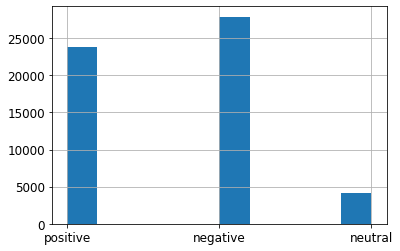

In [14]:
movies_final_2.Vader_polarity.hist()

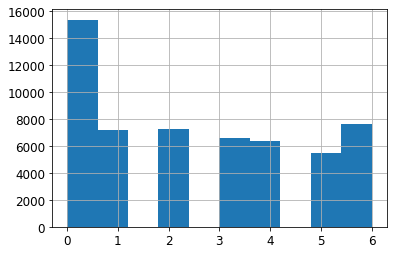

In [15]:
movies_final_2.NMF_topic.hist()

In [16]:
movies_final_2.head(1)

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...","{'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'co...",0.25,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON|PERSON|PERSON|ORG|...


## Fixing Entities

> Below we notice some null values regarding entities. This happens because not all overviews have entities. Instead of dropping these movies entirely, a "none" value will be displayed next to entities. This would still be a form of information to be considered by the model.

In [17]:
movies_final_2.isnull().sum()

movieId                     0
tmdbId                      0
title                       0
genres                      0
overview                    0
Vader_score                 0
Vader_compound              0
Vader_polarity              0
NMF_topic                   0
NMF_topic_description       0
entities                 6320
dtype: int64

In [18]:
movies_final_2[movies_final_2['entities'].isnull()].head(3)

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities
21,22,1710.0,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller,An agoraphobic psychologist and a female detec...,"{'neg': 0.312, 'neu': 0.688, 'pos': 0.0, 'comp...",-0.8625,negative,0,Battle|Offence,NaN
28,29,902.0,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,A scientist in a surrealist society kidnaps ch...,"{'neg': 0.141, 'neu': 0.617, 'pos': 0.242, 'co...",0.3182,positive,0,Battle|Offence,NaN
47,49,8391.0,When Night Is Falling (1995),Drama|Romance,A prudish woman working on tenure as a literac...,"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...",0.4215,positive,1,Affairs|Mystery,NaN


In [19]:
# taking for example the movie overview in index position 21
# we can see this overview does not have any entities
document= nlp(movies_final_2["overview"][21])
for entity in document.ents:
  print(entity.label_)

> Filling out the overviews which do not produce entities with "none" in the column entities

In [20]:
movies_final_2['entities'] = movies_final_2['entities'].fillna("none")

In [21]:
movies_final_2.isnull().sum()

movieId                  0
tmdbId                   0
title                    0
genres                   0
overview                 0
Vader_score              0
Vader_compound           0
Vader_polarity           0
NMF_topic                0
NMF_topic_description    0
entities                 0
dtype: int64

In [22]:
print("There are null values in the dataset: {}".format(movies_final_2.isnull().sum().any()))

There are null values in the dataset: False


In [23]:
# see how movie overview in index position 21 is now fixed

#movies_final_.loc[21, :]
#movies_final_.loc[21,'entities']
print(movies_final_2.loc[[21]])

    movieId  tmdbId           title  ... NMF_topic NMF_topic_description entities
21       22  1710.0  Copycat (1995)  ...         0        Battle|Offence     none

[1 rows x 11 columns]


## Genres

In [24]:
movies_final_2['genres'] = movies_final_2['genres'].replace(['Sci-Fi'],'Scifi')

> Top 10 Genres (original list, including  combination of genres)

In [25]:
movies_final_2["genres"].value_counts().sort_values(ascending=False).head(10)

Drama                   8836
Comedy                  5388
Documentary             4562
Comedy|Drama            2323
Drama|Romance           2086
Horror                  1639
Comedy|Romance          1548
Comedy|Drama|Romance    1028
Drama|Thriller           922
Thriller                 900
Name: genres, dtype: int64

In [26]:
movies_final_2.genres.nunique() # unique count value for all genre combinations

1621

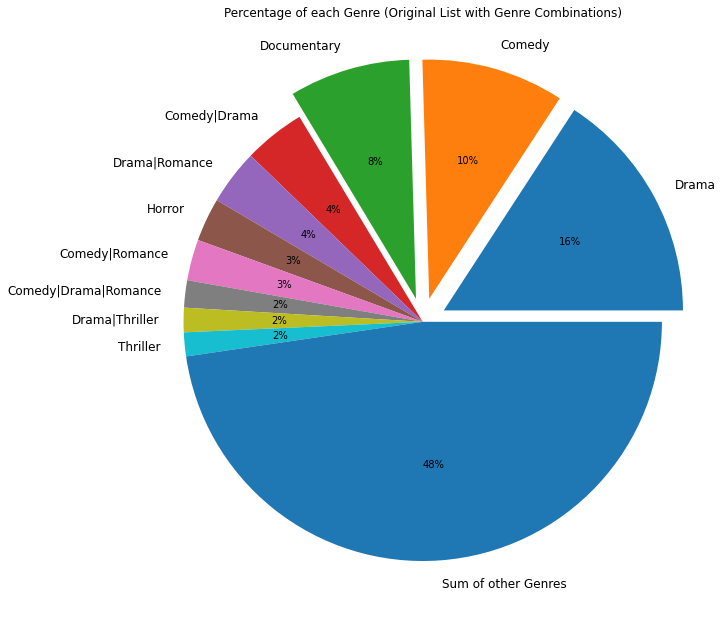

In [27]:
data= movies_final_2["genres"].value_counts()[:10].values.tolist()
sum_of_the_rest= sum(movies_final_2["genres"].value_counts()[10:])
data.append(sum_of_the_rest)

explode= (0.1,0.1,0.1,0,0,0,0,0,0,0,0)
labels= movies_final_2["genres"].value_counts()[:10].index.tolist()
labels.append("Sum of other Genres")

plt.figure(figsize=(12,11))
plt.title("Percentage of each Genre (Original List with Genre Combinations)")
plt.pie(data, labels=labels, explode=explode, autopct= "%1.f%%")
plt.show()

List of top 30 Genre Combinations

> The unique genres in descending order are:
* 1) Drama
* 2) Comedy
* 3) Documentary
* 4) Romance
* 5) Horror
* 6) Thriller
* 7) Crime
* 8) Animation
* 9) War
* 10) Western
* 11) Action
* 12) Scifi
* 13) Children

In [28]:
movies_final_2["genres"].value_counts().sort_values(ascending=False).head(30)

Drama                    8836
Comedy                   5388
Documentary              4562
Comedy|Drama             2323
Drama|Romance            2086
Horror                   1639
Comedy|Romance           1548
Comedy|Drama|Romance     1028
Drama|Thriller            922
Thriller                  900
Crime|Drama               886
Horror|Thriller           846
Animation                 676
Drama|War                 635
Western                   554
Action                    554
Action|Drama              529
Crime|Drama|Thriller      495
Action|Thriller           440
Comedy|Horror             368
Scifi                     366
Action|Comedy             353
Horror|Sci-Fi             329
Children|Drama            281
Animation|Children        278
Comedy|Crime              274
Romance                   272
Children|Comedy           263
Action|Crime|Thriller     259
Action|Crime|Drama        250
Name: genres, dtype: int64

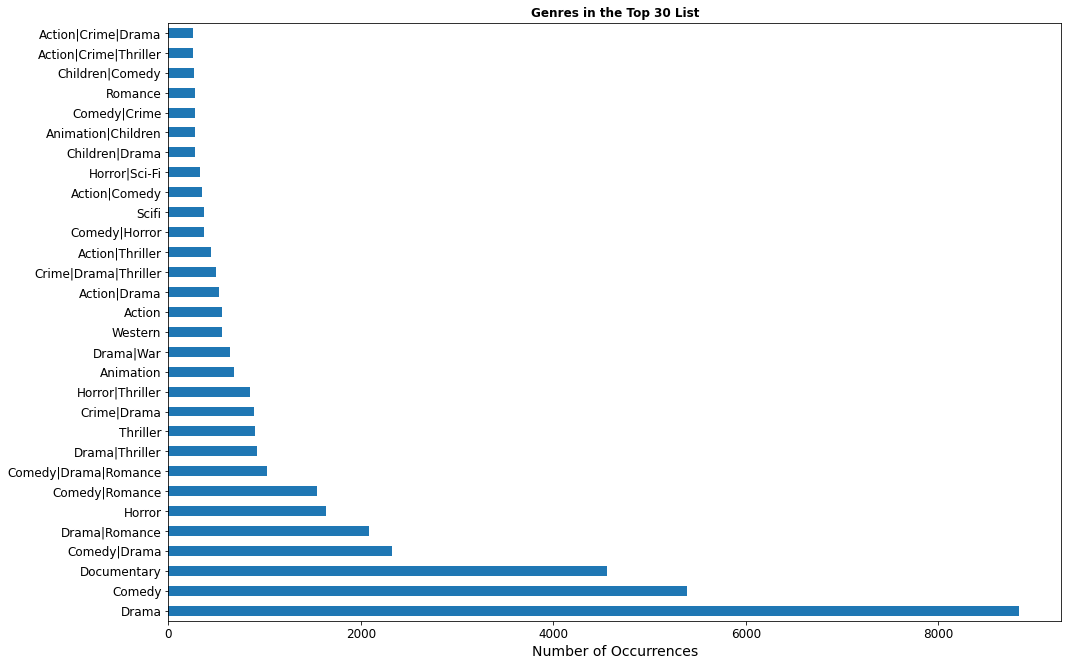

In [29]:
plt.figure(figsize=(16,11))
movies_final_2["genres"].value_counts()[:30].plot.barh()
plt.title("Genres in the Top 30 List", fontweight= 'bold')
plt.xlabel("Number of Occurrences")
plt.show()

In [30]:
movies_final_2.shape

(55877, 11)

In [31]:
movies_final_2.movieId.nunique()

55877

In [32]:
document= nlp("Sci-fi")

for token in document:
  print(token)

Sci
-
fi


# `Emotion` Labelling



## Rationale


### **_Definition of Emotions_**
Based on theories and arguments supported in the dissertation paper, totally 7 states of emotions will be displayed, and these are (in alphabetical order):

- 1) Anger
- 2) Disgust
- 3) Fear
- 4) Happiness
- 5) Sadness
- 6) Surprise

In [33]:
movies_final_2.head(2)

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...","{'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'co...",0.2500,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON|PERSON|PERSON|ORG|...
1,2,8844.0,Jumanji (1995),Adventure|Children|Fantasy,When siblings Judy and Peter discover an encha...,"{'neg': 0.161, 'neu': 0.702, 'pos': 0.137, 'co...",-0.4588,negative,5,War|Crime,PERSON|PERSON|ORG|PERSON|DATE|PERSON|CARDINAL


### **_Labelling Process_**

> `The rationale during labelling will be as following:`

The data is unlabelled in terms of the "emotion" feature, hence labelling will take place based on the researcher's best possible judgement. Only one person (the researcher) will label the data.

>`Rules during labelling`:



>> Totally there are 6 emotions. A movie might be tagged with no emotion, or with a combination of emotions with a maximum number of 5 emotions. This happens because I decide that emotion 'happiness' cannot concur with emotion 'sadness, and vice versa. This does not mean that a movie overview might not contain both emotions, but the rationale behind labelling is that if a movie overview contains both these emotions, then the dominant one will be labelled. Therefore:

>>
* Movies whose emotions include "happiness", cannot be labelled as "sadness" at the same time.
* Movies whose emotions include "sadness", cannot be labelled as "happiness" at the same time.
* All the rest of the combinations of emotions can be displyed and be accepted. For example a movie might be labelled with happiness and fear at the same time, but not with happiness, anger, and sadness.

Calculating the maximun number of occurences of emotions that a movie can have, we are talking about combination and not permutation since the order does not matter (we do not have hierarchy/grades in emotions) since emotions are binary, i.e. either with a score of 0 or 1. Therefore it is `combination with no order and no repetition` (an emotion cannot be displayed twice), and the formula is C(n,r) = n!/r!(n-r)!, where n here is 5 (since 5 is the maximum number of emotions displayed) and r can be 0,1,2,3,4 or 5. Overall, the maximum number of combinations here is `32`. [reference](
https://www.mathsisfun.com/combinatorics/combinations-permutations.html)

### **_Number of Labelled data_**

The researcher decides to label the emotion of 300 movie overviews (with the help of movies overviews and movies metadata???). Care is taken for the right choice of movie overviews, i.e. not all 300 movies should be of only the same genre e.g. action or drama, so that the model can learn from overviews of all movie genres, or at least the majority of them.

_`How the genre problem will be solved:`_

In the movies dataset (and in reality in movies databases as well) not only one genre characterises a movie. In most of the cases, a movie will have the combination of 2 to 4 genres. Therefore, in this phase there are mainly 2 directions that can be chosen:
* 1) take the top unique genres of the dataset, and equally label those movies
* 2) take the top unique genre combinations of the dataset, and equally label those movies (i.e. the original list of top genres)

If the 2nd is chosen, this means that some unique genres from the dataset will not be labelled and therefore, not be seen by the model. For this reason the researcher decides to choose movies which belong to 13 unique genres (taking the 30 top genres somebody can find 13 distinct genres, i.e. excluding the possible combinations of them- after that not essential unique genres are found), and not the original combination of them. In order for this to be explained better, let us suppose the following hypothetical order of a genre list: 1) drama 2) comedy 3) comedy|drama 4) horror 5) horror|drama 6) thriller. If the researcher had to decide to choose, for example, only 3 genres, if the 1st option is chosen then drama, comedy and comedy|drama movies would be chosen. However, the researcher here decides to go with the 2nd option, i.e. the unique values of genres, and for in example these are: drama, comedy, and horror, because comedy and drama (3rd order) have already been appeared individually in previous genres, and this way, a new genre "horror" is possible to be labelled.





As a consequence, `300 movie overviews will be labelled upon 12 different movie genres (Genres "Animation" and "Childern" are decided to be taken as a set since "animation/childen" movies are most likely to evoke same emotions, they belong to the last position in the genre list and they additionally are more used as a genre set rather than separately as the 30 top genre list indicates in the 25th position)


>> The **genres** used for the equal selection genre movie distribution during the emotion labelling are:

* 1) Drama
* 2) Comedy
* 3) Documentary
* 4) Romance
* 5) Horror
* 6) Thriller
* 7) Crime
* 8) War
* 9) Western
* 10) Action
* 11) Scifi
* 12) Animation & Children

## Labelling emotions

### Assignment of Emotions - Columns in Dataframe

Displaying the columns which will represent the categories of emotions, the number of which must be the same with that of the number of emotions, i.e. 7

In [34]:
# Emotion |1
# create column for "happiness"
happiness=[]
happiness= pd.Series(happiness)
movies_final_2["happiness"] = happiness


# Emotion |2
# create column for "sadness"
sadness=[]
sadness= pd.Series(sadness)
movies_final_2["sadness"] = sadness


# Emotion |3
# create column for "anger"
anger=[]
anger= pd.Series(anger)
movies_final_2["anger"] = anger


# Emotion |4
# create column for "disgust"
disgust=[]
disgust= pd.Series(disgust)
movies_final_2["disgust"] = disgust


# Emotion |5
# create column for "fear"
fear=[]
fear= pd.Series(fear)
movies_final_2["fear"] = fear


# Emotion |6
# create column for "surprise"
surprise=[]
surprise= pd.Series(surprise)
movies_final_2["surprise"] = surprise

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to s

In [35]:
movies_final_2.head()

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...","{'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'co...",0.2500,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON|PERSON|PERSON|ORG|...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,8844.0,Jumanji (1995),Adventure|Children|Fantasy,When siblings Judy and Peter discover an encha...,"{'neg': 0.161, 'neu': 0.702, 'pos': 0.137, 'co...",-0.4588,negative,5,War|Crime,PERSON|PERSON|ORG|PERSON|DATE|PERSON|CARDINAL,NaN,NaN,NaN,NaN,NaN,NaN
2,3,15602.0,Grumpier Old Men (1995),Comedy|Romance,A family wedding reignites the ancient feud be...,"{'neg': 0.168, 'neu': 0.791, 'pos': 0.041, 'co...",-0.7645,negative,6,Family|Relatives,PERSON|PERSON|NORP|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
3,4,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance,"Cheated on, mistreated and stepped on, the wom...","{'neg': 0.06, 'neu': 0.673, 'pos': 0.267, 'com...",0.8860,positive,1,Affairs|Mystery,PERSON|PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
4,5,11862.0,Father of the Bride Part II (1995),Comedy,Just when George Banks has recovered from his ...,"{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp...",0.5023,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
movies_final_2.shape

(55877, 17)

In [37]:
'''

 movies_final_2["happiness"] = movies_final_2["happiness"].astype('int64')

 movies_final_2["sadness"] = movies_final_2["sadness"].astype('int64')

 movies_final_2["anger"] = movies_final_2["anger"].astype('int64')

 movies_final_2["disgust"] = movies_final_2["disgust"].astype('int64')

 movies_final_2["fear"] = movies_final_2["fear"].astype('int64')

 movies_final_2["surprise"] = movies_final_2["surprise"].astype('int64')

'''

'\n\n movies_final_2["happiness"] = movies_final_2["happiness"].astype(\'int64\')\n\n movies_final_2["sadness"] = movies_final_2["sadness"].astype(\'int64\')\n\n movies_final_2["anger"] = movies_final_2["anger"].astype(\'int64\')\n\n movies_final_2["disgust"] = movies_final_2["disgust"].astype(\'int64\')\n\n movies_final_2["fear"] = movies_final_2["fear"].astype(\'int64\')\n\n movies_final_2["surprise"] = movies_final_2["surprise"].astype(\'int64\')\n\n'

In [38]:
movies_final_2.describe()

,movieId,tmdbId,Vader_compound,NMF_topic,happiness,sadness,anger,disgust,fear,surprise
count,55877.000000,55877.000000,55877.000000,55877.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,118075.555041,147660.953254,-0.056888,2.505575,NaN,NaN,NaN,NaN,NaN,NaN
std,64712.299036,152739.398315,0.631790,2.146271,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,2.000000,-0.996700,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,72960.000000,32654.000000,-0.665200,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,133109.000000,79231.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,171991.000000,241562.000000,0.542300,4.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,209171.000000,646282.000000,0.995500,6.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
movies_final_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55877 entries, 0 to 55876
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                55877 non-null  int64  
 1   tmdbId                 55877 non-null  float64
 2   title                  55877 non-null  object 
 3   genres                 55877 non-null  object 
 4   overview               55877 non-null  object 
 5   Vader_score            55877 non-null  object 
 6   Vader_compound         55877 non-null  float64
 7   Vader_polarity         55877 non-null  object 
 8   NMF_topic              55877 non-null  int64  
 9   NMF_topic_description  55877 non-null  object 
 10  entities               55877 non-null  object 
 11  happiness              0 non-null      float64
 12  sadness                0 non-null      float64
 13  anger                  0 non-null      float64
 14  disgust                0 non-null      float64
 15  fe

### Procedure to fetch and label data for 300 movies: 

> 25 movies of the 12 genres aforementioned (**drama, comedy, documentary, romance, horror, thriller, crime, war, western, action, scifi**, and **"Animation|Children").**

In [40]:
movies_final_2.isnull().sum()

movieId                      0
tmdbId                       0
title                        0
genres                       0
overview                     0
Vader_score                  0
Vader_compound               0
Vader_polarity               0
NMF_topic                    0
NMF_topic_description        0
entities                     0
happiness                55877
sadness                  55877
anger                    55877
disgust                  55877
fear                     55877
surprise                 55877
dtype: int64

#### 1| Labelling "`Drama`"

> I will then fit the emotion based on dataframe index position 

In [41]:
movies_final_2.loc[(movies_final_2['genres'] == "Drama") & (movies_final_2["Vader_polarity"]=="positive")].head(13) 

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
30,31,9909.0,Dangerous Minds (1995),Drama,Former Marine Louanne Johnson lands a gig teac...,"{'neg': 0.127, 'neu': 0.705, 'pos': 0.169, 'co...",0.3716,positive,4,School|College,DATE|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
41,43,35196.0,Restoration (1995),Drama,"An aspiring young physician, Robert Merivel fo...","{'neg': 0.036, 'neu': 0.79, 'pos': 0.174, 'com...",0.9702,positive,3,Relationships|Marriage,PERSON|PERSON|PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
53,55,97406.0,Georgia (1995),Drama,"Sadie looks up to her older sister Georgia, a ...","{'neg': 0.095, 'neu': 0.795, 'pos': 0.11, 'com...",0.0387,positive,0,Battle|Offence,PERSON|GPE|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
60,62,2054.0,Mr. Holland's Opus (1995),Drama,"In 1965, passionate musician Glenn Holland tak...","{'neg': 0.03, 'neu': 0.797, 'pos': 0.174, 'com...",0.8176,positive,4,School|College,DATE|PERSON|GPE,NaN,NaN,NaN,NaN,NaN,NaN
65,67,40628.0,Two Bits (1995),Drama,"It's a hot summer day in 1933 in South Philly,...","{'neg': 0.054, 'neu': 0.855, 'pos': 0.091, 'co...",0.5408,positive,6,Family|Relatives,DATE|DATE|GPE|PERSON|DATE|GPE|PERSON|DATE|GPE,NaN,NaN,NaN,NaN,NaN,NaN
88,90,61548.0,The Journey of August King (1995),Drama,The Journey of August King is a multi-dimensio...,"{'neg': 0.047, 'neu': 0.879, 'pos': 0.074, 'co...",0.5423,positive,1,Affairs|Mystery,DATE|GPE|DATE|DATE|DATE|DATE|DATE,NaN,NaN,NaN,NaN,NaN,NaN
111,114,71754.0,Margaret's Museum (1995),Drama,In a town where half the men die down the coal...,"{'neg': 0.097, 'neu': 0.687, 'pos': 0.215, 'co...",0.7492,positive,0,Battle|Offence,CARDINAL|PRODUCT|PERSON|GPE|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
121,124,37975.0,"Star Maker, The (Uomo delle stelle, L') (1995)",Drama,The adventures and deceptions of a photographe...,"{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'comp...",0.4215,positive,2,Autobiography|Storytelling,GPE|GPE,NaN,NaN,NaN,NaN,NaN,NaN
135,138,39428.0,"Neon Bible, The (1995)",Drama,"While on a train, a teenage boy thinks about h...","{'neg': 0.096, 'neu': 0.713, 'pos': 0.191, 'co...",0.6249,positive,3,Relationships|Marriage,DATE,NaN,NaN,NaN,NaN,NaN,NaN
144,147,10474.0,"Basketball Diaries, The (1995)",Drama,Film adaptation of street tough Jim Carroll's ...,"{'neg': 0.066, 'neu': 0.789, 'pos': 0.145, 'co...",0.4215,positive,2,Autobiography|Storytelling,PERSON,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
movies_final_2.loc[(movies_final_2['genres'] == "Drama") & (movies_final_2["Vader_polarity"]=="negative")].head(12) 

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
13,14,10858.0,Nixon (1995),Drama,An epic look at President Richard M. Nixon—a m...,"{'neg': 0.229, 'neu': 0.771, 'pos': 0.0, 'comp...",-0.8658,negative,5,War|Crime,PERSON|GPE|EVENT,NaN,NaN,NaN,NaN,NaN,NaN
25,26,16420.0,Othello (1995),Drama,The evil Iago pretends to be friend of Othello...,"{'neg': 0.176, 'neu': 0.727, 'pos': 0.097, 'co...",-0.3818,negative,2,Autobiography|Storytelling,PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
38,40,34615.0,"Cry, the Beloved Country (1995)",Drama,A South-African preacher goes to search for hi...,"{'neg': 0.17, 'neu': 0.728, 'pos': 0.102, 'com...",-0.3400,negative,4,School|College,NORP,NaN,NaN,NaN,NaN,NaN,NaN
55,57,9089.0,Home for the Holidays (1995),Drama,"After losing her job, making out with her soon...","{'neg': 0.101, 'neu': 0.845, 'pos': 0.054, 'co...",-0.3182,negative,6,Family|Relatives,DATE|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
118,121,32119.0,"Boys of St. Vincent, The (1992)",Drama,The true story of boys being sexually abused a...,"{'neg': 0.156, 'neu': 0.711, 'pos': 0.133, 'co...",-0.1280,negative,2,Autobiography|Storytelling,GPE,NaN,NaN,NaN,NaN,NaN,NaN
124,127,44284.0,"Silences of the Palace, The (Saimt el Qusur) (...",Drama,The death of a prince brings a young woman bac...,"{'neg': 0.106, 'neu': 0.894, 'pos': 0.0, 'comp...",-0.5994,negative,1,Affairs|Mystery,none,NaN,NaN,NaN,NaN,NaN,NaN
127,130,32622.0,Angela (1995),Drama,A ten year old girl named Angela leads her six...,"{'neg': 0.065, 'neu': 0.899, 'pos': 0.036, 'co...",-0.6369,negative,6,Family|Relatives,DATE|PERSON|DATE|PERSON|PERSON|PERSON|CARDINAL...,NaN,NaN,NaN,NaN,NaN,NaN
139,142,525153.0,Shadows (Cienie) (1988),Drama,"During the Second World War, tens of thousands...","{'neg': 0.164, 'neu': 0.775, 'pos': 0.061, 'co...",-0.8591,negative,5,War|Crime,EVENT|CARDINAL|NORP|NORP|ORG|PERSON|NORP|ORG|W...,NaN,NaN,NaN,NaN,NaN,NaN
140,143,249882.0,Gospa (1995),Drama,"In 1981 in Medjugorje (BA), a group of kids cl...","{'neg': 0.073, 'neu': 0.927, 'pos': 0.0, 'comp...",-0.4404,negative,0,Battle|Offence,DATE|ORG|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
145,148,22279.0,"Awfully Big Adventure, An (1995)",Drama,"Liverpool. 1947. Right after World War II, a s...","{'neg': 0.135, 'neu': 0.825, 'pos': 0.04, 'com...",-0.6808,negative,5,War|Crime,GPE|DATE|EVENT|GPE|DATE|PERSON,NaN,NaN,NaN,NaN,NaN,NaN


> For example, the whole movie overview of the first drama genre movie with positive polarity has index 30 in the dataframe, and it can be displayed below like this:

In [43]:
from IPython.display import Markdown, display
display(Markdown('> '+movies_final_2.loc[30].at["overview"]))

> Former Marine Louanne Johnson lands a gig teaching in a pilot program for bright but underachieving teens at a notorious inner-city high school. After having a terrible first day, she decides she must throw decorum to the wind. When Johnson returns to the classroom, she does so armed with a no-nonsense attitude informed by her military training and a fearless determination to better the lives of her students -- no matter what the cost.

> After studying the above overviews, below the emotion is assigned:

In [44]:

movies_final_2.loc[30, ["happiness"]] = 1
movies_final_2.loc[30, ["sadness"]] = 0
movies_final_2.loc[30, ["anger"]] = 0
movies_final_2.loc[30, ["disgust"]] = 0
movies_final_2.loc[30, ["fear"]] = 0
movies_final_2.loc[30, ["surprise"]] = 1

movies_final_2.loc[41, ["happiness"]] = 1
movies_final_2.loc[41, ["sadness"]] = 0
movies_final_2.loc[41, ["anger"]] = 0
movies_final_2.loc[41, ["disgust"]] = 0
movies_final_2.loc[41, ["fear"]] = 1
movies_final_2.loc[41, ["surprise"]] = 1

movies_final_2.loc[53, ["happiness"]] = 1
movies_final_2.loc[53, ["sadness"]] = 0
movies_final_2.loc[53, ["anger"]] = 0
movies_final_2.loc[53, ["disgust"]] =0 
movies_final_2.loc[53, ["fear"]] = 0
movies_final_2.loc[53, ["surprise"]] = 1

movies_final_2.loc[60, ["happiness"]] = 0
movies_final_2.loc[60, ["sadness"]] = 1
movies_final_2.loc[60, ["anger"]] = 0
movies_final_2.loc[60, ["disgust"]] = 0
movies_final_2.loc[60, ["fear"]] = 1
movies_final_2.loc[60, ["surprise"]] = 0

movies_final_2.loc[65, ["happiness"]] = 0
movies_final_2.loc[65, ["sadness"]] = 1
movies_final_2.loc[65, ["anger"]] = 0
movies_final_2.loc[65, ["disgust"]] = 0
movies_final_2.loc[65, ["fear"]] = 1
movies_final_2.loc[65, ["surprise"]] = 1

movies_final_2.loc[88, ["happiness"]] = 0
movies_final_2.loc[88, ["sadness"]] = 1
movies_final_2.loc[88, ["anger"]] = 0
movies_final_2.loc[88, ["disgust"]] = 0
movies_final_2.loc[88, ["fear"]] = 1
movies_final_2.loc[88, ["surprise"]] = 1

movies_final_2.loc[111, ["happiness"]] = 1
movies_final_2.loc[111, ["sadness"]] = 0
movies_final_2.loc[111, ["anger"]] = 0
movies_final_2.loc[111, ["disgust"]] = 0
movies_final_2.loc[111, ["fear"]] = 1
movies_final_2.loc[111, ["surprise"]] = 1

movies_final_2.loc[121, ["happiness"]] = 0
movies_final_2.loc[121, ["sadness"]] = 0
movies_final_2.loc[121, ["anger"]] = 0
movies_final_2.loc[121, ["disgust"]] = 0
movies_final_2.loc[121, ["fear"]] = 1
movies_final_2.loc[121, ["surprise"]] = 1

movies_final_2.loc[135, ["happiness"]] = 1
movies_final_2.loc[135, ["sadness"]] = 0
movies_final_2.loc[135, ["anger"]] = 0
movies_final_2.loc[135, ["disgust"]] = 0
movies_final_2.loc[135, ["fear"]] = 0
movies_final_2.loc[135, ["surprise"]] = 1

movies_final_2.loc[144, ["happiness"]] = 0
movies_final_2.loc[144, ["sadness"]] = 1
movies_final_2.loc[144, ["anger"]] = 0
movies_final_2.loc[144, ["disgust"]] = 0
movies_final_2.loc[144, ["fear"]] = 1
movies_final_2.loc[144, ["surprise"]] = 0

movies_final_2.loc[151, ["happiness"]] = 0  
movies_final_2.loc[151, ["sadness"]] = 1
movies_final_2.loc[151, ["anger"]] = 0
movies_final_2.loc[151, ["disgust"]] = 1
movies_final_2.loc[151, ["fear"]] = 0
movies_final_2.loc[151, ["surprise"]] = 1

movies_final_2.loc[190, ["happiness"]] = 1
movies_final_2.loc[190, ["sadness"]] = 0
movies_final_2.loc[190, ["anger"]] = 0
movies_final_2.loc[190, ["disgust"]] = 0
movies_final_2.loc[190, ["fear"]] = 0
movies_final_2.loc[190, ["surprise"]] = 0

movies_final_2.loc[194, ["happiness"]] = 0
movies_final_2.loc[194, ["sadness"]] = 0
movies_final_2.loc[194, ["anger"]] = 0
movies_final_2.loc[194, ["disgust"]] = 0
movies_final_2.loc[194, ["fear"]] = 0
movies_final_2.loc[194, ["surprise"]] = 1







movies_final_2.loc[13, ["happiness"]] = 0
movies_final_2.loc[13, ["sadness"]] = 1
movies_final_2.loc[13, ["anger"]] = 0
movies_final_2.loc[13, ["disgust"]] = 0
movies_final_2.loc[13, ["fear"]] = 1
movies_final_2.loc[13, ["surprise"]] = 1

movies_final_2.loc[25, ["happiness"]] = 0
movies_final_2.loc[25, ["sadness"]] = 1
movies_final_2.loc[25, ["anger"]] = 1
movies_final_2.loc[25, ["disgust"]] = 0
movies_final_2.loc[25, ["fear"]] = 1
movies_final_2.loc[25, ["surprise"]] = 0

movies_final_2.loc[38, ["happiness"]] = 0
movies_final_2.loc[38, ["sadness"]] = 1
movies_final_2.loc[38, ["anger"]] = 1
movies_final_2.loc[38, ["disgust"]] = 0
movies_final_2.loc[38, ["fear"]] = 1
movies_final_2.loc[38, ["surprise"]] = 0

movies_final_2.loc[55, ["happiness"]] = 1
movies_final_2.loc[55, ["sadness"]] = 0
movies_final_2.loc[55, ["anger"]] = 0
movies_final_2.loc[55, ["disgust"]] = 1
movies_final_2.loc[55, ["fear"]] = 1
movies_final_2.loc[55, ["surprise"]] = 1

movies_final_2.loc[118, ["happiness"]] = 0
movies_final_2.loc[118, ["sadness"]] = 1
movies_final_2.loc[118, ["anger"]] = 1
movies_final_2.loc[118, ["disgust"]] = 1
movies_final_2.loc[118, ["fear"]] = 1
movies_final_2.loc[118, ["surprise"]] = 0

movies_final_2.loc[124, ["happiness"]] = 0
movies_final_2.loc[124, ["sadness"]] = 1
movies_final_2.loc[124, ["anger"]] = 0
movies_final_2.loc[124, ["disgust"]] = 1
movies_final_2.loc[124, ["fear"]] = 1
movies_final_2.loc[124, ["surprise"]] = 1

movies_final_2.loc[127, ["happiness"]] = 0
movies_final_2.loc[127, ["sadness"]] = 1
movies_final_2.loc[127, ["anger"]] = 0
movies_final_2.loc[127, ["disgust"]] = 1
movies_final_2.loc[127, ["fear"]] = 1
movies_final_2.loc[127, ["surprise"]] = 0

movies_final_2.loc[139, ["happiness"]] = 0
movies_final_2.loc[139, ["sadness"]] = 1
movies_final_2.loc[139, ["anger"]] = 1
movies_final_2.loc[139, ["disgust"]] = 1
movies_final_2.loc[139, ["fear"]] = 1
movies_final_2.loc[139, ["surprise"]] = 1

movies_final_2.loc[140, ["happiness"]] = 0
movies_final_2.loc[140, ["sadness"]] = 0
movies_final_2.loc[140, ["anger"]] = 0
movies_final_2.loc[140, ["disgust"]] = 0
movies_final_2.loc[140, ["fear"]] = 1
movies_final_2.loc[140, ["surprise"]] = 1

movies_final_2.loc[145, ["happiness"]] = 0
movies_final_2.loc[145, ["sadness"]] = 1
movies_final_2.loc[145, ["anger"]] = 0
movies_final_2.loc[145, ["disgust"]] = 0
movies_final_2.loc[145, ["fear"]] = 1
movies_final_2.loc[145, ["surprise"]] = 1

movies_final_2.loc[164, ["happiness"]] = 0
movies_final_2.loc[164, ["sadness"]] = 1
movies_final_2.loc[164, ["anger"]] = 0
movies_final_2.loc[164, ["disgust"]] = 0
movies_final_2.loc[164, ["fear"]] = 1
movies_final_2.loc[164, ["surprise"]] = 0

movies_final_2.loc[172, ["happiness"]] = 0
movies_final_2.loc[172, ["sadness"]] = 1
movies_final_2.loc[172, ["anger"]] = 0
movies_final_2.loc[172, ["disgust"]] = 1
movies_final_2.loc[172, ["fear"]] = 0
movies_final_2.loc[172, ["surprise"]] = 0


In [45]:
# check for inconsistence during emotion labelling
count=0
for row in movies_final_2.itertuples(index=True, name='Pandas'):
  if (row.happiness ==0 or row.happiness==1) and (row.sadness ==0 or row.sadness==1) and (row.anger==0 or row.anger==1) and (row.disgust==0 or row.disgust==1) and (row.fear==0 or row.fear==1) and (row.surprise==0 or row.surprise==1):
    count=count+1
if count % 25 == 0:
  print("Emotion has successfully been labelled in {} movie overviews so far.".format(count))
  print("====================================================================")
  print("{} is a multiple of 25 movies added, so ok!".format(count))
else:
  print ("Error: number not a multiple of 25")

Emotion has successfully been labelled in 25 movie overviews so far.
25 is a multiple of 25 movies added, so ok!


#### 2| Labelling "`Comedy`"

In [46]:
movies_final_2.loc[(movies_final_2['genres'] == "Comedy") & (movies_final_2["Vader_polarity"]=="positive")].head(13) 

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
4,5,11862.0,Father of the Bride Part II (1995),Comedy,Just when George Banks has recovered from his ...,"{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp...",0.5023,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
86,88,13997.0,Black Sheep (1996),Comedy,When dignified Albert Donnelly runs for Govern...,"{'neg': 0.036, 'neu': 0.906, 'pos': 0.058, 'co...",0.2960,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
101,104,9614.0,Happy Gilmore (1996),Comedy,Failed hockey player-turned-golf whiz Happy Gi...,"{'neg': 0.05, 'neu': 0.653, 'pos': 0.297, 'com...",0.9457,positive,0,Battle|Offence,ORG|ORG,NaN,NaN,NaN,NaN,NaN,NaN
112,115,43612.0,Happiness Is in the Field (Bonheur est dans le...,Comedy,"Francis, the boss of a small plumbing supply c...","{'neg': 0.101, 'neu': 0.737, 'pos': 0.162, 'co...",0.6808,positive,1,Affairs|Mystery,PERSON|PERSON|NORP|DATE|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
138,141,11000.0,"Birdcage, The (1996)",Comedy,A gay cabaret owner and his drag queen compani...,"{'neg': 0.061, 'neu': 0.799, 'pos': 0.141, 'co...",0.3612,positive,6,Family|Relatives,none,NaN,NaN,NaN,NaN,NaN,NaN
141,144,16388.0,"Brothers McMullen, The (1995)",Comedy,Deals with the lives of the three Irish Cathol...,"{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'comp...",0.7845,positive,4,School|College,CARDINAL|NORP|ORG|GPE|GPE|DATE|DATE|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
171,174,19326.0,Jury Duty (1995),Comedy,When jobless Tommy Collins discovers that sequ...,"{'neg': 0.083, 'neu': 0.758, 'pos': 0.159, 'co...",0.5095,positive,0,Battle|Offence,PERSON,NaN,NaN,NaN,NaN,NaN,NaN
200,203,9090.0,"To Wong Foo, Thanks for Everything! Julie Newm...",Comedy,Three New York drag queens on their way to Hol...,"{'neg': 0.032, 'neu': 0.903, 'pos': 0.065, 'co...",0.4404,positive,4,School|College,CARDINAL|GPE|GPE|NORP|DATE|ORG,NaN,NaN,NaN,NaN,NaN,NaN
213,216,11017.0,Billy Madison (1995),Comedy,Billy Madison is the 27 year-old son of Bryan ...,"{'neg': 0.0, 'neu': 0.957, 'pos': 0.043, 'comp...",0.3499,positive,6,Family|Relatives,PERSON|DATE|PERSON|PERSON|CARDINAL|DATE,NaN,NaN,NaN,NaN,NaN,NaN
219,223,2292.0,Clerks (1994),Comedy,Convenience and video store clerks Dante and R...,"{'neg': 0.1, 'neu': 0.758, 'pos': 0.143, 'comp...",0.4588,positive,3,Relationships|Marriage,PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
movies_final_2.loc[(movies_final_2['genres'] == "Comedy") & (movies_final_2["Vader_polarity"]=="negative")].head(12) 

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
17,18,5.0,Four Rooms (1995),Comedy,It's Ted the Bellhop's first night on the job....,"{'neg': 0.074, 'neu': 0.882, 'pos': 0.044, 'co...",-0.2960,negative,0,Battle|Offence,ORDINAL|TIME|CARDINAL,NaN,NaN,NaN,NaN,NaN,NaN
18,19,9273.0,Ace Ventura: When Nature Calls (1995),Comedy,"Summoned from an ashram in Tibet, Ace finds hi...","{'neg': 0.167, 'neu': 0.746, 'pos': 0.088, 'co...",-0.6597,negative,5,War|Crime,GPE|ORG|LOC|PERSON|PERSON|WORK_OF_ART|ORG|ORG,NaN,NaN,NaN,NaN,NaN,NaN
63,65,9536.0,Bio-Dome (1996),Comedy,Bud and Doyle are two losers who are doing not...,"{'neg': 0.118, 'neu': 0.8, 'pos': 0.081, 'comp...",-0.3903,negative,0,Battle|Offence,PERSON|CARDINAL|CARDINAL|LOC|DATE|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
99,102,47475.0,Mr. Wrong (1996),Comedy,A single and lonely woman finds the seemingly ...,"{'neg': 0.301, 'neu': 0.578, 'pos': 0.121, 'co...",-0.8426,negative,1,Affairs|Mystery,WORK_OF_ART,NaN,NaN,NaN,NaN,NaN,NaN
116,119,78406.0,"Steal Big, Steal Little (1995)",Comedy,"Ruben and Robby are twin brothers, adopted by ...","{'neg': 0.184, 'neu': 0.656, 'pos': 0.16, 'com...",-0.8290,negative,0,Battle|Offence,PERSON|PERSON|PERSON|GPE|PERSON|PERSON|PERSON|...,NaN,NaN,NaN,NaN,NaN,NaN
122,125,2074.0,Flirting With Disaster (1996),Comedy,"Adopted as a child, new father Mel Colpin deci...","{'neg': 0.115, 'neu': 0.83, 'pos': 0.055, 'com...",-0.5106,negative,6,Family|Relatives,PERSON|PERSON|PERSON|ORG,NaN,NaN,NaN,NaN,NaN,NaN
132,135,9101.0,Down Periscope (1996),Comedy,Bumbling Navy lieutenant Tom Dodge has been gi...,"{'neg': 0.234, 'neu': 0.657, 'pos': 0.109, 'co...",-0.9298,negative,5,War|Crime,ORG|PERSON|PERSON|ORG|ORG|ORG|ORG,NaN,NaN,NaN,NaN,NaN,NaN
173,176,9071.0,Living in Oblivion (1995),Comedy,Nick is the director of a low-budget indie fil...,"{'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'comp...",-0.8271,negative,2,Autobiography|Storytelling,PERSON|CARDINAL,NaN,NaN,NaN,NaN,NaN,NaN
184,187,36196.0,Party Girl (1995),Comedy,"Although Mary has little income, she still fin...","{'neg': 0.127, 'neu': 0.842, 'pos': 0.031, 'co...",-0.8176,negative,0,Battle|Offence,PERSON|DATE|PERSON|PERSON|PERSON|PERSON|PERSON...,NaN,NaN,NaN,NaN,NaN,NaN
224,228,62488.0,Destiny Turns on the Radio (1995),Comedy,Johnny Destiny burns into Las Vegas in his hot...,"{'neg': 0.121, 'neu': 0.855, 'pos': 0.025, 'co...",-0.7906,negative,0,Battle|Offence,PERSON|GPE|GPE|ORG|PRODUCT,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
movies_final_2.loc[4, ["happiness"]] = 1
movies_final_2.loc[4, ["sadness"]] = 0
movies_final_2.loc[4, ["anger"]] = 0
movies_final_2.loc[4, ["disgust"]] = 0
movies_final_2.loc[4, ["fear"]] = 0
movies_final_2.loc[4, ["surprise"]] = 1

movies_final_2.loc[86, ["happiness"]] = 1
movies_final_2.loc[86, ["sadness"]] = 0
movies_final_2.loc[86, ["anger"]] = 0
movies_final_2.loc[86, ["disgust"]] = 0
movies_final_2.loc[86, ["fear"]] = 0
movies_final_2.loc[86, ["surprise"]] = 1

movies_final_2.loc[101, ["happiness"]] = 1
movies_final_2.loc[101, ["sadness"]] = 0
movies_final_2.loc[101, ["anger"]] = 0
movies_final_2.loc[101, ["disgust"]] = 0
movies_final_2.loc[101, ["fear"]] = 0
movies_final_2.loc[101, ["surprise"]] = 1

movies_final_2.loc[112, ["happiness"]] = 1
movies_final_2.loc[112, ["sadness"]] = 0
movies_final_2.loc[112, ["anger"]] = 0
movies_final_2.loc[112, ["disgust"]] = 0
movies_final_2.loc[112, ["fear"]] = 0
movies_final_2.loc[112, ["surprise"]] = 1

movies_final_2.loc[138, ["happiness"]] = 1
movies_final_2.loc[138, ["sadness"]] = 0
movies_final_2.loc[138, ["anger"]] = 0
movies_final_2.loc[138, ["disgust"]] = 0
movies_final_2.loc[138, ["fear"]] = 0
movies_final_2.loc[138, ["surprise"]] = 1

movies_final_2.loc[141, ["happiness"]] = 1
movies_final_2.loc[141, ["sadness"]] = 0
movies_final_2.loc[141, ["anger"]] = 0
movies_final_2.loc[141, ["disgust"]] = 0
movies_final_2.loc[141, ["fear"]] = 0
movies_final_2.loc[141, ["surprise"]] = 0

movies_final_2.loc[171, ["happiness"]] = 0
movies_final_2.loc[171, ["sadness"]] = 0
movies_final_2.loc[171, ["anger"]] = 0
movies_final_2.loc[171, ["disgust"]] = 0
movies_final_2.loc[171, ["fear"]] = 1
movies_final_2.loc[171, ["surprise"]] = 1

movies_final_2.loc[200, ["happiness"]] = 1
movies_final_2.loc[200, ["sadness"]] = 0
movies_final_2.loc[200, ["anger"]] = 0
movies_final_2.loc[200, ["disgust"]] = 0
movies_final_2.loc[200, ["fear"]] = 1
movies_final_2.loc[200, ["surprise"]] = 1

movies_final_2.loc[213, ["happiness"]] = 1
movies_final_2.loc[213, ["sadness"]] = 0
movies_final_2.loc[213, ["anger"]] = 0
movies_final_2.loc[213, ["disgust"]] = 0
movies_final_2.loc[213, ["fear"]] = 0
movies_final_2.loc[213, ["surprise"]] = 1

movies_final_2.loc[219, ["happiness"]] = 1
movies_final_2.loc[219, ["sadness"]] = 0
movies_final_2.loc[219, ["anger"]] = 0
movies_final_2.loc[219, ["disgust"]] = 0
movies_final_2.loc[219, ["fear"]] = 0
movies_final_2.loc[219, ["surprise"]] = 0

movies_final_2.loc[230, ["happiness"]] = 1
movies_final_2.loc[230, ["sadness"]] = 0
movies_final_2.loc[230, ["anger"]] = 0
movies_final_2.loc[230, ["disgust"]] = 1
movies_final_2.loc[230, ["fear"]] = 0
movies_final_2.loc[230, ["surprise"]] = 1

movies_final_2.loc[244, ["happiness"]] = 1
movies_final_2.loc[244, ["sadness"]] = 0
movies_final_2.loc[244, ["anger"]] = 0
movies_final_2.loc[244, ["disgust"]] = 0
movies_final_2.loc[244, ["fear"]] = 0
movies_final_2.loc[244, ["surprise"]] = 0

movies_final_2.loc[274, ["happiness"]] = 1
movies_final_2.loc[274, ["sadness"]] = 0
movies_final_2.loc[274, ["anger"]] = 0
movies_final_2.loc[274, ["disgust"]] = 0
movies_final_2.loc[274, ["fear"]] = 0
movies_final_2.loc[274, ["surprise"]] = 0










movies_final_2.loc[17, ["happiness"]] = 1
movies_final_2.loc[17, ["sadness"]] = 0
movies_final_2.loc[17, ["anger"]] = 0
movies_final_2.loc[17, ["disgust"]] = 1
movies_final_2.loc[17, ["fear"]] = 1
movies_final_2.loc[17, ["surprise"]] = 1

movies_final_2.loc[18, ["happiness"]] = 1
movies_final_2.loc[18, ["sadness"]] = 0
movies_final_2.loc[18, ["anger"]] = 0
movies_final_2.loc[18, ["disgust"]] = 0
movies_final_2.loc[18, ["fear"]] = 1
movies_final_2.loc[18, ["surprise"]] = 1

movies_final_2.loc[63, ["happiness"]] = 1
movies_final_2.loc[63, ["sadness"]] = 0
movies_final_2.loc[63, ["anger"]] = 0
movies_final_2.loc[63, ["disgust"]] = 0
movies_final_2.loc[63, ["fear"]] = 0
movies_final_2.loc[63, ["surprise"]] = 1

movies_final_2.loc[99, ["happiness"]] = 0
movies_final_2.loc[99, ["sadness"]] = 1
movies_final_2.loc[99, ["anger"]] = 0
movies_final_2.loc[99, ["disgust"]] = 1
movies_final_2.loc[99, ["fear"]] = 0
movies_final_2.loc[99, ["surprise"]] = 1

movies_final_2.loc[116, ["happiness"]] = 1
movies_final_2.loc[116, ["sadness"]] = 0
movies_final_2.loc[116, ["anger"]] = 0
movies_final_2.loc[116, ["disgust"]] = 0
movies_final_2.loc[116, ["fear"]] = 1
movies_final_2.loc[116, ["surprise"]] = 1

movies_final_2.loc[122, ["happiness"]] = 1
movies_final_2.loc[122, ["sadness"]] = 0
movies_final_2.loc[122, ["anger"]] = 0
movies_final_2.loc[122, ["disgust"]] = 0
movies_final_2.loc[122, ["fear"]] = 0
movies_final_2.loc[122, ["surprise"]] = 1

movies_final_2.loc[132, ["happiness"]] = 1
movies_final_2.loc[132, ["sadness"]] = 0
movies_final_2.loc[132, ["anger"]] = 0
movies_final_2.loc[132, ["disgust"]] = 0
movies_final_2.loc[132, ["fear"]] = 1
movies_final_2.loc[132, ["surprise"]] = 1

movies_final_2.loc[173, ["happiness"]] = 0
movies_final_2.loc[173, ["sadness"]] = 0
movies_final_2.loc[173, ["anger"]] = 1
movies_final_2.loc[173, ["disgust"]] = 0
movies_final_2.loc[173, ["fear"]] = 1
movies_final_2.loc[173, ["surprise"]] = 1

movies_final_2.loc[184, ["happiness"]] = 1
movies_final_2.loc[184, ["sadness"]] = 0
movies_final_2.loc[184, ["anger"]] = 0
movies_final_2.loc[184, ["disgust"]] = 0
movies_final_2.loc[184, ["fear"]] = 0
movies_final_2.loc[184, ["surprise"]] = 0

movies_final_2.loc[224, ["happiness"]] = 1
movies_final_2.loc[224, ["sadness"]] = 0
movies_final_2.loc[224, ["anger"]] = 0
movies_final_2.loc[224, ["disgust"]] = 0
movies_final_2.loc[224, ["fear"]] = 0
movies_final_2.loc[224, ["surprise"]] = 1

movies_final_2.loc[251, ["happiness"]] = 1
movies_final_2.loc[251, ["sadness"]] = 0
movies_final_2.loc[251, ["anger"]] = 0
movies_final_2.loc[251, ["disgust"]] = 0
movies_final_2.loc[251, ["fear"]] = 1
movies_final_2.loc[251, ["surprise"]] = 0

movies_final_2.loc[263, ["happiness"]] = 1
movies_final_2.loc[263, ["sadness"]] = 0
movies_final_2.loc[263, ["anger"]] = 0
movies_final_2.loc[263, ["disgust"]] = 0
movies_final_2.loc[263, ["fear"]] = 0
movies_final_2.loc[263, ["surprise"]] = 1


In [49]:
# check for inconsistence during emotion labelling
count=0
for row in movies_final_2.itertuples(index=True, name='Pandas'):
  if (row.happiness ==0 or row.happiness==1) and (row.sadness ==0 or row.sadness==1) and (row.anger==0 or row.anger==1) and (row.disgust==0 or row.disgust==1) and (row.fear==0 or row.fear==1) and (row.surprise==0 or row.surprise==1):
    count=count+1
if count % 25 == 0:
  print("Emotion has successfully been labelled in {} movie overviews so far.".format(count))
  print("====================================================================")
  print("{} is a multiple of 25 movies added, so ok!".format(count))
else:
  print ("Error: number not a multiple of 25")

Emotion has successfully been labelled in 50 movie overviews so far.
50 is a multiple of 25 movies added, so ok!


#### 3| Labelling "`Documentary`"

In [50]:
movies_final_2.loc[(movies_final_2['genres'] == "Documentary") & (movies_final_2["Vader_polarity"]=="positive")].head(13) 

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
75,77,124626.0,Nico Icon (1995),Documentary,"A look into the many lives of Christa Päffgen,...","{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...",0.8402,positive,1,Affairs|Mystery,PERSON|PERSON|NORP|ORDINAL|FAC,NaN,NaN,NaN,NaN,NaN,NaN
125,128,290157.0,Jupiter's Wife (1994),Documentary,"Michel Negroponte, a documentary filmmaker, me...","{'neg': 0.0, 'neu': 0.963, 'pos': 0.037, 'comp...",0.2732,positive,2,Autobiography|Storytelling,PERSON|PERSON|DATE|LOC|PERSON|LOC|PERSON|PERSO...,NaN,NaN,NaN,NaN,NaN,NaN
131,134,124636.0,Sonic Outlaws (1995),Documentary,Within days after the release of Negativland's...,"{'neg': 0.017, 'neu': 0.85, 'pos': 0.133, 'com...",0.8720,positive,2,Autobiography|Storytelling,DATE|ORG|PERSON|ORG|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
133,136,123360.0,From the Journals of Jean Seberg (1995),Documentary,Mark Rappaport's creative bio-pic about actres...,"{'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'comp...",0.8271,positive,2,Autobiography|Storytelling,PERSON|PERSON|ORDINAL|PERSON|PERSON|NORP|PERSO...,NaN,NaN,NaN,NaN,NaN,NaN
159,162,26564.0,Crumb (1994),Documentary,This movie chronicles the life and times of R....,"{'neg': 0.0, 'neu': 0.935, 'pos': 0.065, 'comp...",0.5423,positive,1,Affairs|Mystery,PERSON|PERSON|WORK_OF_ART|PERSON|CARDINAL|CARD...,NaN,NaN,NaN,NaN,NaN,NaN
189,192,56088.0,The Show (1995),Documentary,A documentary about the culture of hip-hop. Th...,"{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'comp...",0.5598,positive,2,Autobiography|Storytelling,none,NaN,NaN,NaN,NaN,NaN,NaN
203,206,77350.0,Unzipped (1995),Documentary,"Isaac Mizrahi, one of the most successful desi...","{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp...",0.6240,positive,4,School|College,PERSON|CARDINAL|DATE,NaN,NaN,NaN,NaN,NaN,NaN
242,246,14275.0,Hoop Dreams (1994),Documentary,"Every school day, African-American teenagers W...","{'neg': 0.061, 'neu': 0.835, 'pos': 0.104, 'co...",0.5574,positive,4,School|College,DATE|NORP|PERSON|PERSON|TIME|GPE|ORG|GPE|GPE|P...,NaN,NaN,NaN,NaN,NaN,NaN
392,398,42981.0,Frank and Ollie (1995),Documentary,"Before computer graphics, special effects wiza...","{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'comp...",0.9848,positive,5,War|Crime,CARDINAL|ORG|PERSON|PERSON|PERSON|PERSON|ORG|P...,NaN,NaN,NaN,NaN,NaN,NaN
549,556,26408.0,"War Room, The (1993)",Documentary,A behind-the-scenes documentary about the Clin...,"{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'comp...",0.3400,positive,2,Autobiography|Storytelling,PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
movies_final_2.loc[(movies_final_2['genres'] == "Documentary") & (movies_final_2["Vader_polarity"]=="negative")].head(12) 

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
96,99,63076.0,Heidi Fleiss: Hollywood Madam (1995),Documentary,A documentary crew from the BBC arrives in L.A...,"{'neg': 0.038, 'neu': 0.962, 'pos': 0.0, 'comp...",-0.5212,negative,1,Affairs|Mystery,ORG|GPE|PERSON|DATE|DATE|CARDINAL|PERSON|GPE|G...,NaN,NaN,NaN,NaN,NaN,NaN
113,116,51352.0,Anne Frank Remembered (1995),Documentary,Using previously unreleased archival material ...,"{'neg': 0.048, 'neu': 0.952, 'pos': 0.0, 'comp...",-0.3353,negative,2,Autobiography|Storytelling,PERSON|ORDINAL|PERSON|EVENT|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
134,137,5757.0,Man of the Year (1995),Documentary,First-time director Dirk Shafer also penned th...,"{'neg': 0.064, 'neu': 0.884, 'pos': 0.052, 'co...",-0.2280,negative,0,Battle|Offence,ORDINAL|PERSON|DATE|ORG|DATE|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
357,363,41647.0,"Wonderful, Horrible Life of Leni Riefenstahl, ...",Documentary,This documentary recounts the life and work of...,"{'neg': 0.082, 'neu': 0.837, 'pos': 0.082, 'co...",-0.0036,negative,2,Autobiography|Storytelling,CARDINAL|NORP|PERSON|NORP|GPE|NORP|GPE|DATE|DATE,NaN,NaN,NaN,NaN,NaN,NaN
398,404,316098.0,Brother Minister: The Assassination of Malcolm...,Documentary,Brother Minister reveals the mystery surroundi...,"{'neg': 0.11, 'neu': 0.817, 'pos': 0.073, 'com...",-0.3182,negative,4,School|College,PERSON|FAC|GPE|DATE|CARDINAL,NaN,NaN,NaN,NaN,NaN,NaN
593,602,124472.0,"Great Day in Harlem, A (1994)",Documentary,"Art Kane, now deceased, coordinated a group ph...","{'neg': 0.028, 'neu': 0.951, 'pos': 0.021, 'co...",-0.1531,negative,2,Autobiography|Storytelling,PERSON|GPE|DATE|ORG|FAC|DATE|DATE|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
664,683,185191.0,"Eye of Vichy, The (Oeil de Vichy, L') (1993)",Documentary,"Directed by French filmmaker Claude Chabrol, t...","{'neg': 0.092, 'neu': 0.908, 'pos': 0.0, 'comp...",-0.7096,negative,5,War|Crime,NORP|PERSON|NORP|ORG|EVENT|NORP|NORP|ORG|NORP|...,NaN,NaN,NaN,NaN,NaN,NaN
704,727,365371.0,War Stories (1995),Documentary,Seven New Zealand women speak about their live...,"{'neg': 0.202, 'neu': 0.798, 'pos': 0.0, 'comp...",-0.8779,negative,5,War|Crime,CARDINAL|GPE|EVENT|EVENT,NaN,NaN,NaN,NaN,NaN,NaN
1075,1122,470646.0,Plutonium Circus (1995),Documentary,Funny yet incisive look at the PANTEX Nuclear ...,"{'neg': 0.121, 'neu': 0.802, 'pos': 0.077, 'co...",-0.7627,negative,5,War|Crime,FAC|GPE|GPE|EVENT|GPE|GPE|EVENT|GPE,NaN,NaN,NaN,NaN,NaN,NaN
1076,1123,124837.0,"Perfect Candidate, A (1996)",Documentary,The filmmakers follow Oliver North's unsuccess...,"{'neg': 0.094, 'neu': 0.906, 'pos': 0.0, 'comp...",-0.3612,negative,5,War|Crime,PERSON|DATE|GPE|ORG|GPE|PERSON|ORG,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
movies_final_2.loc[75, ["happiness"]] = 1
movies_final_2.loc[75, ["sadness"]] = 0
movies_final_2.loc[75, ["anger"]] = 0
movies_final_2.loc[75, ["disgust"]] = 0
movies_final_2.loc[75, ["fear"]] = 0
movies_final_2.loc[75, ["surprise"]] = 1

movies_final_2.loc[125, ["happiness"]] = 0
movies_final_2.loc[125, ["sadness"]] = 0
movies_final_2.loc[125, ["anger"]] = 0
movies_final_2.loc[125, ["disgust"]] = 1
movies_final_2.loc[125, ["fear"]] = 0
movies_final_2.loc[125, ["surprise"]] = 1

movies_final_2.loc[131, ["happiness"]] = 0
movies_final_2.loc[131, ["sadness"]] = 0
movies_final_2.loc[131, ["anger"]] = 0
movies_final_2.loc[131, ["disgust"]] = 0
movies_final_2.loc[131, ["fear"]] = 1
movies_final_2.loc[131, ["surprise"]] = 0

movies_final_2.loc[133, ["happiness"]] = 0
movies_final_2.loc[133, ["sadness"]] = 1
movies_final_2.loc[133, ["anger"]] = 0
movies_final_2.loc[133, ["disgust"]] = 0
movies_final_2.loc[133, ["fear"]] = 0
movies_final_2.loc[133, ["surprise"]] = 1

movies_final_2.loc[159, ["happiness"]] = 1
movies_final_2.loc[159, ["sadness"]] = 0
movies_final_2.loc[159, ["anger"]] = 0
movies_final_2.loc[159, ["disgust"]] = 0
movies_final_2.loc[159, ["fear"]] = 0
movies_final_2.loc[159, ["surprise"]] = 1

movies_final_2.loc[189, ["happiness"]] = 0
movies_final_2.loc[189, ["sadness"]] = 0
movies_final_2.loc[189, ["anger"]] = 0
movies_final_2.loc[189, ["disgust"]] = 0
movies_final_2.loc[189, ["fear"]] = 0
movies_final_2.loc[189, ["surprise"]] = 0

movies_final_2.loc[203, ["happiness"]] = 0
movies_final_2.loc[203, ["sadness"]] = 0
movies_final_2.loc[203, ["anger"]] = 0
movies_final_2.loc[203, ["disgust"]] = 0
movies_final_2.loc[203, ["fear"]] = 0
movies_final_2.loc[203, ["surprise"]] = 0

movies_final_2.loc[242, ["happiness"]] = 1
movies_final_2.loc[242, ["sadness"]] = 0
movies_final_2.loc[242, ["anger"]] = 1
movies_final_2.loc[242, ["disgust"]] = 0
movies_final_2.loc[242, ["fear"]] = 0
movies_final_2.loc[242, ["surprise"]] = 1

movies_final_2.loc[392, ["happiness"]] = 1
movies_final_2.loc[392, ["sadness"]] = 0
movies_final_2.loc[392, ["anger"]] = 0
movies_final_2.loc[392, ["disgust"]] = 0
movies_final_2.loc[392, ["fear"]] = 0
movies_final_2.loc[392, ["surprise"]] = 1

movies_final_2.loc[549, ["happiness"]] = 0
movies_final_2.loc[549, ["sadness"]] = 0
movies_final_2.loc[549, ["anger"]] = 0
movies_final_2.loc[549, ["disgust"]] = 0
movies_final_2.loc[549, ["fear"]] = 1
movies_final_2.loc[549, ["surprise"]] = 0

movies_final_2.loc[572, ["happiness"]] = 0
movies_final_2.loc[572, ["sadness"]] = 0
movies_final_2.loc[572, ["anger"]] = 0
movies_final_2.loc[572, ["disgust"]] = 0
movies_final_2.loc[572, ["fear"]] = 0
movies_final_2.loc[572, ["surprise"]] = 0

movies_final_2.loc[699, ["happiness"]] = 0
movies_final_2.loc[699, ["sadness"]] = 0
movies_final_2.loc[699, ["anger"]] = 0
movies_final_2.loc[699, ["disgust"]] = 0
movies_final_2.loc[699, ["fear"]] = 0
movies_final_2.loc[699, ["surprise"]] = 0

movies_final_2.loc[744, ["happiness"]] = 0
movies_final_2.loc[744, ["sadness"]] = 1
movies_final_2.loc[744, ["anger"]] = 0
movies_final_2.loc[744, ["disgust"]] = 0
movies_final_2.loc[744, ["fear"]] = 0
movies_final_2.loc[744, ["surprise"]] = 0










movies_final_2.loc[96, ["happiness"]] = 0
movies_final_2.loc[96, ["sadness"]] = 0
movies_final_2.loc[96, ["anger"]] = 0
movies_final_2.loc[96, ["disgust"]] = 1
movies_final_2.loc[96, ["fear"]] = 1
movies_final_2.loc[96, ["surprise"]] = 0

movies_final_2.loc[113, ["happiness"]] = 0
movies_final_2.loc[113, ["sadness"]] = 1
movies_final_2.loc[113, ["anger"]] = 1
movies_final_2.loc[113, ["disgust"]] = 1
movies_final_2.loc[113, ["fear"]] = 1
movies_final_2.loc[113, ["surprise"]] = 0

movies_final_2.loc[134, ["happiness"]] = 1
movies_final_2.loc[134, ["sadness"]] = 0
movies_final_2.loc[134, ["anger"]] = 0
movies_final_2.loc[134, ["disgust"]] = 0
movies_final_2.loc[134, ["fear"]] = 0
movies_final_2.loc[134, ["surprise"]] = 1

movies_final_2.loc[357, ["happiness"]] = 0
movies_final_2.loc[357, ["sadness"]] = 1
movies_final_2.loc[357, ["anger"]] = 0
movies_final_2.loc[357, ["disgust"]] = 1
movies_final_2.loc[357, ["fear"]] = 1
movies_final_2.loc[357, ["surprise"]] = 1

movies_final_2.loc[398, ["happiness"]] = 0
movies_final_2.loc[398, ["sadness"]] = 1
movies_final_2.loc[398, ["anger"]] = 0
movies_final_2.loc[398, ["disgust"]] = 1
movies_final_2.loc[398, ["fear"]] = 1
movies_final_2.loc[398, ["surprise"]] = 1

movies_final_2.loc[593, ["happiness"]] = 0
movies_final_2.loc[593, ["sadness"]] = 1
movies_final_2.loc[593, ["anger"]] = 0
movies_final_2.loc[593, ["disgust"]] = 0
movies_final_2.loc[593, ["fear"]] = 0
movies_final_2.loc[593, ["surprise"]] = 0

movies_final_2.loc[664, ["happiness"]] = 0
movies_final_2.loc[664, ["sadness"]] = 1
movies_final_2.loc[664, ["anger"]] = 1
movies_final_2.loc[664, ["disgust"]] = 1
movies_final_2.loc[664, ["fear"]] = 1
movies_final_2.loc[664, ["surprise"]] = 0

movies_final_2.loc[704, ["happiness"]] = 0
movies_final_2.loc[704, ["sadness"]] = 1
movies_final_2.loc[704, ["anger"]] = 1
movies_final_2.loc[704, ["disgust"]] = 0
movies_final_2.loc[704, ["fear"]] = 1
movies_final_2.loc[704, ["surprise"]] = 0

movies_final_2.loc[1075, ["happiness"]] = 0
movies_final_2.loc[1075, ["sadness"]] = 0
movies_final_2.loc[1075, ["anger"]] = 1
movies_final_2.loc[1075, ["disgust"]] = 0
movies_final_2.loc[1075, ["fear"]] = 1
movies_final_2.loc[1075, ["surprise"]] = 0

movies_final_2.loc[1076, ["happiness"]] = 0
movies_final_2.loc[1076, ["sadness"]] = 0
movies_final_2.loc[1076, ["anger"]] = 0
movies_final_2.loc[1076, ["disgust"]] = 0
movies_final_2.loc[1076, ["fear"]] = 0
movies_final_2.loc[1076, ["surprise"]] = 0

movies_final_2.loc[1120, ["happiness"]] = 0
movies_final_2.loc[1120, ["sadness"]] = 0
movies_final_2.loc[1120, ["anger"]] = 1
movies_final_2.loc[1120, ["disgust"]] = 0
movies_final_2.loc[1120, ["fear"]] = 0
movies_final_2.loc[1120, ["surprise"]] = 0

movies_final_2.loc[1139, ["happiness"]] = 0
movies_final_2.loc[1139, ["sadness"]] = 1
movies_final_2.loc[1139, ["anger"]] = 0
movies_final_2.loc[1139, ["disgust"]] = 0
movies_final_2.loc[1139, ["fear"]] = 1
movies_final_2.loc[1139, ["surprise"]] = 1


In [53]:
# check for inconsistence during emotion labelling
count=0
for row in movies_final_2.itertuples(index=True, name='Pandas'):
  if (row.happiness ==0 or row.happiness==1) and (row.sadness ==0 or row.sadness==1) and (row.anger==0 or row.anger==1) and (row.disgust==0 or row.disgust==1) and (row.fear==0 or row.fear==1) and (row.surprise==0 or row.surprise==1):
    count=count+1
if count % 25 == 0:
  print("Emotion has successfully been labelled in {} movie overviews so far.".format(count))
  print("====================================================================")
  print("{} is a multiple of 25 movies added, so ok!".format(count))
else:
  print ("Error: number not a multiple of 25")

Emotion has successfully been labelled in 75 movie overviews so far.
75 is a multiple of 25 movies added, so ok!


#### 4| Labelling "`Romance`"

In [54]:
movies_final_2.loc[(movies_final_2['genres'] == "Romance") & (movies_final_2["Vader_polarity"]=="positive")].head(13) 

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
612,623,123505.0,"Modern Affair, A (1995)",Romance,A Modern Affair is an independent feature dire...,"{'neg': 0.029, 'neu': 0.736, 'pos': 0.235, 'co...",0.9578,positive,1,Affairs|Mystery,ORG|PERSON|ORG|PERSON|PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
626,638,2021.0,Jack and Sarah (1995),Romance,Jack always lands on his feet. He lands on his...,"{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'comp...",0.5423,positive,4,School|College,PERSON|PERSON|PERSON|CARDINAL,NaN,NaN,NaN,NaN,NaN,NaN
945,983,172868.0,Madagascar Skin (1995),Romance,"This is the story of Harry and Flint, an unlik...","{'neg': 0.146, 'neu': 0.691, 'pos': 0.162, 'co...",0.4570,positive,1,Affairs|Mystery,ORG|PERSON|GPE,NaN,NaN,NaN,NaN,NaN,NaN
1259,1314,348138.0,Breathing Room (1996),Romance,"She's Kathy, a comix cartoonist; he's David, t...","{'neg': 0.049, 'neu': 0.874, 'pos': 0.076, 'co...",0.3919,positive,4,School|College,PERSON|PERSON|LANGUAGE|GPE|DATE|DATE|PERSON|LA...,NaN,NaN,NaN,NaN,NaN,NaN
1407,1475,28005.0,Kama Sutra: A Tale of Love (1996),Romance,Tara and Maya are two inseparable friends in I...,"{'neg': 0.022, 'neu': 0.812, 'pos': 0.166, 'co...",0.9549,positive,0,Battle|Offence,PERSON|PERSON|CARDINAL|GPE|DATE|CARDINAL|PERSO...,NaN,NaN,NaN,NaN,NaN,NaN
1409,1477,27322.0,Love Jones (1997),Romance,Darius Lovehall is a young black poet in Chica...,"{'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'comp...",0.9766,positive,3,Relationships|Marriage,PERSON|GPE|PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
1421,1493,76996.0,Love and Other Catastrophes (1996),Romance,A day in the life of two film-school students ...,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.6369,positive,3,Relationships|Marriage,CARDINAL,NaN,NaN,NaN,NaN,NaN,NaN
1438,1514,47694.0,Temptress Moon (Feng Yue) (1996),Romance,"Set in the decadent 1920s, Temptress Moon tell...","{'neg': 0.08, 'neu': 0.787, 'pos': 0.133, 'com...",0.6369,positive,6,Family|Relatives,DATE|PERSON|GPE|ORG|GPE|ORG|CARDINAL,NaN,NaN,NaN,NaN,NaN,NaN
1492,1574,37567.0,Fall (1997),Romance,"For Michael Shiver, life as an easy-going cab ...","{'neg': 0.049, 'neu': 0.742, 'pos': 0.209, 'co...",0.9469,positive,3,Relationships|Marriage,PERSON|GPE|PERSON|PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
1577,1666,32332.0,Hugo Pool (1997),Romance,Hugo Pool is a quirky tale of a Los Angeles po...,"{'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...",0.7096,positive,1,Affairs|Mystery,PERSON|GPE|PERSON,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
movies_final_2.loc[(movies_final_2['genres'] == "Romance") & (movies_final_2["Vader_polarity"]=="negative")].head(12) 

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
1444,1520,16399.0,Commandments (1997),Romance,Seth Warner has reached the end of his rope. E...,"{'neg': 0.184, 'neu': 0.757, 'pos': 0.059, 'co...",-0.9623,negative,4,School|College,PERSON|DATE|DATE|GPE|PERSON|PERSON|DATE|CARDINAL,NaN,NaN,NaN,NaN,NaN,NaN
1620,1714,279698.0,Never Met Picasso (1996),Romance,This gay-oriented drama centers on the life an...,"{'neg': 0.179, 'neu': 0.729, 'pos': 0.093, 'co...",-0.8288,negative,3,Relationships|Marriage,PERSON|PERSON|PERSON|DATE|GPE|PERSON|PERSON|PE...,NaN,NaN,NaN,NaN,NaN,NaN
2370,2497,10207.0,Message in a Bottle (1999),Romance,A woman finds a romantic letter in a bottle wa...,"{'neg': 0.209, 'neu': 0.583, 'pos': 0.207, 'co...",-0.0258,negative,1,Affairs|Mystery,none,NaN,NaN,NaN,NaN,NaN,NaN
6034,6192,102.0,Open Hearts (Elsker dig for evigt) (2002),Romance,Cecilie and Joachim are about to get married w...,"{'neg': 0.141, 'neu': 0.792, 'pos': 0.068, 'co...",-0.5423,negative,3,Relationships|Marriage,ORG|PERSON|PERSON|PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
8146,8911,14024.0,Raise Your Voice (2004),Romance,Raise Your Voice is a coming-of-age story cent...,"{'neg': 0.102, 'neu': 0.898, 'pos': 0.0, 'comp...",-0.7650,negative,0,Battle|Offence,DATE|GPE,NaN,NaN,NaN,NaN,NaN,NaN
13431,70093,22215.0,Cheri (2009),Romance,A sumptuous dramatic comedy set in late 19th C...,"{'neg': 0.107, 'neu': 0.824, 'pos': 0.069, 'co...",-0.3400,negative,5,War|Crime,DATE|GPE|FAC|NORP|EVENT,NaN,NaN,NaN,NaN,NaN,NaN
15143,80777,56969.0,Tere Naam (2003),Romance,"Radhey is a poor, low caste Hindu with a bad t...","{'neg': 0.3, 'neu': 0.625, 'pos': 0.075, 'comp...",-0.8910,negative,3,Relationships|Marriage,ORG|NORP|CARDINAL,NaN,NaN,NaN,NaN,NaN,NaN
20785,109177,67793.0,Don't Go Breaking My Heart (Daan gyun naam yu)...,Romance,"Mainlander & financial analyst Cheng Zixin, wh...","{'neg': 0.078, 'neu': 0.857, 'pos': 0.065, 'co...",-0.0516,negative,0,Battle|Offence,PERSON|PERSON|GPE|PERSON|PERSON|PERSON|PERSON|...,NaN,NaN,NaN,NaN,NaN,NaN
21622,112990,136616.0,"Pursuit of Unhappiness, The (Anleitung zum Ung...",Romance,Based on the best-selling psychology book by P...,"{'neg': 0.195, 'neu': 0.752, 'pos': 0.053, 'co...",-0.6249,negative,2,Autobiography|Storytelling,PERSON|PERSON|PERSON|DATE,NaN,NaN,NaN,NaN,NaN,NaN
24669,123137,50068.0,The Fleet's In (1942),Romance,Shy sailor Casey Kirby suddenly becomes known ...,"{'neg': 0.062, 'neu': 0.938, 'pos': 0.0, 'comp...",-0.2500,negative,0,Battle|Offence,PERSON,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
movies_final_2.loc[612, ["happiness"]] = 1
movies_final_2.loc[612, ["sadness"]] = 0
movies_final_2.loc[612, ["anger"]] = 0
movies_final_2.loc[612, ["disgust"]] = 0
movies_final_2.loc[612, ["fear"]] = 0
movies_final_2.loc[612, ["surprise"]] = 1

movies_final_2.loc[626, ["happiness"]] = 1
movies_final_2.loc[626, ["sadness"]] = 0
movies_final_2.loc[626, ["anger"]] = 0
movies_final_2.loc[626, ["disgust"]] = 0
movies_final_2.loc[626, ["fear"]] = 0
movies_final_2.loc[626, ["surprise"]] = 1

movies_final_2.loc[945, ["happiness"]] = 1
movies_final_2.loc[945, ["sadness"]] = 0
movies_final_2.loc[945, ["anger"]] = 0
movies_final_2.loc[945, ["disgust"]] = 0
movies_final_2.loc[945, ["fear"]] = 0
movies_final_2.loc[945, ["surprise"]] = 1

movies_final_2.loc[1259, ["happiness"]] = 1
movies_final_2.loc[1259, ["sadness"]] = 0
movies_final_2.loc[1259, ["anger"]] = 0
movies_final_2.loc[1259, ["disgust"]] = 0
movies_final_2.loc[1259, ["fear"]] = 0
movies_final_2.loc[1259, ["surprise"]] = 1

movies_final_2.loc[1407, ["happiness"]] = 1
movies_final_2.loc[1407, ["sadness"]] = 0
movies_final_2.loc[1407, ["anger"]] = 0
movies_final_2.loc[1407, ["disgust"]] = 1
movies_final_2.loc[1407, ["fear"]] = 0
movies_final_2.loc[1407, ["surprise"]] = 1

movies_final_2.loc[1409, ["happiness"]] = 1
movies_final_2.loc[1409, ["sadness"]] = 0
movies_final_2.loc[1409, ["anger"]] = 0
movies_final_2.loc[1409, ["disgust"]] = 0
movies_final_2.loc[1409, ["fear"]] = 0
movies_final_2.loc[1409, ["surprise"]] = 1

movies_final_2.loc[1421, ["happiness"]] = 1
movies_final_2.loc[1421, ["sadness"]] = 0
movies_final_2.loc[1421, ["anger"]] = 0
movies_final_2.loc[1421, ["disgust"]] = 0
movies_final_2.loc[1421, ["fear"]] = 0
movies_final_2.loc[1421, ["surprise"]] = 1

movies_final_2.loc[1438, ["happiness"]] = 0
movies_final_2.loc[1438, ["sadness"]] = 0
movies_final_2.loc[1438, ["anger"]] = 0
movies_final_2.loc[1438, ["disgust"]] = 1
movies_final_2.loc[1438, ["fear"]] = 0
movies_final_2.loc[1438, ["surprise"]] = 1

movies_final_2.loc[1492, ["happiness"]] = 1
movies_final_2.loc[1492, ["sadness"]] = 0
movies_final_2.loc[1492, ["anger"]] = 0
movies_final_2.loc[1492, ["disgust"]] = 0
movies_final_2.loc[1492, ["fear"]] = 0
movies_final_2.loc[1492, ["surprise"]] = 1

movies_final_2.loc[1577, ["happiness"]] = 0
movies_final_2.loc[1577, ["sadness"]] = 1
movies_final_2.loc[1577, ["anger"]] = 0
movies_final_2.loc[1577, ["disgust"]] = 0
movies_final_2.loc[1577, ["fear"]] = 0
movies_final_2.loc[1577, ["surprise"]] = 1

movies_final_2.loc[1580, ["happiness"]] = 1
movies_final_2.loc[1580, ["sadness"]] = 0
movies_final_2.loc[1580, ["anger"]] = 0
movies_final_2.loc[1580, ["disgust"]] = 0
movies_final_2.loc[1580, ["fear"]] = 0
movies_final_2.loc[1580, ["surprise"]] = 1

movies_final_2.loc[2036, ["happiness"]] = 0
movies_final_2.loc[2036, ["sadness"]] = 1
movies_final_2.loc[2036, ["anger"]] = 1
movies_final_2.loc[2036, ["disgust"]] = 0
movies_final_2.loc[2036, ["fear"]] = 0
movies_final_2.loc[2036, ["surprise"]] = 0

movies_final_2.loc[2214, ["happiness"]] = 0
movies_final_2.loc[2214, ["sadness"]] = 0
movies_final_2.loc[2214, ["anger"]] = 0
movies_final_2.loc[2214, ["disgust"]] = 1
movies_final_2.loc[2214, ["fear"]] = 1
movies_final_2.loc[2214, ["surprise"]] = 1









movies_final_2.loc[1444, ["happiness"]] = 0
movies_final_2.loc[1444, ["sadness"]] = 1
movies_final_2.loc[1444, ["anger"]] = 1
movies_final_2.loc[1444, ["disgust"]] = 0
movies_final_2.loc[1444, ["fear"]] = 1
movies_final_2.loc[1444, ["surprise"]] = 0

movies_final_2.loc[1620, ["happiness"]] = 0
movies_final_2.loc[1620, ["sadness"]] = 1
movies_final_2.loc[1620, ["anger"]] = 0
movies_final_2.loc[1620, ["disgust"]] = 0
movies_final_2.loc[1620, ["fear"]] = 0
movies_final_2.loc[1620, ["surprise"]] = 1

movies_final_2.loc[2370, ["happiness"]] = 1
movies_final_2.loc[2370, ["sadness"]] = 0
movies_final_2.loc[2370, ["anger"]] = 0
movies_final_2.loc[2370, ["disgust"]] = 0
movies_final_2.loc[2370, ["fear"]] = 0
movies_final_2.loc[2370, ["surprise"]] = 1

movies_final_2.loc[6034, ["happiness"]] = 0
movies_final_2.loc[6034, ["sadness"]] = 1
movies_final_2.loc[6034, ["anger"]] = 0
movies_final_2.loc[6034, ["disgust"]] = 1
movies_final_2.loc[6034, ["fear"]] = 1
movies_final_2.loc[6034, ["surprise"]] = 1

movies_final_2.loc[8146, ["happiness"]] = 0
movies_final_2.loc[8146, ["sadness"]] = 1
movies_final_2.loc[8146, ["anger"]] = 0
movies_final_2.loc[8146, ["disgust"]] = 1
movies_final_2.loc[8146, ["fear"]] = 1
movies_final_2.loc[8146, ["surprise"]] = 1

movies_final_2.loc[13431, ["happiness"]] = 0
movies_final_2.loc[13431, ["sadness"]] = 0
movies_final_2.loc[13431, ["anger"]] = 0
movies_final_2.loc[13431, ["disgust"]] = 0
movies_final_2.loc[13431, ["fear"]] = 0
movies_final_2.loc[13431, ["surprise"]] = 0

movies_final_2.loc[15143, ["happiness"]] = 0
movies_final_2.loc[15143, ["sadness"]] = 1
movies_final_2.loc[15143, ["anger"]] = 0
movies_final_2.loc[15143, ["disgust"]] = 1
movies_final_2.loc[15143, ["fear"]] = 1
movies_final_2.loc[15143, ["surprise"]] = 1

movies_final_2.loc[20785, ["happiness"]] = 1
movies_final_2.loc[20785, ["sadness"]] = 0
movies_final_2.loc[20785, ["anger"]] = 0
movies_final_2.loc[20785, ["disgust"]] = 0
movies_final_2.loc[20785, ["fear"]] = 0
movies_final_2.loc[20785, ["surprise"]] = 1

movies_final_2.loc[21622, ["happiness"]] = 1
movies_final_2.loc[21622, ["sadness"]] = 0
movies_final_2.loc[21622, ["anger"]] = 0
movies_final_2.loc[21622, ["disgust"]] = 0
movies_final_2.loc[21622, ["fear"]] = 0
movies_final_2.loc[21622, ["surprise"]] = 0

movies_final_2.loc[24669, ["happiness"]] = 1
movies_final_2.loc[24669, ["sadness"]] = 0
movies_final_2.loc[24669, ["anger"]] = 0
movies_final_2.loc[24669, ["disgust"]] = 0
movies_final_2.loc[24669, ["fear"]] = 0
movies_final_2.loc[24669, ["surprise"]] = 0

movies_final_2.loc[25215, ["happiness"]] = 1
movies_final_2.loc[25215, ["sadness"]] = 0
movies_final_2.loc[25215, ["anger"]] = 0
movies_final_2.loc[25215, ["disgust"]] = 0
movies_final_2.loc[25215, ["fear"]] = 0
movies_final_2.loc[25215, ["surprise"]] = 0

movies_final_2.loc[26504, ["happiness"]] = 0
movies_final_2.loc[26504, ["sadness"]] = 1
movies_final_2.loc[26504, ["anger"]] = 0
movies_final_2.loc[26504, ["disgust"]] = 0
movies_final_2.loc[26504, ["fear"]] = 1
movies_final_2.loc[26504, ["surprise"]] = 0

In [57]:
# check for inconsistence during emotion labelling
count=0
for row in movies_final_2.itertuples(index=True, name='Pandas'):
  if (row.happiness ==0 or row.happiness==1) and (row.sadness ==0 or row.sadness==1) and (row.anger==0 or row.anger==1) and (row.disgust==0 or row.disgust==1) and (row.fear==0 or row.fear==1) and (row.surprise==0 or row.surprise==1):
    count=count+1
if count % 25 == 0:
  print("Emotion has successfully been labelled in {} movie overviews so far.".format(count))
  print("====================================================================")
  print("{} is a multiple of 25 movies added, so ok!".format(count))
else:
  print ("Error: number not a multiple of 25")

Emotion has successfully been labelled in 100 movie overviews so far.
100 is a multiple of 25 movies added, so ok!


#### 5| Labelling "`Horror`"

In [58]:
movies_final_2.loc[(movies_final_2['genres'] == "Horror") & (movies_final_2["Vader_polarity"]=="positive")].head(13) 

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
1266,1322,41671.0,Amityville 1992: It's About Time (1992),Horror,"When an old clock arrives at home as a gift, s...","{'neg': 0.153, 'neu': 0.668, 'pos': 0.179, 'co...",0.3400,positive,6,Family|Relatives,none,NaN,NaN,NaN,NaN,NaN,NaN
1274,1330,24913.0,April Fool's Day (1986),Horror,A group of eight college friends gather togeth...,"{'neg': 0.081, 'neu': 0.791, 'pos': 0.128, 'co...",0.3612,positive,4,School|College,CARDINAL|PERSON|DATE,NaN,NaN,NaN,NaN,NaN,NaN
1291,1348,653.0,"Nosferatu (Nosferatu, eine Symphonie des Graue...",Horror,Vampire Count Orlok is interested in a new res...,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.4019,positive,4,School|College,ORG|PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
1852,1972,10160.0,"Nightmare on Elm Street 5: The Dream Child, A ...",Horror,"Alice, having survived the previous installmen...","{'neg': 0.084, 'neu': 0.739, 'pos': 0.177, 'co...",0.8294,positive,6,Family|Relatives,PERSON|PERSON|PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
1853,1973,11284.0,Freddy's Dead: The Final Nightmare (Nightmare ...,Horror,"Just when you thought it was safe to sleep, Fr...","{'neg': 0.07, 'neu': 0.808, 'pos': 0.122, 'com...",0.3182,positive,0,Battle|Offence,PERSON|ORDINAL|FAC|PERSON|FAC,NaN,NaN,NaN,NaN,NaN,NaN
1870,1990,41769.0,Prom Night IV: Deliver Us From Evil (1992),Horror,"Carrying on the Prom Night tradition, this fil...","{'neg': 0.082, 'neu': 0.8, 'pos': 0.118, 'comp...",0.7003,positive,4,School|College,ORG|WORK_OF_ART|DATE|PERSON|DATE|PERSON|CARDIN...,NaN,NaN,NaN,NaN,NaN,NaN
1878,1998,11586.0,Exorcist II: The Heretic (1977),Horror,Bizarre nightmares plague Regan MacNeil four y...,"{'neg': 0.054, 'neu': 0.795, 'pos': 0.151, 'co...",0.6322,positive,0,Battle|Offence,PERSON|DATE|FAC,NaN,NaN,NaN,NaN,NaN,NaN
2335,2462,16780.0,Texas Chainsaw Massacre: The Next Generation (...,Horror,Everyone's favorite chainsaw-wielding psychopa...,"{'neg': 0.117, 'neu': 0.731, 'pos': 0.152, 'co...",0.3400,positive,6,Family|Relatives,PERSON|CARDINAL|PERSON|PERSON|ORG,NaN,NaN,NaN,NaN,NaN,NaN
2390,2517,8769.0,Christine (1983),Horror,Geeky student Arnie Cunningham falls for Chris...,"{'neg': 0.183, 'neu': 0.55, 'pos': 0.267, 'com...",0.8176,positive,3,Relationships|Marriage,PERSON|PERSON|ORG|PERSON|PERSON|PERSON|PERSON|ORG,NaN,NaN,NaN,NaN,NaN,NaN
2507,2635,29242.0,"Mummy's Curse, The (1944)",Horror,After being buried in quicksand for the past 2...,"{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'comp...",0.8519,positive,0,Battle|Offence,DATE|LOC|GPE|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
movies_final_2.loc[(movies_final_2['genres'] == "Horror") & (movies_final_2["Vader_polarity"]=="negative")].head(12) 

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
174,177,8973.0,Lord of Illusions (1995),Horror,"During a routine case in L.A., NY private inve...","{'neg': 0.115, 'neu': 0.814, 'pos': 0.071, 'co...",-0.4019,negative,0,Battle|Offence,GPE|GPE|PERSON|PERSON|DATE,NaN,NaN,NaN,NaN,NaN,NaN
217,220,18256.0,Castle Freak (1995),Horror,John has inherited a castle in Italy and he mo...,"{'neg': 0.258, 'neu': 0.742, 'pos': 0.0, 'comp...",-0.9493,negative,0,Battle|Offence,PERSON|GPE|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
391,397,75555.0,"Fear, The (1995)",Horror,A weekend of 'fear therapy' turns into a night...,"{'neg': 0.255, 'neu': 0.646, 'pos': 0.098, 'co...",-0.6249,negative,3,Relationships|Marriage,DATE,NaN,NaN,NaN,NaN,NaN,NaN
711,735,21588.0,Cemetery Man (Dellamorte Dellamore) (1994),Horror,A cemetery man has the unusual problem of the ...,"{'neg': 0.201, 'neu': 0.755, 'pos': 0.044, 'co...",-0.8176,negative,1,Affairs|Mystery,none,NaN,NaN,NaN,NaN,NaN,NaN
808,841,31417.0,"Eyes Without a Face (Yeux sans visage, Les) (1...",Horror,Dr. Génessier is riddled with guilt after an a...,"{'neg': 0.158, 'neu': 0.79, 'pos': 0.052, 'com...",-0.7845,negative,1,Affairs|Mystery,PERSON|PERSON|PERSON|PERSON|PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
1061,1105,25750.0,Children of the Corn IV: The Gathering (1996),Horror,"Grace Rhodes, who is studying to be a doctor, ...","{'neg': 0.277, 'neu': 0.67, 'pos': 0.053, 'com...",-0.9770,negative,0,Battle|Offence,PERSON|DATE|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
1081,1128,790.0,"Fog, The (1980)",Horror,Strange things begin to occurs as a tiny Calif...,"{'neg': 0.174, 'neu': 0.826, 'pos': 0.0, 'comp...",-0.8957,negative,0,Battle|Offence,GPE|PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
1204,1258,694.0,"Shining, The (1980)",Horror,Jack Torrance accepts a caretaker job at the O...,"{'neg': 0.182, 'neu': 0.77, 'pos': 0.048, 'com...",-0.6669,negative,5,War|Crime,PERSON|ORG|PERSON|PERSON|DATE,NaN,NaN,NaN,NaN,NaN,NaN
1267,1323,27214.0,Amityville 3-D (1983),Horror,To debunk the Amityville house's infamous repu...,"{'neg': 0.12, 'neu': 0.826, 'pos': 0.054, 'com...",-0.7430,negative,0,Battle|Offence,ORG|PERSON|ORDINAL|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
1268,1324,52263.0,Amityville: Dollhouse (1996),Horror,A dollhouse that is a replica of the infamous ...,"{'neg': 0.353, 'neu': 0.647, 'pos': 0.0, 'comp...",-0.9618,negative,6,Family|Relatives,ORG,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
movies_final_2.loc[1266, ["happiness"]] = 0
movies_final_2.loc[1266, ["sadness"]] = 0
movies_final_2.loc[1266, ["anger"]] = 0
movies_final_2.loc[1266, ["disgust"]] = 1
movies_final_2.loc[1266, ["fear"]] = 1
movies_final_2.loc[1266, ["surprise"]] = 1

movies_final_2.loc[1274, ["happiness"]] = 0
movies_final_2.loc[1274, ["sadness"]] = 0
movies_final_2.loc[1274, ["anger"]] = 0
movies_final_2.loc[1274, ["disgust"]] = 1
movies_final_2.loc[1274, ["fear"]] = 1
movies_final_2.loc[1274, ["surprise"]] = 1

movies_final_2.loc[1291, ["happiness"]] = 0
movies_final_2.loc[1291, ["sadness"]] = 0
movies_final_2.loc[1291, ["anger"]] = 0
movies_final_2.loc[1291, ["disgust"]] = 1
movies_final_2.loc[1291, ["fear"]] = 1
movies_final_2.loc[1291, ["surprise"]] = 0

movies_final_2.loc[1852, ["happiness"]] = 0
movies_final_2.loc[1852, ["sadness"]] = 0
movies_final_2.loc[1852, ["anger"]] = 0
movies_final_2.loc[1852, ["disgust"]] = 1
movies_final_2.loc[1852, ["fear"]] = 1
movies_final_2.loc[1852, ["surprise"]] = 1

movies_final_2.loc[1853, ["happiness"]] = 0
movies_final_2.loc[1853, ["sadness"]] = 0
movies_final_2.loc[1853, ["anger"]] = 0
movies_final_2.loc[1853, ["disgust"]] = 1
movies_final_2.loc[1853, ["fear"]] = 1
movies_final_2.loc[1853, ["surprise"]] = 1

movies_final_2.loc[1870, ["happiness"]] = 0
movies_final_2.loc[1870, ["sadness"]] = 0
movies_final_2.loc[1870, ["anger"]] = 0
movies_final_2.loc[1870, ["disgust"]] = 1
movies_final_2.loc[1870, ["fear"]] = 1
movies_final_2.loc[1870, ["surprise"]] = 1

movies_final_2.loc[1878, ["happiness"]] = 0
movies_final_2.loc[1878, ["sadness"]] = 0
movies_final_2.loc[1878, ["anger"]] = 0
movies_final_2.loc[1878, ["disgust"]] = 1
movies_final_2.loc[1878, ["fear"]] = 1
movies_final_2.loc[1878, ["surprise"]] = 1

movies_final_2.loc[2335, ["happiness"]] = 0
movies_final_2.loc[2335, ["sadness"]] = 0
movies_final_2.loc[2335, ["anger"]] = 0
movies_final_2.loc[2335, ["disgust"]] = 1
movies_final_2.loc[2335, ["fear"]] = 1
movies_final_2.loc[2335, ["surprise"]] = 1

movies_final_2.loc[2390, ["happiness"]] = 0
movies_final_2.loc[2390, ["sadness"]] = 0
movies_final_2.loc[2390, ["anger"]] = 0
movies_final_2.loc[2390, ["disgust"]] = 1
movies_final_2.loc[2390, ["fear"]] = 1
movies_final_2.loc[2390, ["surprise"]] = 0

movies_final_2.loc[2507, ["happiness"]] = 0
movies_final_2.loc[2507, ["sadness"]] = 1
movies_final_2.loc[2507, ["anger"]] = 0
movies_final_2.loc[2507, ["disgust"]] = 1
movies_final_2.loc[2507, ["fear"]] = 1
movies_final_2.loc[2507, ["surprise"]] = 0

movies_final_2.loc[2521, ["happiness"]] = 0
movies_final_2.loc[2521, ["sadness"]] = 0
movies_final_2.loc[2521, ["anger"]] = 0
movies_final_2.loc[2521, ["disgust"]] = 1
movies_final_2.loc[2521, ["fear"]] = 1
movies_final_2.loc[2521, ["surprise"]] = 0

movies_final_2.loc[2524, ["happiness"]] = 0
movies_final_2.loc[2524, ["sadness"]] = 0
movies_final_2.loc[2524, ["anger"]] = 0
movies_final_2.loc[2524, ["disgust"]] = 1
movies_final_2.loc[2524, ["fear"]] = 1
movies_final_2.loc[2524, ["surprise"]] = 0

movies_final_2.loc[2526, ["happiness"]] = 0
movies_final_2.loc[2526, ["sadness"]] = 0
movies_final_2.loc[2526, ["anger"]] = 1
movies_final_2.loc[2526, ["disgust"]] = 1
movies_final_2.loc[2526, ["fear"]] = 0
movies_final_2.loc[2526, ["surprise"]] = 0









movies_final_2.loc[174, ["happiness"]] = 0
movies_final_2.loc[174, ["sadness"]] = 0
movies_final_2.loc[174, ["anger"]] = 0
movies_final_2.loc[174, ["disgust"]] = 1
movies_final_2.loc[174, ["fear"]] = 1
movies_final_2.loc[174, ["surprise"]] = 1

movies_final_2.loc[217, ["happiness"]] = 0
movies_final_2.loc[217, ["sadness"]] = 0
movies_final_2.loc[217, ["anger"]] = 0
movies_final_2.loc[217, ["disgust"]] = 1
movies_final_2.loc[217, ["fear"]] = 1
movies_final_2.loc[217, ["surprise"]] = 1

movies_final_2.loc[391, ["happiness"]] = 0
movies_final_2.loc[391, ["sadness"]] = 0
movies_final_2.loc[391, ["anger"]] = 0
movies_final_2.loc[391, ["disgust"]] = 1
movies_final_2.loc[391, ["fear"]] = 1
movies_final_2.loc[391, ["surprise"]] = 1

movies_final_2.loc[711, ["happiness"]] = 0
movies_final_2.loc[711, ["sadness"]] = 0
movies_final_2.loc[711, ["anger"]] = 0
movies_final_2.loc[711, ["disgust"]] = 1
movies_final_2.loc[711, ["fear"]] = 1
movies_final_2.loc[711, ["surprise"]] = 1

movies_final_2.loc[808, ["happiness"]] = 0
movies_final_2.loc[808, ["sadness"]] = 0
movies_final_2.loc[808, ["anger"]] = 0
movies_final_2.loc[808, ["disgust"]] = 1
movies_final_2.loc[808, ["fear"]] = 1
movies_final_2.loc[808, ["surprise"]] = 0

movies_final_2.loc[1061, ["happiness"]] = 0
movies_final_2.loc[1061, ["sadness"]] = 0
movies_final_2.loc[1061, ["anger"]] = 0
movies_final_2.loc[1061, ["disgust"]] = 1
movies_final_2.loc[1061, ["fear"]] = 1
movies_final_2.loc[1061, ["surprise"]] = 1

movies_final_2.loc[1081, ["happiness"]] = 0
movies_final_2.loc[1081, ["sadness"]] = 0
movies_final_2.loc[1081, ["anger"]] = 0
movies_final_2.loc[1081, ["disgust"]] = 1
movies_final_2.loc[1081, ["fear"]] = 1
movies_final_2.loc[1081, ["surprise"]] = 1

movies_final_2.loc[1204, ["happiness"]] = 0
movies_final_2.loc[1204, ["sadness"]] = 0
movies_final_2.loc[1204, ["anger"]] = 0
movies_final_2.loc[1204, ["disgust"]] = 1
movies_final_2.loc[1204, ["fear"]] = 1
movies_final_2.loc[1204, ["surprise"]] = 1

movies_final_2.loc[1267, ["happiness"]] = 0
movies_final_2.loc[1267, ["sadness"]] = 0
movies_final_2.loc[1267, ["anger"]] = 0
movies_final_2.loc[1267, ["disgust"]] = 1
movies_final_2.loc[1267, ["fear"]] = 0
movies_final_2.loc[1267, ["surprise"]] = 1

movies_final_2.loc[1268, ["happiness"]] = 0
movies_final_2.loc[1268, ["sadness"]] = 0
movies_final_2.loc[1268, ["anger"]] = 0
movies_final_2.loc[1268, ["disgust"]] = 1
movies_final_2.loc[1268, ["fear"]] = 1
movies_final_2.loc[1268, ["surprise"]] = 0

movies_final_2.loc[1269, ["happiness"]] = 0
movies_final_2.loc[1269, ["sadness"]] = 0
movies_final_2.loc[1269, ["anger"]] = 0
movies_final_2.loc[1269, ["disgust"]] = 1
movies_final_2.loc[1269, ["fear"]] = 1
movies_final_2.loc[1269, ["surprise"]] = 0

movies_final_2.loc[1270, ["happiness"]] = 0
movies_final_2.loc[1270, ["sadness"]] = 0
movies_final_2.loc[1270, ["anger"]] = 0
movies_final_2.loc[1270, ["disgust"]] = 1
movies_final_2.loc[1270, ["fear"]] = 1
movies_final_2.loc[1270, ["surprise"]] = 0

In [61]:
# check for inconsistence during emotion labelling
count=0
for row in movies_final_2.itertuples(index=True, name='Pandas'):
  if (row.happiness ==0 or row.happiness==1) and (row.sadness ==0 or row.sadness==1) and (row.anger==0 or row.anger==1) and (row.disgust==0 or row.disgust==1) and (row.fear==0 or row.fear==1) and (row.surprise==0 or row.surprise==1):
    count=count+1
if count % 25 == 0:
  print("Emotion has successfully been labelled in {} movie overviews so far.".format(count))
  print("====================================================================")
  print("{} is a multiple of 25 movies added, so ok!".format(count))
else:
  print ("Error: number not a multiple of 25")

Emotion has successfully been labelled in 125 movie overviews so far.
125 is a multiple of 25 movies added, so ok!


#### 6| Labelling "`Thriller`"

In [62]:
movies_final_2.loc[(movies_final_2['genres'] == "Thriller") & (movies_final_2["Vader_polarity"]=="positive")].head(13) 

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
129,132,11863.0,Jade (1995),Thriller,Someone does a nasty hatchet job on a San Fran...,"{'neg': 0.096, 'neu': 0.807, 'pos': 0.097, 'co...",0.0258,positive,1,Affairs|Mystery,GPE|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
222,226,61813.0,Dream Man (1995),Thriller,Kris is a homicide cop with psychic abilities....,"{'neg': 0.044, 'neu': 0.775, 'pos': 0.181, 'co...",0.7096,positive,0,Battle|Offence,PERSON,NaN,NaN,NaN,NaN,NaN,NaN
484,490,2246.0,Malice (1993),Thriller,A tale about a happily married couple who woul...,"{'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'comp...",0.7269,positive,0,Battle|Offence,PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
645,662,10543.0,Fear (1996),Thriller,A 16 year old girl takes up with a charming yo...,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",0.7906,positive,1,Affairs|Mystery,DATE,NaN,NaN,NaN,NaN,NaN,NaN
853,890,253632.0,Baton Rouge (Bâton rouge) (1988),Thriller,Poor gigolo tries to frame his rich mature mis...,"{'neg': 0.106, 'neu': 0.675, 'pos': 0.218, 'co...",0.2846,positive,0,Battle|Offence,none,NaN,NaN,NaN,NaN,NaN,NaN
954,992,44465.0,"Rich Man's Wife, The (1996)",Thriller,A rich man's wife finds she has a bad prenupti...,"{'neg': 0.123, 'neu': 0.71, 'pos': 0.166, 'com...",0.3182,positive,1,Affairs|Mystery,none,NaN,NaN,NaN,NaN,NaN,NaN
1617,1709,531591.0,Legal Deceit (1997),Thriller,Sydney Banks learns the hard way that being dr...,"{'neg': 0.155, 'neu': 0.688, 'pos': 0.157, 'co...",0.0258,positive,0,Battle|Offence,ORG|PERSON|GPE|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
1688,1798,17941.0,Hush (1998),Thriller,Jackson and Helen are in love and about to hav...,"{'neg': 0.116, 'neu': 0.71, 'pos': 0.173, 'com...",0.8164,positive,6,Family|Relatives,PERSON|PERSON|ORDINAL|PERSON|PERSON|PERSON|PER...,NaN,NaN,NaN,NaN,NaN,NaN
1772,1892,1965.0,"Perfect Murder, A (1998)",Thriller,Millionaire industrialist Steven Taylor is a m...,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.9647,positive,4,School|College,PERSON|GPE,NaN,NaN,NaN,NaN,NaN,NaN
2089,2210,12684.0,Sabotage (1936),Thriller,Karl Anton Verloc and his wife own a small cin...,"{'neg': 0.059, 'neu': 0.86, 'pos': 0.081, 'com...",0.2500,positive,3,Relationships|Marriage,PERSON|GPE|PERSON,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
movies_final_2.loc[(movies_final_2['genres'] == "Thriller") & (movies_final_2["Vader_polarity"]=="negative")].head(12) 

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
187,190,32646.0,Safe (1995),Thriller,"Carol, a typical upper middle-class housewife,...","{'neg': 0.218, 'neu': 0.782, 'pos': 0.0, 'comp...",-0.8750,negative,6,Family|Relatives,PERSON|ORG,NaN,NaN,NaN,NaN,NaN,NaN
197,200,79593.0,"Tie That Binds, The (1995)",Thriller,John Netherwood and his wife Leann are fugitiv...,"{'neg': 0.162, 'neu': 0.793, 'pos': 0.045, 'co...",-0.6597,negative,1,Affairs|Mystery,PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
236,240,27303.0,Hideaway (1995),Thriller,"Hatch Harrison, his wife, Lindsey, and their d...","{'neg': 0.299, 'neu': 0.574, 'pos': 0.127, 'co...",-0.9700,negative,0,Battle|Offence,PERSON|PERSON|GPE|ORG|PERSON|ORG|TIME|ORG,NaN,NaN,NaN,NaN,NaN,NaN
367,373,10427.0,Red Rock West (1992),Thriller,When a promised job for Texan Michael fails to...,"{'neg': 0.226, 'neu': 0.711, 'pos': 0.063, 'co...",-0.9136,negative,0,Battle|Offence,NORP|PERSON|GPE|PERSON|PERSON|PERSON|PERSON|PE...,NaN,NaN,NaN,NaN,NaN,NaN
416,422,26203.0,Blink (1994),Thriller,Emma is an attractive girl in her 20s who has ...,"{'neg': 0.153, 'neu': 0.757, 'pos': 0.09, 'com...",-0.8151,negative,4,School|College,PERSON|ORDINAL|DATE|TIME,NaN,NaN,NaN,NaN,NaN,NaN
451,457,5503.0,"Fugitive, The (1993)",Thriller,Wrongfully convicted of murdering his wife and...,"{'neg': 0.291, 'neu': 0.632, 'pos': 0.078, 'co...",-0.9758,negative,0,Battle|Offence,PERSON|GPE|PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
1014,1055,38153.0,Shadow Conspiracy (1997),Thriller,Bobby Bishop is a special assistant to the Pre...,"{'neg': 0.181, 'neu': 0.714, 'pos': 0.105, 'co...",-0.8555,negative,0,Battle|Offence,PERSON|GPE|PERSON|PERSON|ORG|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
1020,1061,819.0,Sleepers (1996),Thriller,Two gangsters seek revenge on the state jail w...,"{'neg': 0.27, 'neu': 0.73, 'pos': 0.0, 'compou...",-0.8750,negative,0,Battle|Offence,CARDINAL,NaN,NaN,NaN,NaN,NaN,NaN
1286,1343,1598.0,Cape Fear (1991),Thriller,Sam Bowden is a small-town corporate attorney....,"{'neg': 0.2, 'neu': 0.761, 'pos': 0.039, 'comp...",-0.9313,negative,0,Battle|Offence,PERSON|PERSON|DATE|PERSON|PERSON|PERSON|PERSON...,NaN,NaN,NaN,NaN,NaN,NaN
1621,1715,49728.0,Office Killer (1997),Thriller,When Dorine Douglas' job as proofreader for Co...,"{'neg': 0.267, 'neu': 0.733, 'pos': 0.0, 'comp...",-0.9618,negative,0,Battle|Offence,PERSON|ORG|CARDINAL,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
movies_final_2.loc[129, ["happiness"]] = 0
movies_final_2.loc[129, ["sadness"]] = 1
movies_final_2.loc[129, ["anger"]] = 0
movies_final_2.loc[129, ["disgust"]] = 0
movies_final_2.loc[129, ["fear"]] = 1
movies_final_2.loc[129, ["surprise"]] = 1

movies_final_2.loc[222, ["happiness"]] = 0
movies_final_2.loc[222, ["sadness"]] = 0
movies_final_2.loc[222, ["anger"]] = 0
movies_final_2.loc[222, ["disgust"]] = 1
movies_final_2.loc[222, ["fear"]] = 1
movies_final_2.loc[222, ["surprise"]] = 1

movies_final_2.loc[484, ["happiness"]] = 0
movies_final_2.loc[484, ["sadness"]] = 1
movies_final_2.loc[484, ["anger"]] = 0
movies_final_2.loc[484, ["disgust"]] = 1
movies_final_2.loc[484, ["fear"]] = 1
movies_final_2.loc[484, ["surprise"]] = 1

movies_final_2.loc[645, ["happiness"]] = 0
movies_final_2.loc[645, ["sadness"]] = 0
movies_final_2.loc[645, ["anger"]] = 1
movies_final_2.loc[645, ["disgust"]] = 1
movies_final_2.loc[645, ["fear"]] = 1
movies_final_2.loc[645, ["surprise"]] = 1

movies_final_2.loc[853, ["happiness"]] = 0
movies_final_2.loc[853, ["sadness"]] = 0
movies_final_2.loc[853, ["anger"]] = 0
movies_final_2.loc[853, ["disgust"]] = 0
movies_final_2.loc[853, ["fear"]] = 0
movies_final_2.loc[853, ["surprise"]] = 1

movies_final_2.loc[954, ["happiness"]] = 0
movies_final_2.loc[954, ["sadness"]] = 0
movies_final_2.loc[954, ["anger"]] = 1
movies_final_2.loc[954, ["disgust"]] = 1
movies_final_2.loc[954, ["fear"]] = 1
movies_final_2.loc[954, ["surprise"]] = 1

movies_final_2.loc[1617, ["happiness"]] = 0
movies_final_2.loc[1617, ["sadness"]] = 0
movies_final_2.loc[1617, ["anger"]] = 1
movies_final_2.loc[1617, ["disgust"]] = 1
movies_final_2.loc[1617, ["fear"]] = 1
movies_final_2.loc[1617, ["surprise"]] = 0

movies_final_2.loc[1688, ["happiness"]] = 0
movies_final_2.loc[1688, ["sadness"]] = 1
movies_final_2.loc[1688, ["anger"]] = 0
movies_final_2.loc[1688, ["disgust"]] = 0
movies_final_2.loc[1688, ["fear"]] = 1
movies_final_2.loc[1688, ["surprise"]] = 1

movies_final_2.loc[1772, ["happiness"]] = 0
movies_final_2.loc[1772, ["sadness"]] = 0
movies_final_2.loc[1772, ["anger"]] = 1
movies_final_2.loc[1772, ["disgust"]] = 1
movies_final_2.loc[1772, ["fear"]] = 0
movies_final_2.loc[1772, ["surprise"]] = 1

movies_final_2.loc[2089, ["happiness"]] = 0
movies_final_2.loc[2089, ["sadness"]] = 1
movies_final_2.loc[2089, ["anger"]] = 0
movies_final_2.loc[2089, ["disgust"]] = 0
movies_final_2.loc[2089, ["fear"]] = 0
movies_final_2.loc[2089, ["surprise"]] = 1

movies_final_2.loc[2726, ["happiness"]] = 0
movies_final_2.loc[2726, ["sadness"]] = 0
movies_final_2.loc[2726, ["anger"]] = 0
movies_final_2.loc[2726, ["disgust"]] = 1
movies_final_2.loc[2726, ["fear"]] = 1
movies_final_2.loc[2726, ["surprise"]] = 1

movies_final_2.loc[2853, ["happiness"]] = 0
movies_final_2.loc[2853, ["sadness"]] = 0
movies_final_2.loc[2853, ["anger"]] = 1
movies_final_2.loc[2853, ["disgust"]] = 0
movies_final_2.loc[2853, ["fear"]] = 1
movies_final_2.loc[2853, ["surprise"]] = 1

movies_final_2.loc[3348, ["happiness"]] = 0
movies_final_2.loc[3348, ["sadness"]] = 1
movies_final_2.loc[3348, ["anger"]] = 0
movies_final_2.loc[3348, ["disgust"]] = 0
movies_final_2.loc[3348, ["fear"]] = 0
movies_final_2.loc[3348, ["surprise"]] = 1








movies_final_2.loc[187, ["happiness"]] = 0
movies_final_2.loc[187, ["sadness"]] = 1
movies_final_2.loc[187, ["anger"]] = 0
movies_final_2.loc[187, ["disgust"]] = 1
movies_final_2.loc[187, ["fear"]] = 1
movies_final_2.loc[187, ["surprise"]] = 1

movies_final_2.loc[197, ["happiness"]] = 0
movies_final_2.loc[197, ["sadness"]] = 0
movies_final_2.loc[197, ["anger"]] = 1
movies_final_2.loc[197, ["disgust"]] = 0
movies_final_2.loc[197, ["fear"]] = 1
movies_final_2.loc[197, ["surprise"]] = 0

movies_final_2.loc[236, ["happiness"]] = 0
movies_final_2.loc[236, ["sadness"]] = 1
movies_final_2.loc[236, ["anger"]] = 0
movies_final_2.loc[236, ["disgust"]] = 1
movies_final_2.loc[236, ["fear"]] = 1
movies_final_2.loc[236, ["surprise"]] = 1

movies_final_2.loc[367, ["happiness"]] = 0
movies_final_2.loc[367, ["sadness"]] = 0
movies_final_2.loc[367, ["anger"]] = 1
movies_final_2.loc[367, ["disgust"]] = 0
movies_final_2.loc[367, ["fear"]] = 1
movies_final_2.loc[367, ["surprise"]] = 1

movies_final_2.loc[416, ["happiness"]] = 0
movies_final_2.loc[416, ["sadness"]] = 1
movies_final_2.loc[416, ["anger"]] = 0
movies_final_2.loc[416, ["disgust"]] = 1
movies_final_2.loc[416, ["fear"]] = 1
movies_final_2.loc[416, ["surprise"]] = 1

movies_final_2.loc[451, ["happiness"]] = 0
movies_final_2.loc[451, ["sadness"]] = 1
movies_final_2.loc[451, ["anger"]] = 1
movies_final_2.loc[451, ["disgust"]] = 0
movies_final_2.loc[451, ["fear"]] = 1
movies_final_2.loc[451, ["surprise"]] = 1

movies_final_2.loc[1014, ["happiness"]] = 0
movies_final_2.loc[1014, ["sadness"]] = 0
movies_final_2.loc[1014, ["anger"]] = 1
movies_final_2.loc[1014, ["disgust"]] = 1
movies_final_2.loc[1014, ["fear"]] = 1
movies_final_2.loc[1014, ["surprise"]] = 1

movies_final_2.loc[1020, ["happiness"]] = 0
movies_final_2.loc[1020, ["sadness"]] = 0
movies_final_2.loc[1020, ["anger"]] = 1
movies_final_2.loc[1020, ["disgust"]] = 1
movies_final_2.loc[1020, ["fear"]] = 0
movies_final_2.loc[1020, ["surprise"]] = 0

movies_final_2.loc[1286, ["happiness"]] = 0
movies_final_2.loc[1286, ["sadness"]] = 0
movies_final_2.loc[1286, ["anger"]] = 1
movies_final_2.loc[1286, ["disgust"]] = 1
movies_final_2.loc[1286, ["fear"]] = 1
movies_final_2.loc[1286, ["surprise"]] = 1

movies_final_2.loc[1621, ["happiness"]] = 0
movies_final_2.loc[1621, ["sadness"]] = 1
movies_final_2.loc[1621, ["anger"]] = 0
movies_final_2.loc[1621, ["disgust"]] = 1
movies_final_2.loc[1621, ["fear"]] = 1
movies_final_2.loc[1621, ["surprise"]] = 0

movies_final_2.loc[1624, ["happiness"]] = 0
movies_final_2.loc[1624, ["sadness"]] = 0
movies_final_2.loc[1624, ["anger"]] = 0
movies_final_2.loc[1624, ["disgust"]] = 0
movies_final_2.loc[1624, ["fear"]] = 1
movies_final_2.loc[1624, ["surprise"]] = 1

movies_final_2.loc[1997, ["happiness"]] = 0
movies_final_2.loc[1997, ["sadness"]] = 1
movies_final_2.loc[1997, ["anger"]] = 0
movies_final_2.loc[1997, ["disgust"]] = 0
movies_final_2.loc[1997, ["fear"]] = 1
movies_final_2.loc[1997, ["surprise"]] = 1

In [65]:
# check for inconsistence during emotion labelling
count=0
for row in movies_final_2.itertuples(index=True, name='Pandas'):
  if (row.happiness ==0 or row.happiness==1) and (row.sadness ==0 or row.sadness==1) and (row.anger==0 or row.anger==1) and (row.disgust==0 or row.disgust==1) and (row.fear==0 or row.fear==1) and (row.surprise==0 or row.surprise==1):
    count=count+1
if count % 25 == 0:
  print("Emotion has successfully been labelled in {} movie overviews so far.".format(count))
  print("====================================================================")
  print("{} is a multiple of 25 movies added, so ok!".format(count))
else:
  print ("Error: number not a multiple of 25")

Emotion has successfully been labelled in 150 movie overviews so far.
150 is a multiple of 25 movies added, so ok!


#### 7| Labelling "`Crime`"

In [66]:
movies_final_2.loc[(movies_final_2['genres'] == "Crime") & (movies_final_2["Vader_polarity"]=="positive")].head(13) 

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
1382,1447,12489.0,Gridlock'd (1997),Crime,"After a friend overdoses, Spoon and Stretch de...","{'neg': 0.0, 'neu': 0.935, 'pos': 0.065, 'comp...",0.4939,positive,0,Battle|Offence,PERSON|PERSON|CARDINAL,NaN,NaN,NaN,NaN,NaN,NaN
6335,6504,12800.0,Gasoline (Benzina) (2001),Crime,"Fiery, dark-haired Stella, an intense auto mec...","{'neg': 0.105, 'neu': 0.605, 'pos': 0.291, 'co...",0.8402,positive,3,Relationships|Marriage,PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
6650,6819,41780.0,"Rage in Harlem, A (1991)",Crime,A beautiful black gangster's moll flees to Har...,"{'neg': 0.065, 'neu': 0.748, 'pos': 0.187, 'co...",0.8176,positive,0,Battle|Offence,LOC,NaN,NaN,NaN,NaN,NaN,NaN
12248,59418,13008.0,"American Crime, An (2007)",Crime,The true story of suburban housewife Gertrude ...,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.4215,positive,2,Autobiography|Storytelling,PERSON|GPE|DATE,NaN,NaN,NaN,NaN,NaN,NaN
15434,82123,37083.0,Pay or Die (1960),Crime,"A beautifully rendered, fact-based crime film ...","{'neg': 0.058, 'neu': 0.76, 'pos': 0.182, 'com...",0.9169,positive,2,Autobiography|Storytelling,NORP|GPE|GPE|PERSON|PERSON|PERSON|PERSON|PERSO...,NaN,NaN,NaN,NaN,NaN,NaN
20744,108949,209247.0,"Art of the Steal, The (2013)",Crime,"Crunch Calhoun, a third-rate motorcycle darede...","{'neg': 0.116, 'neu': 0.718, 'pos': 0.166, 'co...",0.2247,positive,5,War|Crime,ORG|ORDINAL,NaN,NaN,NaN,NaN,NaN,NaN
21359,111815,248376.0,Once Upon a Time in Shanghai (2014),Crime,A laborer moves to Shanghai in the hope of bec...,"{'neg': 0.137, 'neu': 0.673, 'pos': 0.19, 'com...",0.2023,positive,0,Battle|Offence,GPE|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
23144,118494,96477.0,The Police Can't Move (1975),Crime,The investigation of the bombing of a hotel lo...,"{'neg': 0.0, 'neu': 0.932, 'pos': 0.068, 'comp...",0.0258,positive,1,Affairs|Mystery,none,NaN,NaN,NaN,NaN,NaN,NaN
24674,123149,25735.0,The Gangster (1947),Crime,Based on the novel Low Company. One of the mos...,"{'neg': 0.133, 'neu': 0.718, 'pos': 0.149, 'co...",0.2247,positive,2,Autobiography|Storytelling,CARDINAL|DATE|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
25559,125367,208495.0,Mission Park (2013),Crime,Four friends from the rough side of town grow ...,"{'neg': 0.086, 'neu': 0.762, 'pos': 0.152, 'co...",0.4019,positive,0,Battle|Offence,CARDINAL|CARDINAL|CARDINAL|ORG,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
movies_final_2.loc[(movies_final_2['genres'] == "Crime") & (movies_final_2["Vader_polarity"]=="negative")].head(12) 

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
662,681,35797.0,Coup de torchon (Clean Slate) (1981),Crime,"In 1938 in the french West Africa, Lucien Cord...","{'neg': 0.336, 'neu': 0.664, 'pos': 0.0, 'comp...",-0.9595,negative,0,Battle|Offence,DATE|NORP|GPE|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
694,716,52633.0,Switchblade Sisters (1975),Crime,A tough gang of teenage girls are looking for ...,"{'neg': 0.206, 'neu': 0.652, 'pos': 0.142, 'co...",-0.5399,negative,4,School|College,none,NaN,NaN,NaN,NaN,NaN,NaN
708,732,40507.0,Original Gangstas (1996),Crime,"A violent street gang, the Rebels, rule the st...","{'neg': 0.227, 'neu': 0.613, 'pos': 0.16, 'com...",-0.6115,negative,0,Battle|Offence,ORG|GPE|GPE|ORG|PERSON|PERSON|ORG|PERSON|NORP|...,NaN,NaN,NaN,NaN,NaN,NaN
961,1000,12241.0,Curdled (1996),Crime,"Gabriella, a Columbian immigrant, is obsessed ...","{'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...",-0.9698,negative,0,Battle|Offence,PERSON|NORP|WORK_OF_ART|GPE,NaN,NaN,NaN,NaN,NaN,NaN
1258,1313,66034.0,Mad Dog Time (1996),Crime,"With his boss in the madhouse, a mobster is te...","{'neg': 0.288, 'neu': 0.712, 'pos': 0.0, 'comp...",-0.8176,negative,0,Battle|Offence,none,NaN,NaN,NaN,NaN,NaN,NaN
1428,1501,118991.0,Keys to Tulsa (1997),Crime,Richter Boudreau is on a bad streak: Languishi...,"{'neg': 0.22, 'neu': 0.73, 'pos': 0.05, 'compo...",-0.8750,negative,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
1495,1578,249358.0,"Innocent Sleep, The (1996)",Crime,Inspired by the 1982 Roberto Calvi Affair in w...,"{'neg': 0.17, 'neu': 0.74, 'pos': 0.09, 'compo...",-0.9081,negative,0,Battle|Offence,DATE|PERSON|NORP|LOC|PERSON|LOC|TIME|PERSON|CA...,NaN,NaN,NaN,NaN,NaN,NaN
1573,1662,14398.0,Gang Related (1997),Crime,"Two corrupt cops have a successful, seemingly ...","{'neg': 0.254, 'neu': 0.638, 'pos': 0.109, 'co...",-0.8750,negative,0,Battle|Offence,CARDINAL|ORG,NaN,NaN,NaN,NaN,NaN,NaN
1644,1742,88863.0,Caught Up (1998),Crime,Daryl gets out of jail after 5 years. His moth...,"{'neg': 0.14, 'neu': 0.804, 'pos': 0.057, 'com...",-0.6808,negative,4,School|College,PERSON|DATE|PERSON|PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
2155,2280,26618.0,Clay Pigeons (1998),Crime,Clay is a young man in a small town who witnes...,"{'neg': 0.199, 'neu': 0.742, 'pos': 0.059, 'co...",-0.9201,negative,1,Affairs|Mystery,PERSON|PERSON|PERSON|PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
movies_final_2.loc[1382, ["happiness"]] = 0
movies_final_2.loc[1382, ["sadness"]] = 0
movies_final_2.loc[1382, ["anger"]] = 0
movies_final_2.loc[1382, ["disgust"]] = 0
movies_final_2.loc[1382, ["fear"]] = 1
movies_final_2.loc[1382, ["surprise"]] = 1

movies_final_2.loc[6335, ["happiness"]] = 1
movies_final_2.loc[6335, ["sadness"]] = 0
movies_final_2.loc[6335, ["anger"]] = 0
movies_final_2.loc[6335, ["disgust"]] = 0
movies_final_2.loc[6335, ["fear"]] = 0
movies_final_2.loc[6335, ["surprise"]] = 1

movies_final_2.loc[6650, ["happiness"]] = 0
movies_final_2.loc[6650, ["sadness"]] = 0
movies_final_2.loc[6650, ["anger"]] = 0
movies_final_2.loc[6650, ["disgust"]] = 0
movies_final_2.loc[6650, ["fear"]] = 1
movies_final_2.loc[6650, ["surprise"]] = 1

movies_final_2.loc[12248, ["happiness"]] = 0
movies_final_2.loc[12248, ["sadness"]] = 1
movies_final_2.loc[12248, ["anger"]] = 0
movies_final_2.loc[12248, ["disgust"]] = 1
movies_final_2.loc[12248, ["fear"]] = 1
movies_final_2.loc[12248, ["surprise"]] = 0

movies_final_2.loc[15434, ["happiness"]] = 0
movies_final_2.loc[15434, ["sadness"]] = 0
movies_final_2.loc[15434, ["anger"]] = 1
movies_final_2.loc[15434, ["disgust"]] = 1
movies_final_2.loc[15434, ["fear"]] = 1
movies_final_2.loc[15434, ["surprise"]] = 0

movies_final_2.loc[20744, ["happiness"]] = 0
movies_final_2.loc[20744, ["sadness"]] = 0
movies_final_2.loc[20744, ["anger"]] = 0
movies_final_2.loc[20744, ["disgust"]] = 0
movies_final_2.loc[20744, ["fear"]] = 1
movies_final_2.loc[20744, ["surprise"]] = 1

movies_final_2.loc[21359, ["happiness"]] = 0
movies_final_2.loc[21359, ["sadness"]] = 0
movies_final_2.loc[21359, ["anger"]] = 1
movies_final_2.loc[21359, ["disgust"]] = 0
movies_final_2.loc[21359, ["fear"]] = 0
movies_final_2.loc[21359, ["surprise"]] = 1

movies_final_2.loc[23144, ["happiness"]] = 0
movies_final_2.loc[23144, ["sadness"]] = 0
movies_final_2.loc[23144, ["anger"]] = 0
movies_final_2.loc[23144, ["disgust"]] = 1
movies_final_2.loc[23144, ["fear"]] = 0
movies_final_2.loc[23144, ["surprise"]] = 0

movies_final_2.loc[24674, ["happiness"]] = 0
movies_final_2.loc[24674, ["sadness"]] = 0
movies_final_2.loc[24674, ["anger"]] = 0
movies_final_2.loc[24674, ["disgust"]] = 1
movies_final_2.loc[24674, ["fear"]] = 1
movies_final_2.loc[24674, ["surprise"]] = 0

movies_final_2.loc[25559, ["happiness"]] = 0
movies_final_2.loc[25559, ["sadness"]] = 1
movies_final_2.loc[25559, ["anger"]] = 0
movies_final_2.loc[25559, ["disgust"]] = 0
movies_final_2.loc[25559, ["fear"]] = 0
movies_final_2.loc[25559, ["surprise"]] = 1

movies_final_2.loc[25904, ["happiness"]] = 0
movies_final_2.loc[25904, ["sadness"]] = 0
movies_final_2.loc[25904, ["anger"]] = 0
movies_final_2.loc[25904, ["disgust"]] = 1
movies_final_2.loc[25904, ["fear"]] = 1
movies_final_2.loc[25904, ["surprise"]] = 1

movies_final_2.loc[26947, ["happiness"]] = 0
movies_final_2.loc[26947, ["sadness"]] = 0
movies_final_2.loc[26947, ["anger"]] = 0
movies_final_2.loc[26947, ["disgust"]] = 0
movies_final_2.loc[26947, ["fear"]] = 1
movies_final_2.loc[26947, ["surprise"]] = 0

movies_final_2.loc[28271, ["happiness"]] = 0
movies_final_2.loc[28271, ["sadness"]] = 0
movies_final_2.loc[28271, ["anger"]] = 1
movies_final_2.loc[28271, ["disgust"]] = 0
movies_final_2.loc[28271, ["fear"]] = 1
movies_final_2.loc[28271, ["surprise"]] = 0








movies_final_2.loc[662, ["happiness"]] = 0
movies_final_2.loc[662, ["sadness"]] = 0
movies_final_2.loc[662, ["anger"]] = 1
movies_final_2.loc[662, ["disgust"]] = 0
movies_final_2.loc[662, ["fear"]] = 1
movies_final_2.loc[662, ["surprise"]] = 1

movies_final_2.loc[694, ["happiness"]] = 0
movies_final_2.loc[694, ["sadness"]] = 0
movies_final_2.loc[694, ["anger"]] = 1
movies_final_2.loc[694, ["disgust"]] = 0
movies_final_2.loc[694, ["fear"]] = 1
movies_final_2.loc[694, ["surprise"]] = 0

movies_final_2.loc[708, ["happiness"]] = 0
movies_final_2.loc[708, ["sadness"]] = 0
movies_final_2.loc[708, ["anger"]] = 1
movies_final_2.loc[708, ["disgust"]] = 0
movies_final_2.loc[708, ["fear"]] = 1
movies_final_2.loc[708, ["surprise"]] = 0

movies_final_2.loc[961, ["happiness"]] = 0
movies_final_2.loc[961, ["sadness"]] = 0
movies_final_2.loc[961, ["anger"]] = 0
movies_final_2.loc[961, ["disgust"]] = 1
movies_final_2.loc[961, ["fear"]] = 1
movies_final_2.loc[961, ["surprise"]] = 0

movies_final_2.loc[1258, ["happiness"]] = 0
movies_final_2.loc[1258, ["sadness"]] = 0
movies_final_2.loc[1258, ["anger"]] = 1
movies_final_2.loc[1258, ["disgust"]] = 0
movies_final_2.loc[1258, ["fear"]] = 1
movies_final_2.loc[1258, ["surprise"]] = 0

movies_final_2.loc[1428, ["happiness"]] = 0
movies_final_2.loc[1428, ["sadness"]] = 1
movies_final_2.loc[1428, ["anger"]] = 1
movies_final_2.loc[1428, ["disgust"]] = 0
movies_final_2.loc[1428, ["fear"]] = 1
movies_final_2.loc[1428, ["surprise"]] = 1

movies_final_2.loc[1495, ["happiness"]] = 0
movies_final_2.loc[1495, ["sadness"]] = 0
movies_final_2.loc[1495, ["anger"]] = 1
movies_final_2.loc[1495, ["disgust"]] = 1
movies_final_2.loc[1495, ["fear"]] = 1
movies_final_2.loc[1495, ["surprise"]] = 0

movies_final_2.loc[1573, ["happiness"]] = 0
movies_final_2.loc[1573, ["sadness"]] = 0
movies_final_2.loc[1573, ["anger"]] = 1
movies_final_2.loc[1573, ["disgust"]] = 0
movies_final_2.loc[1573, ["fear"]] = 1
movies_final_2.loc[1573, ["surprise"]] = 0

movies_final_2.loc[1644, ["happiness"]] = 0
movies_final_2.loc[1644, ["sadness"]] = 1
movies_final_2.loc[1644, ["anger"]] = 1
movies_final_2.loc[1644, ["disgust"]] = 0
movies_final_2.loc[1644, ["fear"]] = 1
movies_final_2.loc[1644, ["surprise"]] = 0

movies_final_2.loc[2155, ["happiness"]] = 0
movies_final_2.loc[2155, ["sadness"]] = 1
movies_final_2.loc[2155, ["anger"]] = 1
movies_final_2.loc[2155, ["disgust"]] = 1
movies_final_2.loc[2155, ["fear"]] = 1
movies_final_2.loc[2155, ["surprise"]] = 0

movies_final_2.loc[2298, ["happiness"]] = 0
movies_final_2.loc[2298, ["sadness"]] = 1
movies_final_2.loc[2298, ["anger"]] = 1
movies_final_2.loc[2298, ["disgust"]] = 0
movies_final_2.loc[2298, ["fear"]] = 0
movies_final_2.loc[2298, ["surprise"]] = 0

movies_final_2.loc[3236, ["happiness"]] = 0
movies_final_2.loc[3236, ["sadness"]] = 1
movies_final_2.loc[3236, ["anger"]] = 1
movies_final_2.loc[3236, ["disgust"]] = 0
movies_final_2.loc[3236, ["fear"]] = 0
movies_final_2.loc[3236, ["surprise"]] = 0

In [69]:
# check for inconsistence during emotion labelling
count=0
for row in movies_final_2.itertuples(index=True, name='Pandas'):
  if (row.happiness ==0 or row.happiness==1) and (row.sadness ==0 or row.sadness==1) and (row.anger==0 or row.anger==1) and (row.disgust==0 or row.disgust==1) and (row.fear==0 or row.fear==1) and (row.surprise==0 or row.surprise==1):
    count=count+1
if count % 25 == 0:
  print("Emotion has successfully been labelled in {} movie overviews so far.".format(count))
  print("====================================================================")
  print("{} is a multiple of 25 movies added, so ok!".format(count))
else:
  print ("Error: number not a multiple of 25")

Emotion has successfully been labelled in 175 movie overviews so far.
175 is a multiple of 25 movies added, so ok!


#### 8| Labelling "`War`"

In [70]:
movies_final_2.loc[(movies_final_2['genres'] == "War") & (movies_final_2["Vader_polarity"]=="positive")].head(13) 

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
3208,3339,10839.0,Cross of Iron (1977),War,"It is 1943, and the German army—ravaged and de...","{'neg': 0.105, 'neu': 0.753, 'pos': 0.142, 'co...",0.7096,positive,5,War|Crime,DATE|NORP|NORP|PERSON|PERSON|ORG|ORG|NORP|ORG|...,NaN,NaN,NaN,NaN,NaN,NaN
3234,3367,31938.0,"Devil's Brigade, The (1968)",War,1968 American war film about the formation and...,"{'neg': 0.027, 'neu': 0.914, 'pos': 0.059, 'co...",0.2500,positive,2,Autobiography|Storytelling,DATE|NORP|ORDINAL|NORP|LOC|DATE|ORDINAL|ORG|WO...,NaN,NaN,NaN,NaN,NaN,NaN
6278,6447,1403.0,Duel at Diablo (1966),War,"While crossing the desert, a frontier scout, J...","{'neg': 0.06, 'neu': 0.869, 'pos': 0.071, 'com...",0.0516,positive,0,Battle|Offence,PERSON|PERSON|NORP|GPE|ORG|PERSON|PERSON|NORP|...,NaN,NaN,NaN,NaN,NaN,NaN
6329,6498,35068.0,Murphy's War (1971),War,"Murphy is the sole survivor of his crew, that ...","{'neg': 0.068, 'neu': 0.811, 'pos': 0.121, 'co...",0.5423,positive,5,War|Crime,PERSON|NORP|DATE|EVENT|ORG|ORG,NaN,NaN,NaN,NaN,NaN,NaN
9898,33610,43506.0,Bataan (1943),War,During Japan's invasion of the Philippines in ...,"{'neg': 0.098, 'neu': 0.801, 'pos': 0.101, 'co...",0.0567,positive,5,War|Crime,GPE|GPE|DATE|PERSON|PERSON|PERSON|NORP|NORP|PE...,NaN,NaN,NaN,NaN,NaN,NaN
19089,100574,53657.0,Raid on Rommel (1971),War,Captain Foster plans on raiding German-occupie...,"{'neg': 0.03, 'neu': 0.878, 'pos': 0.092, 'com...",0.6542,positive,5,War|Crime,PERSON|NORP|GPE|ORG|NORP|ORG|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
24707,123233,47197.0,The Lion Has Wings (1939),War,"This early, influential propaganda film blends...","{'neg': 0.065, 'neu': 0.841, 'pos': 0.094, 'co...",0.2263,positive,2,Autobiography|Storytelling,ORG|NORP|NORP,NaN,NaN,NaN,NaN,NaN,NaN
24717,123258,16444.0,The First of the Few (1942),War,This 1942 fictionalized biopic chronicles the ...,"{'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compou...",0.8777,positive,2,Autobiography|Storytelling,DATE|CARDINAL|ORG|PERSON|ORG|ORG,NaN,NaN,NaN,NaN,NaN,NaN
27272,131264,210486.0,Women of Valor (1986),War,A group of American Army nurses are captured b...,"{'neg': 0.0, 'neu': 0.946, 'pos': 0.054, 'comp...",0.4215,positive,5,War|Crime,ORG|NORP|DATE|DATE|GPE|PERSON|NORP|ORG|DATE,NaN,NaN,NaN,NaN,NaN,NaN
27562,132092,221660.0,Churchill's Leopards (1970),War,A British commando team heads into France to b...,"{'neg': 0.0, 'neu': 0.934, 'pos': 0.066, 'comp...",0.4019,positive,5,War|Crime,NORP|GPE|NORP|DATE|NORP|NORP|NORP|NORP,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
movies_final_2.loc[(movies_final_2['genres'] == "War") & (movies_final_2["Vader_polarity"]=="negative")].head(12) 

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
751,777,87190.0,Pharaoh's Army (1995),War,Union soldiers in search of food descend on th...,"{'neg': 0.229, 'neu': 0.771, 'pos': 0.0, 'comp...",-0.9393,negative,6,Family|Relatives,ORG|PERSON|PERSON|ORG|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
1385,1450,55936.0,Prisoner of the Mountains (Kavkazsky plennik) ...,War,"Two Russian soldiers, one battle-seasoned and ...","{'neg': 0.144, 'neu': 0.783, 'pos': 0.073, 'co...",-0.4019,negative,6,Family|Relatives,CARDINAL|NORP|CARDINAL|NORP,NaN,NaN,NaN,NaN,NaN,NaN
2540,2669,37305.0,Pork Chop Hill (1959),War,"Korean War, April 1953. Lieutenant Clemons, le...","{'neg': 0.119, 'neu': 0.775, 'pos': 0.106, 'co...",-0.1779,negative,5,War|Crime,EVENT|DATE|PERSON|ORG|ORG|ORG|QUANTITY|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
2541,2670,18784.0,Run Silent Run Deep (1958),War,The captain of a submarine sunk by the Japanes...,"{'neg': 0.179, 'neu': 0.695, 'pos': 0.126, 'co...",-0.5994,negative,4,School|College,NORP|EVENT|DATE,NaN,NaN,NaN,NaN,NaN,NaN
3531,3670,46614.0,Story of G.I. Joe (1945),War,"War correspondent Ernie Pyle joins Company C, ...","{'neg': 0.2, 'neu': 0.743, 'pos': 0.057, 'comp...",-0.8176,negative,5,War|Crime,PERSON|ORG|ORG|NORP|GPE|EVENT|GPE,NaN,NaN,NaN,NaN,NaN,NaN
4776,4924,35284.0,Anzio (1968),War,Allied forces land at Anzio unopposed but inst...,"{'neg': 0.129, 'neu': 0.769, 'pos': 0.102, 'co...",-0.6310,negative,5,War|Crime,ORG|ORG|GPE|NORP|NORP,NaN,NaN,NaN,NaN,NaN,NaN
5045,5196,26843.0,Lion of the Desert (1980),War,"This movie tells the story of Omar Mukhtar, an...","{'neg': 0.154, 'neu': 0.846, 'pos': 0.0, 'comp...",-0.7506,negative,2,Autobiography|Storytelling,PERSON|NORP|NORP|GPE|GPE,NaN,NaN,NaN,NaN,NaN,NaN
5763,5921,43279.0,Attack Force Z (a.k.a. The Z Men) (Z-tzu te ku...,War,Tim Burstall directs then-up-and-comers Mel Gi...,"{'neg': 0.154, 'neu': 0.729, 'pos': 0.118, 'co...",-0.4767,negative,5,War|Crime,PERSON|PERSON|PERSON|EVENT|EVENT|LOC|PERSON|NO...,NaN,NaN,NaN,NaN,NaN,NaN
6266,6434,43490.0,"Objective, Burma! (1945)",War,A group of men parachute into Japanese-occupie...,"{'neg': 0.084, 'neu': 0.837, 'pos': 0.079, 'co...",-0.3210,negative,5,War|Crime,NORP|GPE|NORP,NaN,NaN,NaN,NaN,NaN,NaN
6273,6441,11463.0,Battle of Britain (1969),War,"In 1940, the Royal Air Force fights a desperat...","{'neg': 0.258, 'neu': 0.742, 'pos': 0.0, 'comp...",-0.7717,negative,5,War|Crime,DATE|ORG|GPE|NORP|GPE,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
movies_final_2.loc[3208, ["happiness"]] = 0
movies_final_2.loc[3208, ["sadness"]] = 0
movies_final_2.loc[3208, ["anger"]] = 1
movies_final_2.loc[3208, ["disgust"]] = 0
movies_final_2.loc[3208, ["fear"]] = 1
movies_final_2.loc[3208, ["surprise"]] = 0

movies_final_2.loc[3234, ["happiness"]] = 0
movies_final_2.loc[3234, ["sadness"]] = 0
movies_final_2.loc[3234, ["anger"]] = 1
movies_final_2.loc[3234, ["disgust"]] = 0
movies_final_2.loc[3234, ["fear"]] = 1
movies_final_2.loc[3234, ["surprise"]] = 0

movies_final_2.loc[6278, ["happiness"]] = 0
movies_final_2.loc[6278, ["sadness"]] = 1
movies_final_2.loc[6278, ["anger"]] = 1
movies_final_2.loc[6278, ["disgust"]] = 1
movies_final_2.loc[6278, ["fear"]] = 1
movies_final_2.loc[6278, ["surprise"]] = 0

movies_final_2.loc[6329, ["happiness"]] = 1
movies_final_2.loc[6329, ["sadness"]] = 1
movies_final_2.loc[6329, ["anger"]] = 1
movies_final_2.loc[6329, ["disgust"]] = 0
movies_final_2.loc[6329, ["fear"]] = 1
movies_final_2.loc[6329, ["surprise"]] = 0

movies_final_2.loc[9898, ["happiness"]] = 0
movies_final_2.loc[9898, ["sadness"]] = 0
movies_final_2.loc[9898, ["anger"]] = 1
movies_final_2.loc[9898, ["disgust"]] = 1
movies_final_2.loc[9898, ["fear"]] = 1
movies_final_2.loc[9898, ["surprise"]] = 0

movies_final_2.loc[19089, ["happiness"]] = 0
movies_final_2.loc[19089, ["sadness"]] = 0
movies_final_2.loc[19089, ["anger"]] = 1
movies_final_2.loc[19089, ["disgust"]] = 0
movies_final_2.loc[19089, ["fear"]] = 1
movies_final_2.loc[19089, ["surprise"]] = 1

movies_final_2.loc[24707, ["happiness"]] = 0
movies_final_2.loc[24707, ["sadness"]] = 0
movies_final_2.loc[24707, ["anger"]] = 1
movies_final_2.loc[24707, ["disgust"]] = 1
movies_final_2.loc[24707, ["fear"]] = 1
movies_final_2.loc[24707, ["surprise"]] = 0

movies_final_2.loc[24717, ["happiness"]] = 0
movies_final_2.loc[24717, ["sadness"]] = 0
movies_final_2.loc[24717, ["anger"]] = 1
movies_final_2.loc[24717, ["disgust"]] = 0
movies_final_2.loc[24717, ["fear"]] = 1
movies_final_2.loc[24717, ["surprise"]] = 0

movies_final_2.loc[27272, ["happiness"]] = 0
movies_final_2.loc[27272, ["sadness"]] = 1
movies_final_2.loc[27272, ["anger"]] = 1
movies_final_2.loc[27272, ["disgust"]] = 0
movies_final_2.loc[27272, ["fear"]] = 1
movies_final_2.loc[27272, ["surprise"]] = 0

movies_final_2.loc[27562, ["happiness"]] = 0
movies_final_2.loc[27562, ["sadness"]] = 0
movies_final_2.loc[27562, ["anger"]] = 1
movies_final_2.loc[27562, ["disgust"]] = 0
movies_final_2.loc[27562, ["fear"]] = 1
movies_final_2.loc[27562, ["surprise"]] = 1

movies_final_2.loc[27751, ["happiness"]] = 0
movies_final_2.loc[27751, ["sadness"]] = 1
movies_final_2.loc[27751, ["anger"]] = 0
movies_final_2.loc[27751, ["disgust"]] = 0
movies_final_2.loc[27751, ["fear"]] = 1
movies_final_2.loc[27751, ["surprise"]] = 0

movies_final_2.loc[28953, ["happiness"]] = 0
movies_final_2.loc[28953, ["sadness"]] = 0
movies_final_2.loc[28953, ["anger"]] = 1
movies_final_2.loc[28953, ["disgust"]] = 0
movies_final_2.loc[28953, ["fear"]] = 1
movies_final_2.loc[28953, ["surprise"]] = 0

movies_final_2.loc[32430, ["happiness"]] = 0
movies_final_2.loc[32430, ["sadness"]] = 1
movies_final_2.loc[32430, ["anger"]] = 0
movies_final_2.loc[32430, ["disgust"]] = 0
movies_final_2.loc[32430, ["fear"]] = 1
movies_final_2.loc[32430, ["surprise"]] = 0








movies_final_2.loc[751, ["happiness"]] = 0
movies_final_2.loc[751, ["sadness"]] = 0
movies_final_2.loc[751, ["anger"]] = 1
movies_final_2.loc[751, ["disgust"]] = 0
movies_final_2.loc[751, ["fear"]] = 1
movies_final_2.loc[751, ["surprise"]] = 0

movies_final_2.loc[1385, ["happiness"]] = 0
movies_final_2.loc[1385, ["sadness"]] = 1
movies_final_2.loc[1385, ["anger"]] = 0
movies_final_2.loc[1385, ["disgust"]] = 1
movies_final_2.loc[1385, ["fear"]] = 1
movies_final_2.loc[1385, ["surprise"]] = 0

movies_final_2.loc[2540, ["happiness"]] = 0
movies_final_2.loc[2540, ["sadness"]] = 0
movies_final_2.loc[2540, ["anger"]] = 1
movies_final_2.loc[2540, ["disgust"]] = 1
movies_final_2.loc[2540, ["fear"]] = 1
movies_final_2.loc[2540, ["surprise"]] = 0

movies_final_2.loc[2541, ["happiness"]] = 0
movies_final_2.loc[2541, ["sadness"]] = 0
movies_final_2.loc[2541, ["anger"]] = 1
movies_final_2.loc[2541, ["disgust"]] = 0
movies_final_2.loc[2541, ["fear"]] = 1
movies_final_2.loc[2541, ["surprise"]] = 1

movies_final_2.loc[3531, ["happiness"]] = 0
movies_final_2.loc[3531, ["sadness"]] = 0
movies_final_2.loc[3531, ["anger"]] = 1
movies_final_2.loc[3531, ["disgust"]] = 1
movies_final_2.loc[3531, ["fear"]] = 1
movies_final_2.loc[3531, ["surprise"]] = 0

movies_final_2.loc[4776, ["happiness"]] = 0
movies_final_2.loc[4776, ["sadness"]] = 0
movies_final_2.loc[4776, ["anger"]] = 1
movies_final_2.loc[4776, ["disgust"]] = 0
movies_final_2.loc[4776, ["fear"]] = 1
movies_final_2.loc[4776, ["surprise"]] = 1

movies_final_2.loc[5045, ["happiness"]] = 0
movies_final_2.loc[5045, ["sadness"]] = 0
movies_final_2.loc[5045, ["anger"]] = 1
movies_final_2.loc[5045, ["disgust"]] = 1
movies_final_2.loc[5045, ["fear"]] = 1
movies_final_2.loc[5045, ["surprise"]] = 0

movies_final_2.loc[5763, ["happiness"]] = 0
movies_final_2.loc[5763, ["sadness"]] = 0
movies_final_2.loc[5763, ["anger"]] = 1
movies_final_2.loc[5763, ["disgust"]] = 0
movies_final_2.loc[5763, ["fear"]] = 1
movies_final_2.loc[5763, ["surprise"]] = 0

movies_final_2.loc[6266, ["happiness"]] = 0
movies_final_2.loc[6266, ["sadness"]] = 0
movies_final_2.loc[6266, ["anger"]] = 1
movies_final_2.loc[6266, ["disgust"]] = 0
movies_final_2.loc[6266, ["fear"]] = 1
movies_final_2.loc[6266, ["surprise"]] = 1

movies_final_2.loc[6273, ["happiness"]] = 0
movies_final_2.loc[6273, ["sadness"]] = 0
movies_final_2.loc[6273, ["anger"]] = 1
movies_final_2.loc[6273, ["disgust"]] = 0
movies_final_2.loc[6273, ["fear"]] = 1
movies_final_2.loc[6273, ["surprise"]] = 0

movies_final_2.loc[9356, ["happiness"]] = 0
movies_final_2.loc[9356, ["sadness"]] = 1
movies_final_2.loc[9356, ["anger"]] = 1
movies_final_2.loc[9356, ["disgust"]] = 0
movies_final_2.loc[9356, ["fear"]] = 1
movies_final_2.loc[9356, ["surprise"]] = 0

movies_final_2.loc[12398, ["happiness"]] = 0
movies_final_2.loc[12398, ["sadness"]] = 1
movies_final_2.loc[12398, ["anger"]] = 1
movies_final_2.loc[12398, ["disgust"]] = 1
movies_final_2.loc[12398, ["fear"]] = 1
movies_final_2.loc[12398, ["surprise"]] = 0

In [73]:
# check for inconsistence during emotion labelling
count=0
for row in movies_final_2.itertuples(index=True, name='Pandas'):
  if (row.happiness ==0 or row.happiness==1) and (row.sadness ==0 or row.sadness==1) and (row.anger==0 or row.anger==1) and (row.disgust==0 or row.disgust==1) and (row.fear==0 or row.fear==1) and (row.surprise==0 or row.surprise==1):
    count=count+1
if count % 25 == 0:
  print("Emotion has successfully been labelled in {} movie overviews so far.".format(count))
  print("====================================================================")
  print("{} is a multiple of 25 movies added, so ok!".format(count))
else:
  print ("Error: number not a multiple of 25")

Emotion has successfully been labelled in 200 movie overviews so far.
200 is a multiple of 25 movies added, so ok!


#### 9| Labelling "`Western`"


In [74]:
movies_final_2.loc[(movies_final_2['genres'] == "Western") & (movies_final_2["Vader_polarity"]=="positive")].head(13) 

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
377,383,12160.0,Wyatt Earp (1994),Western,Covering the life and times of one of the West...,"{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'comp...",0.8062,positive,3,Relationships|Marriage,CARDINAL|LOC|PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
410,416,11853.0,Bad Girls (1994),Western,Four former harlots try to leave the wild west...,"{'neg': 0.095, 'neu': 0.765, 'pos': 0.14, 'com...",0.4019,positive,3,Relationships|Marriage,CARDINAL|LOC|GPE|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
930,967,22613.0,"Outlaw, The (1943)",Western,Newly appointed sheriff Pat Garrett is pleased...,"{'neg': 0.078, 'neu': 0.744, 'pos': 0.178, 'co...",0.8519,positive,4,School|College,PERSON|PERSON|GPE|GPE|PERSON|PERSON|ORG|PERSON...,NaN,NaN,NaN,NaN,NaN,NaN
3180,3311,18264.0,"Man from Laramie, The (1955)",Western,Will Lockhart becomes entangled in the happeni...,"{'neg': 0.073, 'neu': 0.844, 'pos': 0.083, 'co...",0.1761,positive,6,Family|Relatives,PERSON|GPE|NORP|ORG,NaN,NaN,NaN,NaN,NaN,NaN
3240,3373,26928.0,Buck and the Preacher (1972),Western,A wagon master and a con-man preacher help fre...,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...",0.6597,positive,1,Affairs|Mystery,LOC,NaN,NaN,NaN,NaN,NaN,NaN
3351,3487,6644.0,El Dorado (1966),Western,"Cole Thornton, a gunfighter for hire, joins fo...","{'neg': 0.125, 'neu': 0.713, 'pos': 0.162, 'co...",0.1779,positive,6,Family|Relatives,PERSON|PERSON|NORP,NaN,NaN,NaN,NaN,NaN,NaN
4173,4319,43329.0,Apache (1954),Western,"Following the surrender of Geronimo, Massai, t...","{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp...",0.6705,positive,0,Battle|Offence,PERSON|NORP|PRODUCT|GPE,NaN,NaN,NaN,NaN,NaN,NaN
4182,4328,12639.0,"Return of the Magnificent Seven, The (a.k.a. R...",Western,Chico one of the remaining members of The Magn...,"{'neg': 0.049, 'neu': 0.822, 'pos': 0.13, 'com...",0.7003,positive,0,Battle|Offence,WORK_OF_ART|CARDINAL|CARDINAL|PERSON|CARDINAL|...,NaN,NaN,NaN,NaN,NaN,NaN
4183,4329,301.0,Rio Bravo (1959),Western,The sheriff of a small town in southwest Texas...,"{'neg': 0.141, 'neu': 0.683, 'pos': 0.176, 'co...",0.1280,positive,0,Battle|Offence,GPE,NaN,NaN,NaN,NaN,NaN,NaN
4642,4790,35200.0,"Return of a Man Called Horse, The (1976)",Western,Lord John Morgan has returned to civilized lif...,"{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'comp...",0.7924,positive,3,Relationships|Marriage,PERSON|GPE|NORP|GPE|PERSON|ORG,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
movies_final_2.loc[(movies_final_2['genres'] == "Western") & (movies_final_2["Vader_polarity"]=="negative")].head(12) 

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
1132,1181,150823.0,"Shooter, The (1997)",Western,The story is of a small town in the early west...,"{'neg': 0.153, 'neu': 0.754, 'pos': 0.093, 'co...",-0.7615,negative,0,Battle|Offence,PERSON|CARDINAL,NaN,NaN,NaN,NaN,NaN,NaN
1328,1386,46681.0,Terror in a Texas Town (1958),Western,"Armed with a harpoon, a Swedish whaler is out ...","{'neg': 0.309, 'neu': 0.623, 'pos': 0.067, 'co...",-0.8658,negative,1,Affairs|Mystery,NORP|PRODUCT,NaN,NaN,NaN,NaN,NaN,NaN
2274,2401,8879.0,Pale Rider (1985),Western,A small gold mining camp is terrorised by a ru...,"{'neg': 0.105, 'neu': 0.79, 'pos': 0.105, 'com...",-0.2500,negative,0,Battle|Offence,PERSON,NaN,NaN,NaN,NaN,NaN,NaN
2766,2896,60285.0,Alvarez Kelly (1966),Western,"In 1864, during the American Civil War, Mexica...","{'neg': 0.14, 'neu': 0.86, 'pos': 0.0, 'compou...",-0.5994,negative,5,War|Crime,DATE|EVENT|NORP|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
2791,2921,11901.0,High Plains Drifter (1973),Western,A gunfighting stranger comes to the small sett...,"{'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'comp...",-0.6908,negative,0,Battle|Offence,CARDINAL|CARDINAL,NaN,NaN,NaN,NaN,NaN,NaN
2895,3025,64963.0,Rough Night in Jericho (1967),Western,The only business in the Wild West town of Jer...,"{'neg': 0.137, 'neu': 0.863, 'pos': 0.0, 'comp...",-0.8847,negative,0,Battle|Offence,LOC|GPE|PERSON|PERSON|PERSON|PERSON|PERSON|PER...,NaN,NaN,NaN,NaN,NaN,NaN
2906,3037,11040.0,Little Big Man (1970),Western,"Jack Crabb, looking back from extreme old age,...","{'neg': 0.111, 'neu': 0.889, 'pos': 0.0, 'comp...",-0.3612,negative,3,Relationships|Marriage,PERSON|NORP|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
2943,3074,11943.0,Jeremiah Johnson (1972),Western,A mountain man who wishes to live the life of ...,"{'neg': 0.063, 'neu': 0.895, 'pos': 0.042, 'co...",-0.2023,negative,3,Relationships|Marriage,NORP|CARDINAL,NaN,NaN,NaN,NaN,NaN,NaN
3039,3170,415072.0,Hi-Yo Silver (1940),Western,"Edited version of the 1938 Republic serial ""Th...","{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'comp...",-0.2732,negative,0,Battle|Offence,DATE|WORK_OF_ART,NaN,NaN,NaN,NaN,NaN,NaN
3505,3642,40685.0,In Old California (1942),Western,Boston pharmacist Tom Craig comes to Sacrament...,"{'neg': 0.054, 'neu': 0.946, 'pos': 0.0, 'comp...",-0.2732,negative,0,Battle|Offence,GPE|PERSON|GPE|PERSON|PERSON|PERSON|PERSON|EVENT,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
movies_final_2.loc[377, ["happiness"]] = 0
movies_final_2.loc[377, ["sadness"]] = 0
movies_final_2.loc[377, ["anger"]] = 1
movies_final_2.loc[377, ["disgust"]] = 0
movies_final_2.loc[377, ["fear"]] = 0
movies_final_2.loc[377, ["surprise"]] = 0

movies_final_2.loc[410, ["happiness"]] = 0
movies_final_2.loc[410, ["sadness"]] = 0
movies_final_2.loc[410, ["anger"]] = 1
movies_final_2.loc[410, ["disgust"]] = 0
movies_final_2.loc[410, ["fear"]] = 1
movies_final_2.loc[410, ["surprise"]] = 1

movies_final_2.loc[930, ["happiness"]] = 0
movies_final_2.loc[930, ["sadness"]] = 0
movies_final_2.loc[930, ["anger"]] = 0
movies_final_2.loc[930, ["disgust"]] = 0
movies_final_2.loc[930, ["fear"]] = 1
movies_final_2.loc[930, ["surprise"]] = 1

movies_final_2.loc[3180, ["happiness"]] = 0
movies_final_2.loc[3180, ["sadness"]] = 0
movies_final_2.loc[3180, ["anger"]] = 1
movies_final_2.loc[3180, ["disgust"]] = 0
movies_final_2.loc[3180, ["fear"]] = 1
movies_final_2.loc[3180, ["surprise"]] = 1

movies_final_2.loc[3240, ["happiness"]] = 0
movies_final_2.loc[3240, ["sadness"]] = 0
movies_final_2.loc[3240, ["anger"]] = 1
movies_final_2.loc[3240, ["disgust"]] = 0
movies_final_2.loc[3240, ["fear"]] = 1
movies_final_2.loc[3240, ["surprise"]] = 0

movies_final_2.loc[3351, ["happiness"]] = 0
movies_final_2.loc[3351, ["sadness"]] = 0
movies_final_2.loc[3351, ["anger"]] = 1
movies_final_2.loc[3351, ["disgust"]] = 0
movies_final_2.loc[3351, ["fear"]] = 1
movies_final_2.loc[3351, ["surprise"]] = 0

movies_final_2.loc[4173, ["happiness"]] = 0
movies_final_2.loc[4173, ["sadness"]] = 0
movies_final_2.loc[4173, ["anger"]] = 1
movies_final_2.loc[4173, ["disgust"]] = 0
movies_final_2.loc[4173, ["fear"]] = 1
movies_final_2.loc[4173, ["surprise"]] = 1

movies_final_2.loc[4182, ["happiness"]] = 0
movies_final_2.loc[4182, ["sadness"]] = 0
movies_final_2.loc[4182, ["anger"]] = 1
movies_final_2.loc[4182, ["disgust"]] = 0
movies_final_2.loc[4182, ["fear"]] = 1
movies_final_2.loc[4182, ["surprise"]] = 0

movies_final_2.loc[4183, ["happiness"]] = 0
movies_final_2.loc[4183, ["sadness"]] = 0
movies_final_2.loc[4183, ["anger"]] = 1
movies_final_2.loc[4183, ["disgust"]] = 0
movies_final_2.loc[4183, ["fear"]] = 1
movies_final_2.loc[4183, ["surprise"]] = 1

movies_final_2.loc[4642, ["happiness"]] = 0
movies_final_2.loc[4642, ["sadness"]] = 1
movies_final_2.loc[4642, ["anger"]] = 0
movies_final_2.loc[4642, ["disgust"]] = 1
movies_final_2.loc[4642, ["fear"]] = 1
movies_final_2.loc[4642, ["surprise"]] = 0

movies_final_2.loc[5034, ["happiness"]] = 1
movies_final_2.loc[5034, ["sadness"]] = 0
movies_final_2.loc[5034, ["anger"]] = 1
movies_final_2.loc[5034, ["disgust"]] = 0
movies_final_2.loc[5034, ["fear"]] = 1
movies_final_2.loc[5034, ["surprise"]] = 0

movies_final_2.loc[5241, ["happiness"]] = 0
movies_final_2.loc[5241, ["sadness"]] = 1
movies_final_2.loc[5241, ["anger"]] = 0
movies_final_2.loc[5241, ["disgust"]] = 0
movies_final_2.loc[5241, ["fear"]] = 0
movies_final_2.loc[5241, ["surprise"]] = 1

movies_final_2.loc[5283, ["happiness"]] = 0
movies_final_2.loc[5283, ["sadness"]] = 0
movies_final_2.loc[5283, ["anger"]] = 0
movies_final_2.loc[5283, ["disgust"]] = 0
movies_final_2.loc[5283, ["fear"]] = 1
movies_final_2.loc[5283, ["surprise"]] = 0








movies_final_2.loc[1132, ["happiness"]] = 0
movies_final_2.loc[1132, ["sadness"]] = 0
movies_final_2.loc[1132, ["anger"]] = 1
movies_final_2.loc[1132, ["disgust"]] = 1
movies_final_2.loc[1132, ["fear"]] = 1
movies_final_2.loc[1132, ["surprise"]] = 0

movies_final_2.loc[1328, ["happiness"]] = 0
movies_final_2.loc[1328, ["sadness"]] = 0
movies_final_2.loc[1328, ["anger"]] = 1
movies_final_2.loc[1328, ["disgust"]] = 0
movies_final_2.loc[1328, ["fear"]] = 1
movies_final_2.loc[1328, ["surprise"]] = 0

movies_final_2.loc[2274, ["happiness"]] = 0
movies_final_2.loc[2274, ["sadness"]] = 0
movies_final_2.loc[2274, ["anger"]] = 1
movies_final_2.loc[2274, ["disgust"]] = 0
movies_final_2.loc[2274, ["fear"]] = 1
movies_final_2.loc[2274, ["surprise"]] = 0

movies_final_2.loc[2766, ["happiness"]] = 0
movies_final_2.loc[2766, ["sadness"]] = 0
movies_final_2.loc[2766, ["anger"]] = 0
movies_final_2.loc[2766, ["disgust"]] = 0
movies_final_2.loc[2766, ["fear"]] = 1
movies_final_2.loc[2766, ["surprise"]] = 1

movies_final_2.loc[2791, ["happiness"]] = 0
movies_final_2.loc[2791, ["sadness"]] = 0
movies_final_2.loc[2791, ["anger"]] = 1
movies_final_2.loc[2791, ["disgust"]] = 0
movies_final_2.loc[2791, ["fear"]] = 1
movies_final_2.loc[2791, ["surprise"]] = 0

movies_final_2.loc[2895, ["happiness"]] = 0
movies_final_2.loc[2895, ["sadness"]] = 0
movies_final_2.loc[2895, ["anger"]] = 1
movies_final_2.loc[2895, ["disgust"]] = 0
movies_final_2.loc[2895, ["fear"]] = 1
movies_final_2.loc[2895, ["surprise"]] = 1

movies_final_2.loc[2906, ["happiness"]] = 0
movies_final_2.loc[2906, ["sadness"]] = 1
movies_final_2.loc[2906, ["anger"]] = 0
movies_final_2.loc[2906, ["disgust"]] = 0
movies_final_2.loc[2906, ["fear"]] = 1
movies_final_2.loc[2906, ["surprise"]] = 0

movies_final_2.loc[2943, ["happiness"]] = 0
movies_final_2.loc[2943, ["sadness"]] = 0
movies_final_2.loc[2943, ["anger"]] = 1
movies_final_2.loc[2943, ["disgust"]] = 0
movies_final_2.loc[2943, ["fear"]] = 1
movies_final_2.loc[2943, ["surprise"]] = 0

movies_final_2.loc[3039, ["happiness"]] = 0
movies_final_2.loc[3039, ["sadness"]] = 0
movies_final_2.loc[3039, ["anger"]] = 0
movies_final_2.loc[3039, ["disgust"]] = 0
movies_final_2.loc[3039, ["fear"]] = 0
movies_final_2.loc[3039, ["surprise"]] = 0

movies_final_2.loc[3505, ["happiness"]] = 0
movies_final_2.loc[3505, ["sadness"]] = 0
movies_final_2.loc[3505, ["anger"]] = 0
movies_final_2.loc[3505, ["disgust"]] = 0
movies_final_2.loc[3505, ["fear"]] = 1
movies_final_2.loc[3505, ["surprise"]] = 1

movies_final_2.loc[3507, ["happiness"]] = 0
movies_final_2.loc[3507, ["sadness"]] = 1
movies_final_2.loc[3507, ["anger"]] = 1
movies_final_2.loc[3507, ["disgust"]] = 0
movies_final_2.loc[3507, ["fear"]] = 1
movies_final_2.loc[3507, ["surprise"]] = 0

movies_final_2.loc[3903, ["happiness"]] = 0
movies_final_2.loc[3903, ["sadness"]] = 1
movies_final_2.loc[3903, ["anger"]] = 0
movies_final_2.loc[3903, ["disgust"]] = 1
movies_final_2.loc[3903, ["fear"]] = 1
movies_final_2.loc[3903, ["surprise"]] = 0

In [77]:
# check for inconsistence during emotion labelling
count=0
for row in movies_final_2.itertuples(index=True, name='Pandas'):
  if (row.happiness ==0 or row.happiness==1) and (row.sadness ==0 or row.sadness==1) and (row.anger==0 or row.anger==1) and (row.disgust==0 or row.disgust==1) and (row.fear==0 or row.fear==1) and (row.surprise==0 or row.surprise==1):
    count=count+1
if count % 25 == 0:
  print("Emotion has successfully been labelled in {} movie overviews so far.".format(count))
  print("====================================================================")
  print("{} is a multiple of 25 movies added, so ok!".format(count))
else:
  print ("Error: number not a multiple of 25")

Emotion has successfully been labelled in 225 movie overviews so far.
225 is a multiple of 25 movies added, so ok!


#### 10| Labelling "`Action`"

In [78]:
movies_final_2.loc[(movies_final_2['genres'] == "Action") & (movies_final_2["Vader_polarity"]=="positive")].head(13) 

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
8,9,9091.0,Sudden Death (1995),Action,When a man's daughter is suddenly taken during...,"{'neg': 0.099, 'neu': 0.759, 'pos': 0.143, 'co...",0.4404,positive,1,Affairs|Mystery,MONEY,NaN,NaN,NaN,NaN,NaN,NaN
69,71,11859.0,Fair Game (1995),Action,Max Kirkpatrick is a cop who protects Kate McQ...,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.3182,positive,0,Battle|Offence,PERSON|PERSON|ORG,NaN,NaN,NaN,NaN,NaN,NaN
650,667,25087.0,Bloodsport 2 (a.k.a. Bloodsport II: The Next K...,Action,After thief Alex Cardo gets caught while steal...,"{'neg': 0.17, 'neu': 0.664, 'pos': 0.167, 'com...",0.1531,positive,0,Battle|Offence,PERSON|LOC|CARDINAL|PERSON|PERSON|PERSON|PRODU...,NaN,NaN,NaN,NaN,NaN,NaN
1121,1170,36555.0,Best of the Best 3: No Turning Back (1995),Action,A martial arts instructor comes to the defense...,"{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'comp...",0.2500,positive,0,Battle|Offence,none,NaN,NaN,NaN,NaN,NaN,NaN
1362,1424,303693.0,Inside (1996),Action,An emotional and thrilling tale of life and de...,"{'neg': 0.18, 'neu': 0.574, 'pos': 0.247, 'com...",0.1779,positive,3,Relationships|Marriage,PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
1424,1497,9405.0,Double Team (1997),Action,He's a one-man arsenal... with enough voltage ...,"{'neg': 0.052, 'neu': 0.818, 'pos': 0.13, 'com...",0.4703,positive,5,War|Crime,CARDINAL|GPE,NaN,NaN,NaN,NaN,NaN,NaN
1516,1599,8854.0,Steel (1997),Action,Justice. Safe streets. Payback. Metallurgist J...,"{'neg': 0.125, 'neu': 0.726, 'pos': 0.149, 'co...",0.4019,positive,5,War|Crime,PERSON|ORG|PERSON|PERSON|PERSON|ORG|DATE|CARDI...,NaN,NaN,NaN,NaN,NaN,NaN
2407,2534,166680.0,Avalanche (1978),Action,A holiday at a winter wonderland turns into a ...,"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...",0.4019,positive,0,Battle|Offence,none,NaN,NaN,NaN,NaN,NaN,NaN
2627,2756,23599.0,Wanted: Dead or Alive (1987),Action,Nick Randall is a Los Angeles-based bounty hun...,"{'neg': 0.109, 'neu': 0.762, 'pos': 0.128, 'co...",0.1280,positive,0,Battle|Offence,PERSON|GPE|ORG|PERSON|PERSON|PERSON|PERSON|PER...,NaN,NaN,NaN,NaN,NaN,NaN
2688,2817,2038.0,Aces: Iron Eagle III (1992),Action,Chappy discovers a drug-smuggling scheme at hi...,"{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'comp...",0.7506,positive,0,Battle|Offence,ORG|GPE,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
movies_final_2.loc[(movies_final_2['genres'] == "Action") & (movies_final_2["Vader_polarity"]=="negative")].head(12) 

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
201,204,3512.0,Under Siege 2: Dark Territory (1995),Action,A passenger train has been hijacked by an elec...,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'comp...",-0.6249,negative,1,Affairs|Mystery,GPE|CARDINAL|ORG|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
247,251,32631.0,"Hunted, The (1995)",Action,"Paul Racine, a high-powered American business ...","{'neg': 0.237, 'neu': 0.611, 'pos': 0.153, 'co...",-0.7845,negative,5,War|Crime,PERSON|NORP|GPE|PERSON|PERSON|DATE,NaN,NaN,NaN,NaN,NaN,NaN
942,980,39448.0,"Yes, Madam (a.k.a. Police Assassins) (a.k.a. I...",Action,"Asprin (Mang Hoi) and Strepsil (John Shum), tw...","{'neg': 0.186, 'neu': 0.771, 'pos': 0.043, 'co...",-0.9712,negative,0,Battle|Offence,GPE|PERSON|CARDINAL|PERSON|PERSON|PERSON|PERSO...,NaN,NaN,NaN,NaN,NaN,NaN
1058,1102,136311.0,American Strays (1996),Action,The desert can be a lonely place for the peopl...,"{'neg': 0.126, 'neu': 0.862, 'pos': 0.011, 'co...",-0.8806,negative,1,Affairs|Mystery,LOC|ORG,NaN,NaN,NaN,NaN,NaN,NaN
2075,2196,37498.0,Knock Off (1998),Action,"Marcus Ray, a sales representative for ""V SIX""...","{'neg': 0.111, 'neu': 0.889, 'pos': 0.0, 'comp...",-0.8114,negative,0,Battle|Offence,PERSON|PERSON|NORP|PERSON|ORG,NaN,NaN,NaN,NaN,NaN,NaN
3310,3444,11690.0,Bloodsport (1988),Action,U.S. soldier Frank Dux has come to Hong Kong t...,"{'neg': 0.179, 'neu': 0.685, 'pos': 0.136, 'co...",-0.4265,negative,5,War|Crime,GPE|PERSON|GPE|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
3404,3541,46686.0,Third World Cop (1999),Action,Loose cannon cop Capone returns to his home to...,"{'neg': 0.238, 'neu': 0.732, 'pos': 0.03, 'com...",-0.9325,negative,0,Battle|Offence,PERSON|GPE|DATE|ORG|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
3859,4001,20721.0,Code of Silence (1985),Action,A Chicago cop is caught in a middle of a gang ...,"{'neg': 0.236, 'neu': 0.764, 'pos': 0.0, 'comp...",-0.7783,negative,5,War|Crime,GPE,NaN,NaN,NaN,NaN,NaN,NaN
4056,4199,17466.0,Death Warrant (1990),Action,The Canadian policeman Louis Burke is assigned...,"{'neg': 0.279, 'neu': 0.642, 'pos': 0.079, 'co...",-0.9796,negative,3,Relationships|Marriage,NORP|PERSON|ORG|CARDINAL|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
4057,4200,9594.0,Double Impact (1991),Action,Jean Claude Van Damme plays a dual role as Ale...,"{'neg': 0.158, 'neu': 0.796, 'pos': 0.046, 'co...",-0.8750,negative,6,Family|Relatives,PERSON|PERSON|GPE|PERSON|GPE|PERSON|GPE|ORG|GP...,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
movies_final_2.loc[8, ["happiness"]] = 0
movies_final_2.loc[8, ["sadness"]] = 1
movies_final_2.loc[8, ["anger"]] = 1
movies_final_2.loc[8, ["disgust"]] = 0
movies_final_2.loc[8, ["fear"]] = 1
movies_final_2.loc[8, ["surprise"]] = 0

movies_final_2.loc[69, ["happiness"]] = 0
movies_final_2.loc[69, ["sadness"]] = 0
movies_final_2.loc[69, ["anger"]] = 1
movies_final_2.loc[69, ["disgust"]] = 0
movies_final_2.loc[69, ["fear"]] = 1
movies_final_2.loc[69, ["surprise"]] = 0

movies_final_2.loc[650, ["happiness"]] = 0
movies_final_2.loc[650, ["sadness"]] = 0
movies_final_2.loc[650, ["anger"]] = 1
movies_final_2.loc[650, ["disgust"]] = 0
movies_final_2.loc[650, ["fear"]] = 1
movies_final_2.loc[650, ["surprise"]] = 1

movies_final_2.loc[1121, ["happiness"]] = 0
movies_final_2.loc[1121, ["sadness"]] = 0
movies_final_2.loc[1121, ["anger"]] = 1
movies_final_2.loc[1121, ["disgust"]] = 0
movies_final_2.loc[1121, ["fear"]] = 1
movies_final_2.loc[1121, ["surprise"]] = 0

movies_final_2.loc[1362, ["happiness"]] = 0
movies_final_2.loc[1362, ["sadness"]] = 1
movies_final_2.loc[1362, ["anger"]] = 1
movies_final_2.loc[1362, ["disgust"]] = 0
movies_final_2.loc[1362, ["fear"]] = 1
movies_final_2.loc[1362, ["surprise"]] = 0

movies_final_2.loc[1424, ["happiness"]] = 1
movies_final_2.loc[1424, ["sadness"]] = 0
movies_final_2.loc[1424, ["anger"]] = 1
movies_final_2.loc[1424, ["disgust"]] = 0
movies_final_2.loc[1424, ["fear"]] = 0
movies_final_2.loc[1424, ["surprise"]] = 0

movies_final_2.loc[1516, ["happiness"]] = 0
movies_final_2.loc[1516, ["sadness"]] = 0
movies_final_2.loc[1516, ["anger"]] = 1
movies_final_2.loc[1516, ["disgust"]] = 1
movies_final_2.loc[1516, ["fear"]] = 1
movies_final_2.loc[1516, ["surprise"]] = 0

movies_final_2.loc[2407, ["happiness"]] = 0
movies_final_2.loc[2407, ["sadness"]] = 1
movies_final_2.loc[2407, ["anger"]] = 0
movies_final_2.loc[2407, ["disgust"]] = 0
movies_final_2.loc[2407, ["fear"]] = 1
movies_final_2.loc[2407, ["surprise"]] = 1

movies_final_2.loc[2627, ["happiness"]] = 0
movies_final_2.loc[2627, ["sadness"]] = 1
movies_final_2.loc[2627, ["anger"]] = 1
movies_final_2.loc[2627, ["disgust"]] = 0
movies_final_2.loc[2627, ["fear"]] = 1
movies_final_2.loc[2627, ["surprise"]] = 1

movies_final_2.loc[2688, ["happiness"]] = 0
movies_final_2.loc[2688, ["sadness"]] = 0
movies_final_2.loc[2688, ["anger"]] = 1
movies_final_2.loc[2688, ["disgust"]] = 0
movies_final_2.loc[2688, ["fear"]] = 0
movies_final_2.loc[2688, ["surprise"]] = 1

movies_final_2.loc[2835, ["happiness"]] = 0
movies_final_2.loc[2835, ["sadness"]] = 0
movies_final_2.loc[2835, ["anger"]] = 0
movies_final_2.loc[2835, ["disgust"]] = 0
movies_final_2.loc[2835, ["fear"]] = 1
movies_final_2.loc[2835, ["surprise"]] = 1

movies_final_2.loc[3152, ["happiness"]] = 0
movies_final_2.loc[3152, ["sadness"]] = 1
movies_final_2.loc[3152, ["anger"]] = 0
movies_final_2.loc[3152, ["disgust"]] = 0
movies_final_2.loc[3152, ["fear"]] = 0
movies_final_2.loc[3152, ["surprise"]] = 0

movies_final_2.loc[3630, ["happiness"]] = 0
movies_final_2.loc[3630, ["sadness"]] = 0
movies_final_2.loc[3630, ["anger"]] = 1
movies_final_2.loc[3630, ["disgust"]] = 0
movies_final_2.loc[3630, ["fear"]] = 1
movies_final_2.loc[3630, ["surprise"]] = 0







movies_final_2.loc[201, ["happiness"]] = 0
movies_final_2.loc[201, ["sadness"]] = 0
movies_final_2.loc[201, ["anger"]] = 0
movies_final_2.loc[201, ["disgust"]] = 0
movies_final_2.loc[201, ["fear"]] = 1
movies_final_2.loc[201, ["surprise"]] = 1

movies_final_2.loc[247, ["happiness"]] = 0
movies_final_2.loc[247, ["sadness"]] = 0
movies_final_2.loc[247, ["anger"]] = 1
movies_final_2.loc[247, ["disgust"]] = 0
movies_final_2.loc[247, ["fear"]] = 1
movies_final_2.loc[247, ["surprise"]] = 0

movies_final_2.loc[942, ["happiness"]] = 0
movies_final_2.loc[942, ["sadness"]] = 0
movies_final_2.loc[942, ["anger"]] = 1
movies_final_2.loc[942, ["disgust"]] = 0
movies_final_2.loc[942, ["fear"]] = 1
movies_final_2.loc[942, ["surprise"]] = 1

movies_final_2.loc[1058, ["happiness"]] = 0
movies_final_2.loc[1058, ["sadness"]] = 0
movies_final_2.loc[1058, ["anger"]] = 0
movies_final_2.loc[1058, ["disgust"]] = 0
movies_final_2.loc[1058, ["fear"]] = 1
movies_final_2.loc[1058, ["surprise"]] = 1

movies_final_2.loc[2075, ["happiness"]] = 0
movies_final_2.loc[2075, ["sadness"]] = 1
movies_final_2.loc[2075, ["anger"]] = 1
movies_final_2.loc[2075, ["disgust"]] = 0
movies_final_2.loc[2075, ["fear"]] = 1
movies_final_2.loc[2075, ["surprise"]] = 1

movies_final_2.loc[3310, ["happiness"]] = 1
movies_final_2.loc[3310, ["sadness"]] = 0
movies_final_2.loc[3310, ["anger"]] = 1
movies_final_2.loc[3310, ["disgust"]] = 0
movies_final_2.loc[3310, ["fear"]] = 1
movies_final_2.loc[3310, ["surprise"]] = 1

movies_final_2.loc[3404, ["happiness"]] = 0
movies_final_2.loc[3404, ["sadness"]] = 0
movies_final_2.loc[3404, ["anger"]] = 1
movies_final_2.loc[3404, ["disgust"]] = 0
movies_final_2.loc[3404, ["fear"]] = 1
movies_final_2.loc[3404, ["surprise"]] = 1

movies_final_2.loc[3859, ["happiness"]] = 0
movies_final_2.loc[3859, ["sadness"]] = 0
movies_final_2.loc[3859, ["anger"]] = 1
movies_final_2.loc[3859, ["disgust"]] = 0
movies_final_2.loc[3859, ["fear"]] = 1
movies_final_2.loc[3859, ["surprise"]] = 0

movies_final_2.loc[4056, ["happiness"]] = 0
movies_final_2.loc[4056, ["sadness"]] = 0
movies_final_2.loc[4056, ["anger"]] = 1
movies_final_2.loc[4056, ["disgust"]] = 0
movies_final_2.loc[4056, ["fear"]] = 1
movies_final_2.loc[4056, ["surprise"]] = 0

movies_final_2.loc[4057, ["happiness"]] = 0
movies_final_2.loc[4057, ["sadness"]] = 1
movies_final_2.loc[4057, ["anger"]] = 1
movies_final_2.loc[4057, ["disgust"]] = 0
movies_final_2.loc[4057, ["fear"]] = 0
movies_final_2.loc[4057, ["surprise"]] = 1

movies_final_2.loc[4241, ["happiness"]] = 0
movies_final_2.loc[4241, ["sadness"]] = 0
movies_final_2.loc[4241, ["anger"]] = 0
movies_final_2.loc[4241, ["disgust"]] = 0
movies_final_2.loc[4241, ["fear"]] = 1
movies_final_2.loc[4241, ["surprise"]] = 0

movies_final_2.loc[4295, ["happiness"]] = 0
movies_final_2.loc[4295, ["sadness"]] = 1
movies_final_2.loc[4295, ["anger"]] = 1
movies_final_2.loc[4295, ["disgust"]] = 0
movies_final_2.loc[4295, ["fear"]] = 1
movies_final_2.loc[4295, ["surprise"]] = 0

In [81]:
# check for inconsistence during emotion labelling
count=0
for row in movies_final_2.itertuples(index=True, name='Pandas'):
  if (row.happiness ==0 or row.happiness==1) and (row.sadness ==0 or row.sadness==1) and (row.anger==0 or row.anger==1) and (row.disgust==0 or row.disgust==1) and (row.fear==0 or row.fear==1) and (row.surprise==0 or row.surprise==1):
    count=count+1
if count % 25 == 0:
  print("Emotion has successfully been labelled in {} movie overviews so far.".format(count))
  print("====================================================================")
  print("{} is a multiple of 25 movies added, so ok!".format(count))
else:
  print ("Error: number not a multiple of 25")

Emotion has successfully been labelled in 250 movie overviews so far.
250 is a multiple of 25 movies added, so ok!


#### 11| Labelling "`Scifi`"

In [82]:
movies_final_2.loc[(movies_final_2['genres'] == "Scifi") & (movies_final_2["Vader_polarity"]=="positive")].head(13) 

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
2185,2311,4437.0,2010: The Year We Make Contact (1984),Scifi,While planet Earth poises on the brink of nucl...,"{'neg': 0.052, 'neu': 0.855, 'pos': 0.093, 'co...",0.1531,positive,5,War|Crime,LOC|NORP|NORP|NORP|PRODUCT|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
2399,2526,40160.0,Meteor (1979),Scifi,"After a collision with a comet, a nearly 8km w...","{'neg': 0.147, 'neu': 0.683, 'pos': 0.17, 'com...",0.5113,positive,5,War|Crime,QUANTITY|PRODUCT|LOC|ORG|GPE,NaN,NaN,NaN,NaN,NaN,NaN
2529,2658,43391.0,"Flying Saucer, The (1950)",Scifi,The CIA sends playboy Mike Trent to Alaska wit...,"{'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'comp...",0.6908,positive,0,Battle|Offence,ORG|PERSON|GPE|PERSON|ORDINAL|CARDINAL|NORP,NaN,NaN,NaN,NaN,NaN,NaN
3223,3354,2067.0,Mission to Mars (2000),Scifi,When contact is lost with the crew of the firs...,"{'neg': 0.095, 'neu': 0.705, 'pos': 0.199, 'co...",0.3612,positive,0,Battle|Offence,ORDINAL|LOC,NaN,NaN,NaN,NaN,NaN,NaN
3641,3780,37744.0,Rocketship X-M (1950),Scifi,Astronauts blast off to explore the moon on Ro...,"{'neg': 0.101, 'neu': 0.714, 'pos': 0.184, 'co...",0.5859,positive,5,War|Crime,LOC|LOC|NORP,NaN,NaN,NaN,NaN,NaN,NaN
3793,3934,43230.0,Kronos (1957),Scifi,Scientists investigate a huge meteor that cras...,"{'neg': 0.083, 'neu': 0.762, 'pos': 0.155, 'co...",0.2500,positive,0,Battle|Offence,GPE|LOC,NaN,NaN,NaN,NaN,NaN,NaN
4267,4413,42780.0,Village of the Giants (1965),Scifi,"""Genius"" accidentally invents ""goo"" which caus...","{'neg': 0.086, 'neu': 0.815, 'pos': 0.098, 'co...",0.2023,positive,0,Battle|Offence,WORK_OF_ART|QUANTITY,NaN,NaN,NaN,NaN,NaN,NaN
5316,5468,15096.0,20 Million Miles to Earth (1957),Scifi,When the first manned flight to Venus returns ...,"{'neg': 0.036, 'neu': 0.822, 'pos': 0.142, 'co...",0.7650,positive,0,Battle|Offence,ORDINAL|LOC|LOC|LOC|NORP|CARDINAL|PERSON|GPE,NaN,NaN,NaN,NaN,NaN,NaN
5825,5983,20424.0,Invaders from Mars (1953),Scifi,"In the early hours of the night, young David M...","{'neg': 0.095, 'neu': 0.814, 'pos': 0.091, 'co...",0.2023,positive,1,Affairs|Mystery,TIME|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
6486,6655,43226.0,"Mysterians, The (Chikyu Boeigun) (1957)",Scifi,"In Japan, scientifically advanced invaders fro...","{'neg': 0.0, 'neu': 0.966, 'pos': 0.034, 'comp...",0.2500,positive,5,War|Crime,GPE|TIME|LOC,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
movies_final_2.loc[(movies_final_2['genres'] == "Scifi") & (movies_final_2["Vader_polarity"]=="negative")].head(12) 

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
2532,2661,19483.0,It Came from Outer Space (1953),Scifi,Author & amateur astronomer John Putnam and sc...,"{'neg': 0.075, 'neu': 0.925, 'pos': 0.0, 'comp...",-0.5499,negative,0,Battle|Offence,PERSON|PERSON|GPE|ORG,NaN,NaN,NaN,NaN,NaN,NaN
2534,2663,29959.0,It Came from Beneath the Sea (1955),Scifi,"A Giant Octopus, whose feeding habits have bee...","{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'comp...",-0.7096,negative,0,Battle|Offence,LOC|LOC,NaN,NaN,NaN,NaN,NaN,NaN
2536,2665,18158.0,Earth vs. the Flying Saucers (1956),Scifi,Test space rockets exploding at liftoff and in...,"{'neg': 0.19, 'neu': 0.76, 'pos': 0.05, 'compo...",-0.7845,negative,0,Battle|Offence,LOC,NaN,NaN,NaN,NaN,NaN,NaN
2537,2666,27625.0,It Conquered the World (1956),Scifi,An alien from Venus tries to take over the wor...,"{'neg': 0.141, 'neu': 0.728, 'pos': 0.131, 'co...",-0.0516,negative,5,War|Crime,LOC,NaN,NaN,NaN,NaN,NaN,NaN
2569,2698,67067.0,Zone 39 (1997),Scifi,In a time of misery and fear two enemies come ...,"{'neg': 0.178, 'neu': 0.746, 'pos': 0.076, 'co...",-0.9465,negative,5,War|Crime,CARDINAL|DATE|ORG|GPE|PERSON|PERSON|FAC,NaN,NaN,NaN,NaN,NaN,NaN
3242,3375,25392.0,Destination Moon (1950),Scifi,"Postulates the first manned trip to the moon, ...","{'neg': 0.053, 'neu': 0.947, 'pos': 0.0, 'comp...",-0.2960,negative,0,Battle|Offence,ORDINAL|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
3350,3486,24212.0,Devil Girl From Mars (1954),Scifi,"An uptight, leather-clad female alien, armed w...","{'neg': 0.106, 'neu': 0.894, 'pos': 0.0, 'comp...",-0.3818,negative,0,Battle|Offence,LOC|LOC,NaN,NaN,NaN,NaN,NaN,NaN
4055,4198,14460.0,Battle Beyond the Stars (1980),Scifi,A young farmer assembles a band of diverse mer...,"{'neg': 0.204, 'neu': 0.648, 'pos': 0.148, 'co...",-0.2960,negative,1,Affairs|Mystery,none,NaN,NaN,NaN,NaN,NaN,NaN
4254,4400,43342.0,Donovan's Brain (1953),Scifi,A scientist takes a the brain of dead man and ...,"{'neg': 0.14, 'neu': 0.717, 'pos': 0.143, 'com...",-0.2023,negative,1,Affairs|Mystery,WORK_OF_ART,NaN,NaN,NaN,NaN,NaN,NaN
4270,4416,28430.0,"Day the Earth Caught Fire, The (1961)",Scifi,British reporters suspect an international cov...,"{'neg': 0.259, 'neu': 0.694, 'pos': 0.047, 'co...",-0.8885,negative,5,War|Crime,NORP|GPE|GPE|LOC,NaN,NaN,NaN,NaN,NaN,NaN


> After studying the above overviews, below the emotion is assigned:

In [84]:
movies_final_2.loc[2185, ["happiness"]] = 0
movies_final_2.loc[2185, ["sadness"]] = 0
movies_final_2.loc[2185, ["anger"]] = 0
movies_final_2.loc[2185, ["disgust"]] = 0
movies_final_2.loc[2185, ["fear"]] = 1
movies_final_2.loc[2185, ["surprise"]] = 1

movies_final_2.loc[2399, ["happiness"]] = 0
movies_final_2.loc[2399, ["sadness"]] = 0
movies_final_2.loc[2399, ["anger"]] = 0
movies_final_2.loc[2399, ["disgust"]] = 0
movies_final_2.loc[2399, ["fear"]] = 1
movies_final_2.loc[2399, ["surprise"]] = 1

movies_final_2.loc[2529, ["happiness"]] = 0
movies_final_2.loc[2529, ["sadness"]] = 0
movies_final_2.loc[2529, ["anger"]] = 1
movies_final_2.loc[2529, ["disgust"]] = 0
movies_final_2.loc[2529, ["fear"]] = 1
movies_final_2.loc[2529, ["surprise"]] = 0

movies_final_2.loc[3223, ["happiness"]] = 0
movies_final_2.loc[3223, ["sadness"]] = 1
movies_final_2.loc[3223, ["anger"]] = 0
movies_final_2.loc[3223, ["disgust"]] = 0
movies_final_2.loc[3223, ["fear"]] = 1
movies_final_2.loc[3223, ["surprise"]] = 0

movies_final_2.loc[3641, ["happiness"]] = 0
movies_final_2.loc[3641, ["sadness"]] = 0
movies_final_2.loc[3641, ["anger"]] = 0
movies_final_2.loc[3641, ["disgust"]] = 0
movies_final_2.loc[3641, ["fear"]] = 1
movies_final_2.loc[3641, ["surprise"]] = 1

movies_final_2.loc[3793, ["happiness"]] = 0
movies_final_2.loc[3793, ["sadness"]] = 0
movies_final_2.loc[3793, ["anger"]] = 0
movies_final_2.loc[3793, ["disgust"]] = 0
movies_final_2.loc[3793, ["fear"]] = 1
movies_final_2.loc[3793, ["surprise"]] = 1

movies_final_2.loc[4267, ["happiness"]] = 1
movies_final_2.loc[4267, ["sadness"]] = 0
movies_final_2.loc[4267, ["anger"]] = 0
movies_final_2.loc[4267, ["disgust"]] = 1
movies_final_2.loc[4267, ["fear"]] = 0
movies_final_2.loc[4267, ["surprise"]] = 1

movies_final_2.loc[5316, ["happiness"]] = 0
movies_final_2.loc[5316, ["sadness"]] = 0
movies_final_2.loc[5316, ["anger"]] = 0
movies_final_2.loc[5316, ["disgust"]] = 1
movies_final_2.loc[5316, ["fear"]] = 1
movies_final_2.loc[5316, ["surprise"]] = 1

movies_final_2.loc[5825, ["happiness"]] = 0
movies_final_2.loc[5825, ["sadness"]] = 0
movies_final_2.loc[5825, ["anger"]] = 0
movies_final_2.loc[5825, ["disgust"]] = 1
movies_final_2.loc[5825, ["fear"]] = 1
movies_final_2.loc[5825, ["surprise"]] = 1

movies_final_2.loc[6486, ["happiness"]] = 0
movies_final_2.loc[6486, ["sadness"]] = 0
movies_final_2.loc[6486, ["anger"]] = 0
movies_final_2.loc[6486, ["disgust"]] = 0
movies_final_2.loc[6486, ["fear"]] = 1
movies_final_2.loc[6486, ["surprise"]] = 1

movies_final_2.loc[6667, ["happiness"]] = 0
movies_final_2.loc[6667, ["sadness"]] = 0
movies_final_2.loc[6667, ["anger"]] = 0
movies_final_2.loc[6667, ["disgust"]] = 1
movies_final_2.loc[6667, ["fear"]] = 0
movies_final_2.loc[6667, ["surprise"]] = 1

movies_final_2.loc[10644, ["happiness"]] = 0
movies_final_2.loc[10644, ["sadness"]] = 0
movies_final_2.loc[10644, ["anger"]] = 0
movies_final_2.loc[10644, ["disgust"]] = 0
movies_final_2.loc[10644, ["fear"]] = 1
movies_final_2.loc[10644, ["surprise"]] = 0

movies_final_2.loc[11361, ["happiness"]] = 0
movies_final_2.loc[11361, ["sadness"]] = 0
movies_final_2.loc[11361, ["anger"]] = 0
movies_final_2.loc[11361, ["disgust"]] = 0
movies_final_2.loc[11361, ["fear"]] = 1
movies_final_2.loc[11361, ["surprise"]] = 1












movies_final_2.loc[2532, ["happiness"]] = 0
movies_final_2.loc[2532, ["sadness"]] = 0
movies_final_2.loc[2532, ["anger"]] = 0
movies_final_2.loc[2532, ["disgust"]] = 0
movies_final_2.loc[2532, ["fear"]] = 1
movies_final_2.loc[2532, ["surprise"]] = 1

movies_final_2.loc[2534, ["happiness"]] = 0
movies_final_2.loc[2534, ["sadness"]] = 0
movies_final_2.loc[2534, ["anger"]] = 0
movies_final_2.loc[2534, ["disgust"]] = 1
movies_final_2.loc[2534, ["fear"]] = 1
movies_final_2.loc[2534, ["surprise"]] = 1

movies_final_2.loc[2536, ["happiness"]] = 0
movies_final_2.loc[2536, ["sadness"]] = 0
movies_final_2.loc[2536, ["anger"]] = 0
movies_final_2.loc[2536, ["disgust"]] = 1
movies_final_2.loc[2536, ["fear"]] = 1
movies_final_2.loc[2536, ["surprise"]] = 1

movies_final_2.loc[2537, ["happiness"]] = 0
movies_final_2.loc[2537, ["sadness"]] = 1
movies_final_2.loc[2537, ["anger"]] = 0
movies_final_2.loc[2537, ["disgust"]] = 1
movies_final_2.loc[2537, ["fear"]] = 0
movies_final_2.loc[2537, ["surprise"]] = 1

movies_final_2.loc[2569, ["happiness"]] = 0
movies_final_2.loc[2569, ["sadness"]] = 0
movies_final_2.loc[2569, ["anger"]] = 1
movies_final_2.loc[2569, ["disgust"]] = 0
movies_final_2.loc[2569, ["fear"]] = 1
movies_final_2.loc[2569, ["surprise"]] = 1

movies_final_2.loc[3242, ["happiness"]] = 0
movies_final_2.loc[3242, ["sadness"]] = 0
movies_final_2.loc[3242, ["anger"]] = 0
movies_final_2.loc[3242, ["disgust"]] = 0
movies_final_2.loc[3242, ["fear"]] = 1
movies_final_2.loc[3242, ["surprise"]] = 1

movies_final_2.loc[3350, ["happiness"]] = 0
movies_final_2.loc[3350, ["sadness"]] = 0
movies_final_2.loc[3350, ["anger"]] = 0
movies_final_2.loc[3350, ["disgust"]] = 1
movies_final_2.loc[3350, ["fear"]] = 1
movies_final_2.loc[3350, ["surprise"]] = 1

movies_final_2.loc[4055, ["happiness"]] = 0
movies_final_2.loc[4055, ["sadness"]] = 0
movies_final_2.loc[4055, ["anger"]] = 1
movies_final_2.loc[4055, ["disgust"]] = 1
movies_final_2.loc[4055, ["fear"]] = 1
movies_final_2.loc[4055, ["surprise"]] = 0

movies_final_2.loc[4254, ["happiness"]] = 0
movies_final_2.loc[4254, ["sadness"]] = 0
movies_final_2.loc[4254, ["anger"]] = 0
movies_final_2.loc[4254, ["disgust"]] = 1
movies_final_2.loc[4254, ["fear"]] = 0
movies_final_2.loc[4254, ["surprise"]] = 1

movies_final_2.loc[4270, ["happiness"]] = 0
movies_final_2.loc[4270, ["sadness"]] = 0
movies_final_2.loc[4270, ["anger"]] = 0
movies_final_2.loc[4270, ["disgust"]] = 0
movies_final_2.loc[4270, ["fear"]] = 1
movies_final_2.loc[4270, ["surprise"]] = 1

movies_final_2.loc[4665, ["happiness"]] = 0
movies_final_2.loc[4665, ["sadness"]] = 1
movies_final_2.loc[4665, ["anger"]] = 0
movies_final_2.loc[4665, ["disgust"]] = 0
movies_final_2.loc[4665, ["fear"]] = 1
movies_final_2.loc[4665, ["surprise"]] = 0

movies_final_2.loc[5739, ["happiness"]] = 0
movies_final_2.loc[5739, ["sadness"]] = 0
movies_final_2.loc[5739, ["anger"]] = 1
movies_final_2.loc[5739, ["disgust"]] = 0
movies_final_2.loc[5739, ["fear"]] = 0
movies_final_2.loc[5739, ["surprise"]] = 0

In [85]:
# check for inconsistence during emotion labelling
count=0
for row in movies_final_2.itertuples(index=True, name='Pandas'):
  if (row.happiness ==0 or row.happiness==1) and (row.sadness ==0 or row.sadness==1) and (row.anger==0 or row.anger==1) and (row.disgust==0 or row.disgust==1) and (row.fear==0 or row.fear==1) and (row.surprise==0 or row.surprise==1):
    count=count+1
if count % 25 == 0:
  print("Emotion has successfully been labelled in {} movie overviews so far.".format(count))
  print("====================================================================")
  print("{} is a multiple of 25 movies added, so ok!".format(count))
else:
  print ("Error: number not a multiple of 25")

Emotion has successfully been labelled in 275 movie overviews so far.
275 is a multiple of 25 movies added, so ok!


#### 12| Labelling "`Animation|Children`"


In [86]:
movies_final_2.loc[(movies_final_2['genres'] == "Animation|Children") & (movies_final_2["Vader_polarity"]=="positive")].head(13) 

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
308,313,22586.0,"Swan Princess, The (1994)",Animation|Children,The beautiful princess Odette is transformed i...,"{'neg': 0.1, 'neu': 0.693, 'pos': 0.207, 'comp...",0.7942,positive,3,Relationships|Marriage,PERSON|PERSON|WORK_OF_ART,NaN,NaN,NaN,NaN,NaN,NaN
606,616,10112.0,"Aristocats, The (1970)",Animation|Children,When Madame Adelaide Bonfamille leaves her for...,"{'neg': 0.093, 'neu': 0.795, 'pos': 0.112, 'co...",0.2732,positive,6,Family|Relatives,PERSON|GPE|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
2432,2559,47288.0,"King and I, The (1999)",Animation|Children,Animated version of the Rodgers and Hammerstei...,"{'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'comp...",0.5106,positive,4,School|College,PERSON|PERSON|PERSON|NORP,NaN,NaN,NaN,NaN,NaN,NaN
2439,2566,16508.0,Doug's 1st Movie (1999),Animation|Children,Doug and his pal Skeeter set's out to find the...,"{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp...",0.7402,positive,0,Battle|Offence,PERSON|PERSON|LOC,NaN,NaN,NaN,NaN,NaN,NaN
3156,3287,15655.0,"Tigger Movie, The (2000)",Animation|Children,"Winnie the Pooh, Piglet, Owl, Kanga, Roo, and ...","{'neg': 0.058, 'neu': 0.761, 'pos': 0.181, 'co...",0.9285,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON|PERSON|PERSON|PERS...,NaN,NaN,NaN,NaN,NaN,NaN
3347,3483,10501.0,"Road to El Dorado, The (2000)",Animation|Children,"After a failed swindle, two con-men end up wit...","{'neg': 0.098, 'neu': 0.77, 'pos': 0.132, 'com...",0.2263,positive,4,School|College,CARDINAL|LOC|FAC|LOC,NaN,NaN,NaN,NaN,NaN,NaN
3822,3964,13465.0,"Adventures of Ichabod and Mr. Toad, The (1949)",Animation|Children,The Wind in the Willows: Concise version of Ke...,"{'neg': 0.069, 'neu': 0.807, 'pos': 0.124, 'co...",0.8085,positive,4,School|College,ORG|PERSON|PERSON|ORG|PERSON|ORG|WORK_OF_ART|G...,NaN,NaN,NaN,NaN,NaN,NaN
4011,4154,19405.0,Recess: School's Out (2001),Animation|Children,It's the most exciting time of year at Third S...,"{'neg': 0.037, 'neu': 0.903, 'pos': 0.061, 'co...",0.6084,positive,4,School|College,FAC|EVENT|PERSON|FAC|DATE|FAC|PERSON|PERSON|FA...,NaN,NaN,NaN,NaN,NaN,NaN
4097,4241,10991.0,Pokémon 3: The Movie (2001),Animation|Children,When Me Snowdon's sadness of her father's disa...,"{'neg': 0.076, 'neu': 0.83, 'pos': 0.095, 'com...",0.0752,positive,5,War|Crime,PERSON|PERSON|PERSON|PERSON|ORG|WORK_OF_ART,NaN,NaN,NaN,NaN,NaN,NaN
5387,5539,19975.0,Care Bears Movie II: A New Generation (1986),Animation|Children,This animated adventure goes back in time to t...,"{'neg': 0.095, 'neu': 0.575, 'pos': 0.33, 'com...",0.9735,positive,0,Battle|Offence,LAW|ORDINAL|ORG|WORK_OF_ART|FAC|LOC|FAC|CARDIN...,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
movies_final_2.loc[(movies_final_2['genres'] == "Animation|Children") & (movies_final_2["Vader_polarity"]=="negative")].head(12) 

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
240,244,43475.0,Gumby: The Movie (1995),Animation|Children,The band is back together! Gumby reunites with...,"{'neg': 0.139, 'neu': 0.803, 'pos': 0.058, 'co...",-0.8926,negative,0,Battle|Offence,PERSON|ORG|PERSON|PERSON|PERSON|NORP|LOC|NORP|...,NaN,NaN,NaN,NaN,NaN,NaN
2016,2137,15171.0,Charlotte's Web (1973),Animation|Children,Wilbur the pig is scared of the end of the sea...,"{'neg': 0.061, 'neu': 0.884, 'pos': 0.055, 'co...",-0.0772,negative,0,Battle|Offence,PERSON|DATE|GPE,NaN,NaN,NaN,NaN,NaN,NaN
3082,3213,14919.0,Batman: Mask of the Phantasm (1993),Animation|Children,"Andrea Beaumont strolls back into town, rekind...","{'neg': 0.11, 'neu': 0.79, 'pos': 0.099, 'comp...",-0.1531,negative,0,Battle|Offence,PERSON|PERSON|PERSON|ORG|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
3660,3799,12599.0,Pokémon the Movie 2000 (2000),Animation|Children,Satoshi must put his skill to the test when he...,"{'neg': 0.169, 'neu': 0.741, 'pos': 0.09, 'com...",-0.6908,negative,5,War|Crime,PERSON|PERSON|CARDINAL|ORG|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
3932,4075,37949.0,"Monkey's Tale, A (Château des singes, Le) (1999)",Animation|Children,Kom is from a tribe of monkeys who live in a c...,"{'neg': 0.189, 'neu': 0.728, 'pos': 0.083, 'co...",-0.6597,negative,5,War|Crime,PERSON,NaN,NaN,NaN,NaN,NaN,NaN
3947,4090,19933.0,"Brave Little Toaster, The (1987)",Animation|Children,A group of dated appliances find themselves st...,"{'neg': 0.159, 'neu': 0.841, 'pos': 0.0, 'comp...",-0.8519,negative,6,Family|Relatives,DATE|WORK_OF_ART|DATE,NaN,NaN,NaN,NaN,NaN,NaN
5014,5164,35614.0,"Troll in Central Park, A (1994)",Animation|Children,A friendly troll with a magic green thumb grow...,"{'neg': 0.177, 'neu': 0.765, 'pos': 0.058, 'co...",-0.7579,negative,5,War|Crime,CARDINAL|GPE,NaN,NaN,NaN,NaN,NaN,NaN
8761,26448,47542.0,Pelle Svanslös (1981),Animation|Children,Peter-No-Tail is a cat who's born without a pr...,"{'neg': 0.124, 'neu': 0.766, 'pos': 0.11, 'com...",-0.1383,negative,6,Family|Relatives,PERSON|NORP|PERSON|PERSON|GPE|GPE|PERSON|PERSO...,NaN,NaN,NaN,NaN,NaN,NaN
8819,26553,62429.0,Pelle Svanslös i Amerikatt (1985),Animation|Children,Peter-No-Tail (Pelle Svanslös) is a cat who wa...,"{'neg': 0.055, 'neu': 0.945, 'pos': 0.0, 'comp...",-0.4939,negative,4,School|College,PERSON|PERSON|ORG|PERSON|GPE|GPE|PERSON|NORP|P...,NaN,NaN,NaN,NaN,NaN,NaN
16657,88756,35257.0,Christmas Carol: The Movie (2001),Animation|Children,The film begins with a live-action sequence se...,"{'neg': 0.032, 'neu': 0.968, 'pos': 0.0, 'comp...",-0.2960,negative,2,Autobiography|Storytelling,GPE|DATE|PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN


> After studying the above overviews, below the emotion is assigned:

In [88]:
movies_final_2.loc[308, ["happiness"]] = 1
movies_final_2.loc[308, ["sadness"]] = 0
movies_final_2.loc[308, ["anger"]] = 0
movies_final_2.loc[308, ["disgust"]] = 0
movies_final_2.loc[308, ["fear"]] = 1
movies_final_2.loc[308, ["surprise"]] = 1

movies_final_2.loc[606, ["happiness"]] = 1
movies_final_2.loc[606, ["sadness"]] = 0
movies_final_2.loc[606, ["anger"]] = 0
movies_final_2.loc[606, ["disgust"]] = 0
movies_final_2.loc[606, ["fear"]] = 1
movies_final_2.loc[606, ["surprise"]] = 1

movies_final_2.loc[2432, ["happiness"]] = 1
movies_final_2.loc[2432, ["sadness"]] = 0
movies_final_2.loc[2432, ["anger"]] = 0
movies_final_2.loc[2432, ["disgust"]] = 0
movies_final_2.loc[2432, ["fear"]] = 0
movies_final_2.loc[2432, ["surprise"]] = 1

movies_final_2.loc[2439, ["happiness"]] = 0
movies_final_2.loc[2439, ["sadness"]] = 0
movies_final_2.loc[2439, ["anger"]] = 0
movies_final_2.loc[2439, ["disgust"]] = 1
movies_final_2.loc[2439, ["fear"]] = 1
movies_final_2.loc[2439, ["surprise"]] = 1

movies_final_2.loc[3156, ["happiness"]] = 1
movies_final_2.loc[3156, ["sadness"]] = 0
movies_final_2.loc[3156, ["anger"]] = 0
movies_final_2.loc[3156, ["disgust"]] = 0
movies_final_2.loc[3156, ["fear"]] = 0
movies_final_2.loc[3156, ["surprise"]] = 1

movies_final_2.loc[3347, ["happiness"]] = 0
movies_final_2.loc[3347, ["sadness"]] = 0
movies_final_2.loc[3347, ["anger"]] = 0
movies_final_2.loc[3347, ["disgust"]] = 0
movies_final_2.loc[3347, ["fear"]] = 1
movies_final_2.loc[3347, ["surprise"]] = 1

movies_final_2.loc[3822, ["happiness"]] = 1
movies_final_2.loc[3822, ["sadness"]] = 0
movies_final_2.loc[3822, ["anger"]] = 0
movies_final_2.loc[3822, ["disgust"]] = 0
movies_final_2.loc[3822, ["fear"]] = 1
movies_final_2.loc[3822, ["surprise"]] = 0

movies_final_2.loc[4011, ["happiness"]] = 1
movies_final_2.loc[4011, ["sadness"]] = 0
movies_final_2.loc[4011, ["anger"]] = 0
movies_final_2.loc[4011, ["disgust"]] = 0
movies_final_2.loc[4011, ["fear"]] = 0
movies_final_2.loc[4011, ["surprise"]] = 0

movies_final_2.loc[4097, ["happiness"]] = 0
movies_final_2.loc[4097, ["sadness"]] = 1
movies_final_2.loc[4097, ["anger"]] = 1
movies_final_2.loc[4097, ["disgust"]] = 0
movies_final_2.loc[4097, ["fear"]] = 1
movies_final_2.loc[4097, ["surprise"]] = 0

movies_final_2.loc[5387, ["happiness"]] = 1
movies_final_2.loc[5387, ["sadness"]] = 0
movies_final_2.loc[5387, ["anger"]] = 0
movies_final_2.loc[5387, ["disgust"]] = 0
movies_final_2.loc[5387, ["fear"]] = 1
movies_final_2.loc[5387, ["surprise"]] = 1

movies_final_2.loc[6000, ["happiness"]] = 1
movies_final_2.loc[6000, ["sadness"]] = 0
movies_final_2.loc[6000, ["anger"]] = 0
movies_final_2.loc[6000, ["disgust"]] = 0
movies_final_2.loc[6000, ["fear"]] = 0
movies_final_2.loc[6000, ["surprise"]] = 0

movies_final_2.loc[6093, ["happiness"]] = 1
movies_final_2.loc[6093, ["sadness"]] = 0
movies_final_2.loc[6093, ["anger"]] = 0
movies_final_2.loc[6093, ["disgust"]] = 0
movies_final_2.loc[6093, ["fear"]] = 1
movies_final_2.loc[6093, ["surprise"]] = 1

movies_final_2.loc[6207, ["happiness"]] = 0
movies_final_2.loc[6207, ["sadness"]] = 0
movies_final_2.loc[6207, ["anger"]] = 1
movies_final_2.loc[6207, ["disgust"]] = 0
movies_final_2.loc[6207, ["fear"]] = 1
movies_final_2.loc[6207, ["surprise"]] = 1








movies_final_2.loc[240, ["happiness"]] = 0
movies_final_2.loc[240, ["sadness"]] = 0
movies_final_2.loc[240, ["anger"]] = 0
movies_final_2.loc[240, ["disgust"]] = 0
movies_final_2.loc[240, ["fear"]] = 1
movies_final_2.loc[240, ["surprise"]] = 1

movies_final_2.loc[2016, ["happiness"]] = 0
movies_final_2.loc[2016, ["sadness"]] = 1
movies_final_2.loc[2016, ["anger"]] = 0
movies_final_2.loc[2016, ["disgust"]] = 0
movies_final_2.loc[2016, ["fear"]] = 1
movies_final_2.loc[2016, ["surprise"]] = 0

movies_final_2.loc[3082, ["happiness"]] = 0
movies_final_2.loc[3082, ["sadness"]] = 0
movies_final_2.loc[3082, ["anger"]] = 1
movies_final_2.loc[3082, ["disgust"]] = 0
movies_final_2.loc[3082, ["fear"]] = 1
movies_final_2.loc[3082, ["surprise"]] = 1

movies_final_2.loc[3660, ["happiness"]] = 0
movies_final_2.loc[3660, ["sadness"]] = 0
movies_final_2.loc[3660, ["anger"]] = 1
movies_final_2.loc[3660, ["disgust"]] = 0
movies_final_2.loc[3660, ["fear"]] = 1
movies_final_2.loc[3660, ["surprise"]] = 1

movies_final_2.loc[3932, ["happiness"]] = 0
movies_final_2.loc[3932, ["sadness"]] = 0
movies_final_2.loc[3932, ["anger"]] = 0
movies_final_2.loc[3932, ["disgust"]] = 0
movies_final_2.loc[3932, ["fear"]] = 1
movies_final_2.loc[3932, ["surprise"]] = 1

movies_final_2.loc[3947, ["happiness"]] = 0
movies_final_2.loc[3947, ["sadness"]] = 1
movies_final_2.loc[3947, ["anger"]] = 0
movies_final_2.loc[3947, ["disgust"]] = 0
movies_final_2.loc[3947, ["fear"]] = 1
movies_final_2.loc[3947, ["surprise"]] = 1

movies_final_2.loc[5014, ["happiness"]] = 1
movies_final_2.loc[5014, ["sadness"]] = 0
movies_final_2.loc[5014, ["anger"]] = 0
movies_final_2.loc[5014, ["disgust"]] = 0
movies_final_2.loc[5014, ["fear"]] = 1
movies_final_2.loc[5014, ["surprise"]] = 1

movies_final_2.loc[8761, ["happiness"]] = 1
movies_final_2.loc[8761, ["sadness"]] = 0
movies_final_2.loc[8761, ["anger"]] = 1
movies_final_2.loc[8761, ["disgust"]] = 0
movies_final_2.loc[8761, ["fear"]] = 1
movies_final_2.loc[8761, ["surprise"]] = 0

movies_final_2.loc[8819, ["happiness"]] = 1
movies_final_2.loc[8819, ["sadness"]] = 0
movies_final_2.loc[8819, ["anger"]] = 0
movies_final_2.loc[8819, ["disgust"]] = 0
movies_final_2.loc[8819, ["fear"]] = 0
movies_final_2.loc[8819, ["surprise"]] = 0

movies_final_2.loc[16657, ["happiness"]] = 0
movies_final_2.loc[16657, ["sadness"]] = 0
movies_final_2.loc[16657, ["anger"]] = 0
movies_final_2.loc[16657, ["disgust"]] = 0
movies_final_2.loc[16657, ["fear"]] = 1
movies_final_2.loc[16657, ["surprise"]] = 1

movies_final_2.loc[18065, ["happiness"]] = 1
movies_final_2.loc[18065, ["sadness"]] = 0
movies_final_2.loc[18065, ["anger"]] = 0
movies_final_2.loc[18065, ["disgust"]] = 0
movies_final_2.loc[18065, ["fear"]] = 0
movies_final_2.loc[18065, ["surprise"]] = 0

movies_final_2.loc[22499, ["happiness"]] = 1
movies_final_2.loc[22499, ["sadness"]] = 0
movies_final_2.loc[22499, ["anger"]] = 0
movies_final_2.loc[22499, ["disgust"]] = 0
movies_final_2.loc[22499, ["fear"]] = 0
movies_final_2.loc[22499, ["surprise"]] = 1

In [89]:
# check for inconsistence during emotion labelling
count=0
for row in movies_final_2.itertuples(index=True, name='Pandas'):
  if (row.happiness ==0 or row.happiness==1) and (row.sadness ==0 or row.sadness==1) and (row.anger==0 or row.anger==1) and (row.disgust==0 or row.disgust==1) and (row.fear==0 or row.fear==1) and (row.surprise==0 or row.surprise==1):
    count=count+1
if count == 300:
  print("Emotion has successfully been labelled in {} movie overviews so far.".format(count))
  print("====================================================================")
  print("End of labelling")
else:
  print ("Error: number not a multiple of 25")

Emotion has successfully been labelled in 300 movie overviews so far.
End of labelling


###End of Labelling

> After labelling 300 movies, the number of null values should be reduced be 300 for each one of the emotion features

In [90]:
movies_final_2.isnull().sum()

# 55,877 (initial rows) - 300 = 55,577

movieId                      0
tmdbId                       0
title                        0
genres                       0
overview                     0
Vader_score                  0
Vader_compound               0
Vader_polarity               0
NMF_topic                    0
NMF_topic_description        0
entities                     0
happiness                55577
sadness                  55577
anger                    55577
disgust                  55577
fear                     55577
surprise                 55577
dtype: int64

### Number of Unique Emotions Labelled

In [91]:
movies_final_2["happiness"].value_counts().sort_values(ascending=False)

0.0    232
1.0     68
Name: happiness, dtype: int64

In [92]:
movies_final_2["sadness"].value_counts().sort_values(ascending=False)

0.0    221
1.0     79
Name: sadness, dtype: int64

In [93]:
movies_final_2["anger"].value_counts().sort_values(ascending=False)

0.0    195
1.0    105
Name: anger, dtype: int64

In [94]:
movies_final_2["disgust"].value_counts().sort_values(ascending=False)

0.0    208
1.0     92
Name: disgust, dtype: int64

In [95]:
movies_final_2["fear"].value_counts().sort_values(ascending=False)

1.0    210
0.0     90
Name: fear, dtype: int64

In [96]:
movies_final_2["surprise"].value_counts().sort_values(ascending=False)

1.0    170
0.0    130
Name: surprise, dtype: int64

In [97]:
type(movies_final_2['happiness'].value_counts()[1].tolist())

int

In [98]:
type(movies_final_2["happiness"].value_counts().nlargest(5).sort_values(ascending=True))

pandas.core.series.Series

#### Visualisations of Labelled Emotions



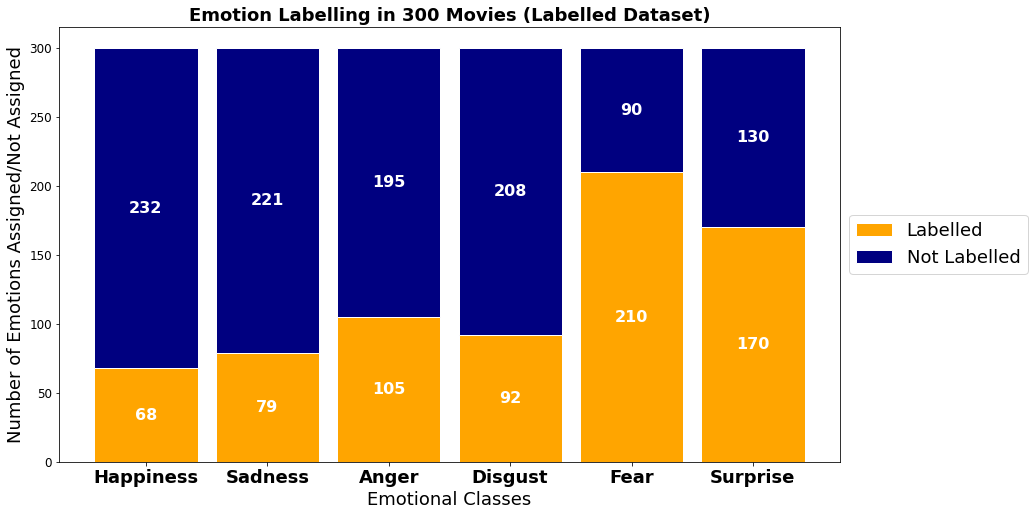

In [99]:
# https://medium.com/@priteshbgohil/stacked-bar-chart-in-python-ddc0781f7d5f
import matplotlib.pyplot as plt

labels = ["Happiness", "Sadness", "Anger", "Disgust", "Fear", "Surprise"]

#not assigned
emotions_0 = (movies_final_2['happiness'].value_counts()[0].tolist(),
              movies_final_2['sadness'].value_counts()[0].tolist(),
              movies_final_2['anger'].value_counts()[0].tolist(),
              movies_final_2['disgust'].value_counts()[0].tolist(),
              movies_final_2['fear'].value_counts()[0].tolist(),
              movies_final_2['surprise'].value_counts()[0].tolist()
              )

# assigned
emotions_1 = (movies_final_2['happiness'].value_counts()[1].tolist(),
              movies_final_2['sadness'].value_counts()[1].tolist(),
              movies_final_2['anger'].value_counts()[1].tolist(),
              movies_final_2['disgust'].value_counts()[1].tolist(),
              movies_final_2['fear'].value_counts()[1].tolist(),
              movies_final_2['surprise'].value_counts()[1].tolist()
              )
    
colors = ["orange", "navy"]
# The position of the bars on the x-axis
r = range(len(labels))
barWidth = 0.85

plt.figure(figsize=(14,8))
ax1 = plt.bar(r, emotions_1, color=colors[0], edgecolor='white', width=barWidth, label="Labelled")
ax2 = plt.bar(r, emotions_0, bottom=np.array(emotions_1), color=colors[1], edgecolor='white', width=barWidth, label='Not Labelled')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)

plt.xticks(r, labels, fontweight='bold',fontsize=18)
plt.ylabel("Number of Emotions Assigned/Not Assigned", fontsize=18)
plt.title("Emotion Labelling in 300 Movies (Labelled Dataset)", fontsize=18, fontweight= 'bold')
plt.xlabel("Emotional Classes", fontsize=18)
for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
#plt.savefig("?.png")
plt.show()

> We notice that "fear" and "surprise" present the highest frequency of emotions' occurrences followed by "anger" and "disgurst" respectively. "Happiness" and "sadness" are labelled the least of times

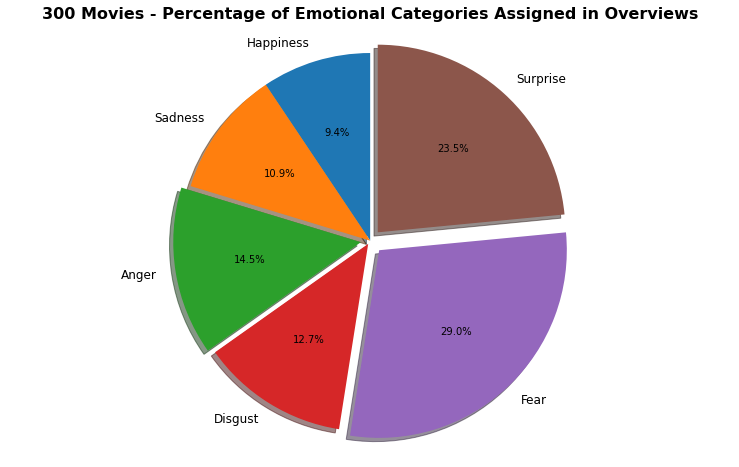

In [100]:

labels = ["Happiness", "Sadness", "Anger", "Disgust", "Fear", "Surprise"]

sizes = (movies_final_2['happiness'].value_counts()[1].tolist(),
              movies_final_2['sadness'].value_counts()[1].tolist(),
              movies_final_2['anger'].value_counts()[1].tolist(),
              movies_final_2['disgust'].value_counts()[1].tolist(),
              movies_final_2['fear'].value_counts()[1].tolist(),
              movies_final_2['surprise'].value_counts()[1].tolist()
              )

explode = (0, 0, 0.05, 0.02, 0.07, 0.06)  # only "explode" the 2nd slice (i.e. 'Hogs')

figure, ax1 = plt.subplots()
figure.set_size_inches(13,8)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("300 Movies - Percentage of Emotional Categories Assigned in Overviews", fontsize=16, fontweight="bold")

plt.show()

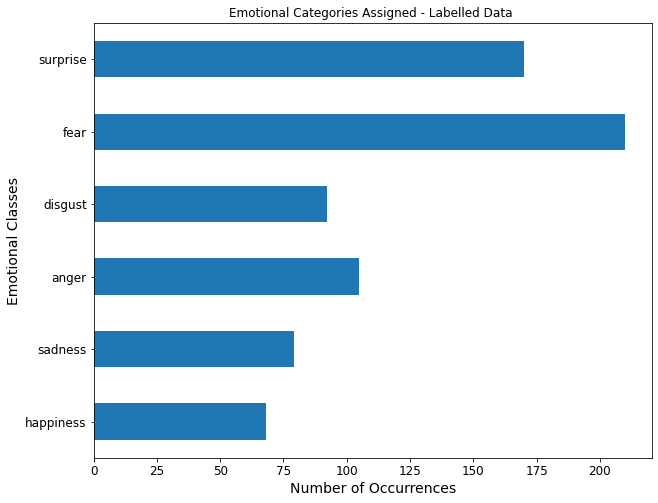

In [101]:
emotions= movies_final_2[["happiness", "sadness", "anger", "disgust", "fear", "surprise"]]


fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel("Number of Occurrences")
plt.ylabel("Emotional Classes")
plt.title("Emotional Categories Assigned - Labelled Data ")

emotions.sum(axis=0).plot.barh()

In [102]:
emotions = list(movies_final_2.columns.values)
emotions = emotions[11:]
print(emotions)


['happiness', 'sadness', 'anger', 'disgust', 'fear', 'surprise']


In [103]:
# calculating the number of overviews for each emotional category


count= []

for emotion in emotions:
  count.append((emotion, movies_final_2[emotion].sum()))
df= pd.DataFrame(count, columns=["emotion", "number of emotions"])
df

,emotion,number of emotions
0,happiness,68.0
1,sadness,79.0
2,anger,105.0
3,disgust,92.0
4,fear,210.0
5,surprise,170.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


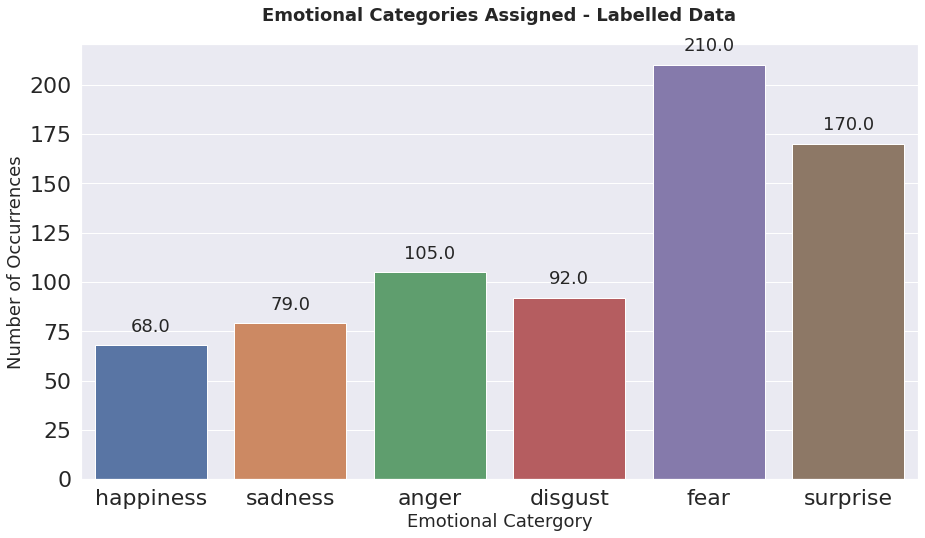

In [104]:
import seaborn as sns
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(emotions, movies_final_2.iloc[:, 11:].sum().values)

plt.title("Emotional Categories Assigned - Labelled Data", fontsize=18, fontweight= "bold", y=1.04)
plt.ylabel('Number of Occurrences', fontsize=18)
plt.xlabel('Emotional Catergory', fontsize=18)

#adding the text labels
rects = ax.patches
labels = movies_final_2.iloc[:, 11:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

> As it can be seen, 293 movies had at least 1 emotion assigned. 7 (300-293) out of the 300 labelled data did not have emotions assigned

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


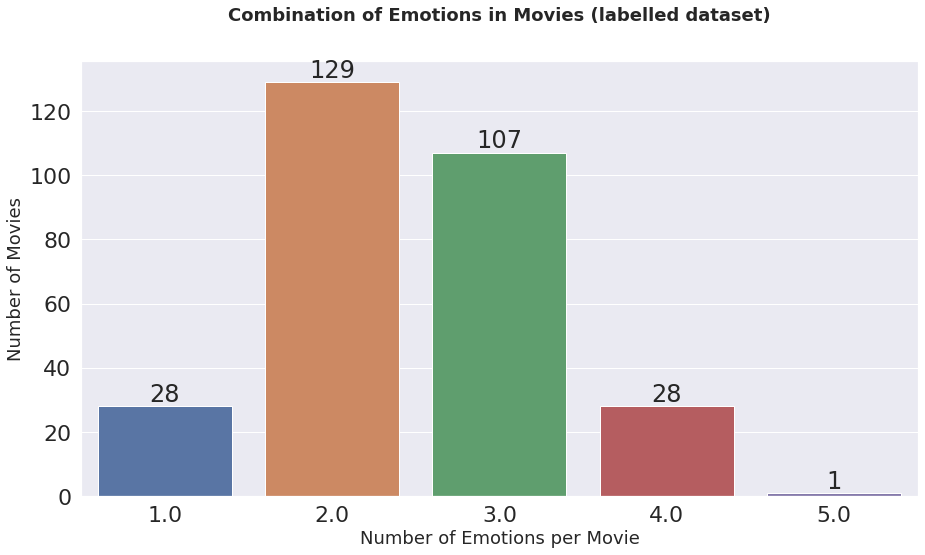

In [105]:
# calculating number of overviews having multiple emotions

rowSums = movies_final_2.iloc[:,11:].sum(axis=1,skipna=True)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Combination of Emotions in Movies (labelled dataset)", fontsize=18, y=1.08, fontweight="bold")
plt.ylabel('Number of Movies', fontsize=18)
plt.xlabel('Number of Emotions per Movie', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, '%d' % int(height), ha='center', va='bottom')

plt.show()
# 7 movies had no emotion

In [106]:
rowSums.value_counts()

0.0    55584
2.0      129
3.0      107
1.0       28
4.0       28
5.0        1
dtype: int64

In [107]:
# the 7 movies with no emotion assigned
data=[]
for row in movies_final_2.itertuples(index=True, name='Pandas'):
  if row.happiness==0 and row.sadness==0 and row.anger==0 and row.disgust==0 and row.fear==0 and row.surprise==0:
    data.append([row.movieId, row.title])

df = pd.DataFrame(data, columns=["movieId", "title"])
df

,movieId,title
0,192,The Show (1995)
1,206,Unzipped (1995)
2,581,"Celluloid Closet, The (1995)"
3,722,"Haunted World of Edward D. Wood Jr., The (1996)"
4,1123,"Perfect Candidate, A (1996)"
5,3170,Hi-Yo Silver (1940)
6,70093,Cheri (2009)


# Exctracting `"movies_final_3"`

In [108]:
movies_final_2.shape

(55877, 17)

In [109]:
movies_final_2.isnull().sum()
# nulls are only the unlabelled emotions (200 have been labelled)

movieId                      0
tmdbId                       0
title                        0
genres                       0
overview                     0
Vader_score                  0
Vader_compound               0
Vader_polarity               0
NMF_topic                    0
NMF_topic_description        0
entities                     0
happiness                55577
sadness                  55577
anger                    55577
disgust                  55577
fear                     55577
surprise                 55577
dtype: int64

> Assigning the dataframe with the emotion labelling to a new dataframe-csv file `"movies_final_3"`

In [110]:
movies_final_3 = movies_final_2
movies_final_3.shape

(55877, 17)

In [111]:
'''
from google.colab import files

movies_final_3.to_csv('movies_final_3.csv', index=False)
files.download('movies_final_3.csv')
'''

"\nfrom google.colab import files\n\nmovies_final_3.to_csv('movies_final_3.csv', index=False)\nfiles.download('movies_final_3.csv')\n"